In [1]:
import cv2
import glob
import os
import random
import pandas as pd
from shutil import copy
from shutil import copytree, rmtree
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Input
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.losses import categorical_crossentropy
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam,Adadelta,SGD
from tensorflow.keras.backend import mean
from tensorflow.keras.losses import mse
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler 
from tensorflow.keras.applications.inception_v3 import preprocess_input, InceptionV3
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.models import Model
from sklearn.model_selection import GridSearchCV

### We want to extract every different dish we have in our subfolders

In [2]:
path = "../input/images/"

In [3]:
folders=glob.glob(f'{path}*')

In [4]:
def take_dish_name(path):
    dishes=glob.glob(f'{path}*')
    names=[]
    for dish in dishes:
        names.append(dish.replace(r'../input/images/',''))
    return names

In [5]:
names=take_dish_name(path)

In [6]:
names[0]

'lobster_roll_sandwich'

### Displaying photos to check them

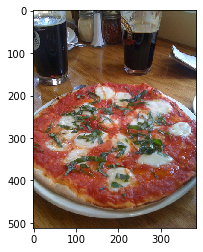

In [7]:
img = Image.open("../input/images/pizza/2965.jpg")
plt.imshow(np.array(img))

### We have a meta folder where train and test.txt files are stored, purposing train and test image sampling
#### We will use this as ImageDataGenerator works with folders' path

In [8]:
!head ../input/meta/meta/train.txt

apple_pie/1005649
apple_pie/1014775
apple_pie/1026328
apple_pie/1028787
apple_pie/1043283
apple_pie/1050519
apple_pie/1057749
apple_pie/1057810
apple_pie/1072416
apple_pie/1074856


In [9]:
def pictures_to_dir(source,dest,names,txt):
    if os.path.exists(dest):
        rmtree(dest) 
    else:
        os.makedirs(dest)
    lines=[]
    with open(txt,'r') as f:
        for line in f.readlines():
            line=line.strip()
            line=line.split('/')
            line=line[1]+'.jpg'
            lines.append(line)

    for name in names:
        dishes = [
            *glob.glob(f"{source}{name}/*.jpg"),
            *glob.glob(f"{source}{name}/*.JPG")
        ]

        print("Creating train data folder with new classes")
        if not os.path.exists(os.path.join(dest,name)):
            os.makedirs(os.path.join(dest,name))
        for dish in dishes:
            if dish.split('/')[3]==name and dish.split('/')[4] in lines:
                print("Copying ",dish, "into", dest)
                copy(dish, os.path.join(dest,name,dish.split('/')[4]))
        
    print('Done!')

In [10]:
pictures_to_dir(source="../input/images/",dest="../output/images/train_part",names=names[0:5],txt='../input/meta/meta/train.txt')

Creating train data folder with new classes
Copying  ../input/images/pork_chop/1388145.jpg into ../output/images/train
Copying  ../input/images/pork_chop/555627.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1973330.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3731878.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3146669.jpg into ../output/images/train
Copying  ../input/images/pork_chop/92752.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3451298.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1100057.jpg into ../output/images/train
Copying  ../input/images/pork_chop/785532.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1128628.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3871315.jpg into ../output/images/train
Copying  ../input/images/pork_chop/109828.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1846574.jpg into ../output

Copying  ../input/images/pork_chop/642275.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2101049.jpg into ../output/images/train
Copying  ../input/images/pork_chop/701793.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1370095.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3678864.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1289423.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2777612.jpg into ../output/images/train
Copying  ../input/images/pork_chop/892190.jpg into ../output/images/train
Copying  ../input/images/pork_chop/943946.jpg into ../output/images/train
Copying  ../input/images/pork_chop/593035.jpg into ../output/images/train
Copying  ../input/images/pork_chop/808863.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2293839.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1631341.jpg into ../output/images/train
Copying  ../input/images/pork_c

Copying  ../input/images/pork_chop/1268627.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1274043.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2463726.jpg into ../output/images/train
Copying  ../input/images/pork_chop/128675.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1404330.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2877496.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3379310.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3683431.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3711222.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3676665.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1647406.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3143348.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1830532.jpg into ../output/images/train
Copying  ../input/images/p

Copying  ../input/images/pork_chop/456842.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1025391.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3859175.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3433968.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3313541.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3707108.jpg into ../output/images/train
Copying  ../input/images/pork_chop/724224.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1207006.jpg into ../output/images/train
Copying  ../input/images/pork_chop/411991.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3426809.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1506005.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2122776.jpg into ../output/images/train
Copying  ../input/images/pork_chop/963022.jpg into ../output/images/train
Copying  ../input/images/pork

Copying  ../input/images/pork_chop/1079425.jpg into ../output/images/train
Copying  ../input/images/pork_chop/210347.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2051462.jpg into ../output/images/train
Copying  ../input/images/pork_chop/94984.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2818161.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1767532.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3403053.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2907294.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3498077.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3485189.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2853512.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1858052.jpg into ../output/images/train
Copying  ../input/images/pork_chop/673919.jpg into ../output/images/train
Copying  ../input/images/pork

Copying  ../input/images/pork_chop/2553818.jpg into ../output/images/train
Copying  ../input/images/pork_chop/158287.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3888445.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1373542.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2948658.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1700465.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2699744.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1342736.jpg into ../output/images/train
Copying  ../input/images/pork_chop/757352.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3570448.jpg into ../output/images/train
Copying  ../input/images/pork_chop/199421.jpg into ../output/images/train
Copying  ../input/images/pork_chop/193888.jpg into ../output/images/train
Copying  ../input/images/pork_chop/41711.jpg into ../output/images/train
Copying  ../input/images/pork_c

Copying  ../input/images/pork_chop/1136752.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1152848.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3081030.jpg into ../output/images/train
Copying  ../input/images/pork_chop/709666.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3750416.jpg into ../output/images/train
Copying  ../input/images/pork_chop/644805.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2999967.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1854811.jpg into ../output/images/train
Copying  ../input/images/pork_chop/238497.jpg into ../output/images/train
Copying  ../input/images/pork_chop/411218.jpg into ../output/images/train
Copying  ../input/images/pork_chop/767777.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1110342.jpg into ../output/images/train
Copying  ../input/images/pork_chop/574767.jpg into ../output/images/train
Copying  ../input/images/pork_c

Copying  ../input/images/pork_chop/2211393.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2728417.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2498874.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1589304.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1050283.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3455239.jpg into ../output/images/train
Copying  ../input/images/pork_chop/369571.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1971782.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1315175.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1832533.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2436367.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2066587.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3587064.jpg into ../output/images/train
Copying  ../input/images/p

Copying  ../input/images/pork_chop/300124.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2127632.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2878911.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1508105.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1860394.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1053846.jpg into ../output/images/train
Copying  ../input/images/pork_chop/720001.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2869995.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1471889.jpg into ../output/images/train
Copying  ../input/images/pork_chop/583185.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2093582.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2674702.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1121522.jpg into ../output/images/train
Copying  ../input/images/por

Copying  ../input/images/pork_chop/1267134.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3022815.jpg into ../output/images/train
Copying  ../input/images/pork_chop/4132.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3197248.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3417993.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3788106.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1136462.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3181544.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2193824.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3106715.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3411602.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1442402.jpg into ../output/images/train
Copying  ../input/images/pork_chop/13702.jpg into ../output/images/train
Copying  ../input/images/pork_

Copying  ../input/images/pork_chop/84929.jpg into ../output/images/train
Copying  ../input/images/pork_chop/96943.jpg into ../output/images/train
Copying  ../input/images/pork_chop/510171.jpg into ../output/images/train
Copying  ../input/images/pork_chop/533564.jpg into ../output/images/train
Copying  ../input/images/pork_chop/187321.jpg into ../output/images/train
Copying  ../input/images/pork_chop/74543.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3105887.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1900880.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3923842.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2696538.jpg into ../output/images/train
Copying  ../input/images/pork_chop/270094.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3138375.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1916309.jpg into ../output/images/train
Copying  ../input/images/pork_chop/

Copying  ../input/images/pork_chop/3890275.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2069363.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2693717.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3758185.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1513524.jpg into ../output/images/train
Copying  ../input/images/pork_chop/249107.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3304357.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2451645.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2838732.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2600155.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2023350.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3778629.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3850521.jpg into ../output/images/train
Copying  ../input/images/p

Copying  ../input/images/pork_chop/2367442.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2942432.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3234.jpg into ../output/images/train
Copying  ../input/images/pork_chop/328952.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2818830.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3716550.jpg into ../output/images/train
Copying  ../input/images/pork_chop/832664.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2150254.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1724244.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2357113.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3592525.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1168924.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3859408.jpg into ../output/images/train
Copying  ../input/images/pork_

Copying  ../input/images/pork_chop/3858126.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2064280.jpg into ../output/images/train
Copying  ../input/images/pork_chop/864177.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1745179.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1041355.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3567371.jpg into ../output/images/train
Copying  ../input/images/pork_chop/227569.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2009546.jpg into ../output/images/train
Copying  ../input/images/pork_chop/213526.jpg into ../output/images/train
Copying  ../input/images/pork_chop/52296.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3782387.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3520620.jpg into ../output/images/train
Copying  ../input/images/pork_chop/359323.jpg into ../output/images/train
Copying  ../input/images/pork_c

Copying  ../input/images/pork_chop/386684.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2547290.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3590520.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1929304.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2040040.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3812427.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2292745.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1735192.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2452219.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2899150.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1039231.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2581123.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3371035.jpg into ../output/images/train
Copying  ../input/images/p

Copying  ../input/images/pork_chop/557128.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2213114.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1397202.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3494894.jpg into ../output/images/train
Copying  ../input/images/pork_chop/744317.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3681818.jpg into ../output/images/train
Copying  ../input/images/pork_chop/563717.jpg into ../output/images/train
Copying  ../input/images/pork_chop/742086.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1916518.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1330802.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2126374.jpg into ../output/images/train
Copying  ../input/images/pork_chop/870318.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1499476.jpg into ../output/images/train
Copying  ../input/images/pork_

Copying  ../input/images/pork_chop/769529.jpg into ../output/images/train
Copying  ../input/images/pork_chop/53942.jpg into ../output/images/train
Copying  ../input/images/pork_chop/578636.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3242791.jpg into ../output/images/train
Copying  ../input/images/pork_chop/403074.jpg into ../output/images/train
Copying  ../input/images/pork_chop/669811.jpg into ../output/images/train
Copying  ../input/images/pork_chop/497372.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1210895.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2207519.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3442347.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2237383.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3018876.jpg into ../output/images/train
Copying  ../input/images/pork_chop/25893.jpg into ../output/images/train
Copying  ../input/images/pork_chop

Copying  ../input/images/pork_chop/2931058.jpg into ../output/images/train
Copying  ../input/images/pork_chop/212954.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1407668.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2793919.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2953861.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1945563.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1320280.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2849189.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1978626.jpg into ../output/images/train
Copying  ../input/images/pork_chop/711353.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1182975.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3906474.jpg into ../output/images/train
Copying  ../input/images/pork_chop/970362.jpg into ../output/images/train
Copying  ../input/images/por

Copying  ../input/images/pork_chop/2931040.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3626917.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2474041.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2271111.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3237410.jpg into ../output/images/train
Copying  ../input/images/pork_chop/942195.jpg into ../output/images/train
Copying  ../input/images/pork_chop/80368.jpg into ../output/images/train
Copying  ../input/images/pork_chop/392727.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2174542.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2986893.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2204685.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2837452.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3759263.jpg into ../output/images/train
Copying  ../input/images/pork

Copying  ../input/images/pork_chop/1223503.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1596341.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1475146.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2024192.jpg into ../output/images/train
Copying  ../input/images/pork_chop/25853.jpg into ../output/images/train
Copying  ../input/images/pork_chop/19331.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2915682.jpg into ../output/images/train
Copying  ../input/images/pork_chop/340637.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3234235.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3030653.jpg into ../output/images/train
Copying  ../input/images/pork_chop/806257.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1657588.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1225292.jpg into ../output/images/train
Copying  ../input/images/pork_c

Copying  ../input/images/pork_chop/3106715.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3411602.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1442402.jpg into ../output/images/train
Copying  ../input/images/pork_chop/13702.jpg into ../output/images/train
Copying  ../input/images/pork_chop/296786.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2871521.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2974745.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2026605.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1714032.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1418154.jpg into ../output/images/train
Copying  ../input/images/pork_chop/298572.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3117297.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3066115.jpg into ../output/images/train
Copying  ../input/images/pork

Copying  ../input/images/pork_chop/1388145.jpg into ../output/images/train
Copying  ../input/images/pork_chop/555627.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1973330.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3731878.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3146669.jpg into ../output/images/train
Copying  ../input/images/pork_chop/92752.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3451298.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1100057.jpg into ../output/images/train
Copying  ../input/images/pork_chop/785532.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1128628.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3871315.jpg into ../output/images/train
Copying  ../input/images/pork_chop/109828.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1846574.jpg into ../output/images/train
Copying  ../input/images/pork_

Copying  ../input/images/pork_chop/892190.jpg into ../output/images/train
Copying  ../input/images/pork_chop/943946.jpg into ../output/images/train
Copying  ../input/images/pork_chop/593035.jpg into ../output/images/train
Copying  ../input/images/pork_chop/808863.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2293839.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1631341.jpg into ../output/images/train
Copying  ../input/images/pork_chop/40667.jpg into ../output/images/train
Copying  ../input/images/pork_chop/515094.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2700929.jpg into ../output/images/train
Copying  ../input/images/pork_chop/790956.jpg into ../output/images/train
Copying  ../input/images/pork_chop/287496.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2084242.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1236872.jpg into ../output/images/train
Copying  ../input/images/pork_chop

Copying  ../input/images/pork_chop/3229940.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2103143.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2136111.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2616548.jpg into ../output/images/train
Copying  ../input/images/pork_chop/71669.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2179648.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2417578.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3826361.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2337935.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3355081.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1000802.jpg into ../output/images/train
Copying  ../input/images/pork_chop/463351.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2133246.jpg into ../output/images/train
Copying  ../input/images/por

Copying  ../input/images/pork_chop/3707108.jpg into ../output/images/train
Copying  ../input/images/pork_chop/724224.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1207006.jpg into ../output/images/train
Copying  ../input/images/pork_chop/411991.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3426809.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1506005.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2122776.jpg into ../output/images/train
Copying  ../input/images/pork_chop/963022.jpg into ../output/images/train
Copying  ../input/images/pork_chop/318203.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1512817.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3243910.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2377637.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2040443.jpg into ../output/images/train
Copying  ../input/images/pork

Copying  ../input/images/pork_chop/2051462.jpg into ../output/images/train
Copying  ../input/images/pork_chop/94984.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2818161.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1767532.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3403053.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2907294.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3498077.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3485189.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2853512.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1858052.jpg into ../output/images/train
Copying  ../input/images/pork_chop/673919.jpg into ../output/images/train
Copying  ../input/images/pork_chop/784840.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2202572.jpg into ../output/images/train
Copying  ../input/images/pork

Copying  ../input/images/pork_chop/757352.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3570448.jpg into ../output/images/train
Copying  ../input/images/pork_chop/199421.jpg into ../output/images/train
Copying  ../input/images/pork_chop/193888.jpg into ../output/images/train
Copying  ../input/images/pork_chop/41711.jpg into ../output/images/train
Copying  ../input/images/pork_chop/296545.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2618191.jpg into ../output/images/train
Copying  ../input/images/pork_chop/935042.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3826314.jpg into ../output/images/train
Copying  ../input/images/pork_chop/557084.jpg into ../output/images/train
Copying  ../input/images/pork_chop/236420.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2760487.jpg into ../output/images/train
Copying  ../input/images/pork_chop/64079.jpg into ../output/images/train
Copying  ../input/images/pork_chop/4

Copying  ../input/images/pork_chop/238497.jpg into ../output/images/train
Copying  ../input/images/pork_chop/411218.jpg into ../output/images/train
Copying  ../input/images/pork_chop/767777.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1110342.jpg into ../output/images/train
Copying  ../input/images/pork_chop/574767.jpg into ../output/images/train
Copying  ../input/images/pork_chop/492509.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2821969.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1286324.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1730537.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1263434.jpg into ../output/images/train
Copying  ../input/images/pork_chop/846044.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3373416.jpg into ../output/images/train
Copying  ../input/images/pork_chop/511125.jpg into ../output/images/train
Copying  ../input/images/pork_ch

Copying  ../input/images/pork_chop/369571.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1971782.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1315175.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1832533.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2436367.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2066587.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3587064.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2331805.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1700677.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1818115.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1650593.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2174434.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2931040.jpg into ../output/images/train
Copying  ../input/images/p

Copying  ../input/images/pork_chop/1508105.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1860394.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1053846.jpg into ../output/images/train
Copying  ../input/images/pork_chop/720001.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2869995.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1471889.jpg into ../output/images/train
Copying  ../input/images/pork_chop/583185.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2093582.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2674702.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1121522.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1200291.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1280770.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3431117.jpg into ../output/images/train
Copying  ../input/images/po

Copying  ../input/images/pork_chop/3022815.jpg into ../output/images/train
Copying  ../input/images/pork_chop/4132.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3197248.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3417993.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3788106.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1136462.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3181544.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2193824.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3106715.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3411602.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1442402.jpg into ../output/images/train
Copying  ../input/images/pork_chop/13702.jpg into ../output/images/train
Copying  ../input/images/pork_chop/296786.jpg into ../output/images/train
Copying  ../input/images/pork_c

Copying  ../input/images/pork_chop/84929.jpg into ../output/images/train
Copying  ../input/images/pork_chop/96943.jpg into ../output/images/train
Copying  ../input/images/pork_chop/510171.jpg into ../output/images/train
Copying  ../input/images/pork_chop/533564.jpg into ../output/images/train
Copying  ../input/images/pork_chop/187321.jpg into ../output/images/train
Copying  ../input/images/pork_chop/74543.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3105887.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1900880.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3923842.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2696538.jpg into ../output/images/train
Copying  ../input/images/pork_chop/270094.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3138375.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1916309.jpg into ../output/images/train
Copying  ../input/images/pork_chop/

Copying  ../input/images/pork_chop/12316.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3188008.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3890275.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2069363.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2693717.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3758185.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1513524.jpg into ../output/images/train
Copying  ../input/images/pork_chop/249107.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3304357.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2451645.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2838732.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2600155.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2023350.jpg into ../output/images/train
Copying  ../input/images/por

Copying  ../input/images/pork_chop/2367442.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2942432.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3234.jpg into ../output/images/train
Copying  ../input/images/pork_chop/328952.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2818830.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3716550.jpg into ../output/images/train
Copying  ../input/images/pork_chop/832664.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2150254.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1724244.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2357113.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3592525.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1168924.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3859408.jpg into ../output/images/train
Copying  ../input/images/pork_

Copying  ../input/images/pork_chop/2133246.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3442605.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3858126.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2064280.jpg into ../output/images/train
Copying  ../input/images/pork_chop/864177.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1745179.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1041355.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3567371.jpg into ../output/images/train
Copying  ../input/images/pork_chop/227569.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2009546.jpg into ../output/images/train
Copying  ../input/images/pork_chop/213526.jpg into ../output/images/train
Copying  ../input/images/pork_chop/52296.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3782387.jpg into ../output/images/train
Copying  ../input/images/pork_

Copying  ../input/images/pork_chop/3725022.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1268344.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1144608.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3035716.jpg into ../output/images/train
Copying  ../input/images/pork_chop/386684.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2547290.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3590520.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1929304.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2040040.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3812427.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2292745.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1735192.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2452219.jpg into ../output/images/train
Copying  ../input/images/p

Copying  ../input/images/pork_chop/1203913.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1656585.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3600518.jpg into ../output/images/train
Copying  ../input/images/pork_chop/557128.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2213114.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1397202.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3494894.jpg into ../output/images/train
Copying  ../input/images/pork_chop/744317.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3681818.jpg into ../output/images/train
Copying  ../input/images/pork_chop/563717.jpg into ../output/images/train
Copying  ../input/images/pork_chop/742086.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1916518.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1330802.jpg into ../output/images/train
Copying  ../input/images/pork

Copying  ../input/images/pork_chop/2251921.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1512447.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1326364.jpg into ../output/images/train
Copying  ../input/images/pork_chop/610736.jpg into ../output/images/train
Copying  ../input/images/pork_chop/769529.jpg into ../output/images/train
Copying  ../input/images/pork_chop/53942.jpg into ../output/images/train
Copying  ../input/images/pork_chop/578636.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3242791.jpg into ../output/images/train
Copying  ../input/images/pork_chop/403074.jpg into ../output/images/train
Copying  ../input/images/pork_chop/669811.jpg into ../output/images/train
Copying  ../input/images/pork_chop/497372.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1210895.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2207519.jpg into ../output/images/train
Copying  ../input/images/pork_cho

Copying  ../input/images/pork_chop/212954.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1407668.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2793919.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2953861.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1945563.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1320280.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2849189.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1978626.jpg into ../output/images/train
Copying  ../input/images/pork_chop/711353.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1182975.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3906474.jpg into ../output/images/train
Copying  ../input/images/pork_chop/970362.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3555838.jpg into ../output/images/train
Copying  ../input/images/por

Copying  ../input/images/pork_chop/3626917.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2474041.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2271111.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3237410.jpg into ../output/images/train
Copying  ../input/images/pork_chop/942195.jpg into ../output/images/train
Copying  ../input/images/pork_chop/80368.jpg into ../output/images/train
Copying  ../input/images/pork_chop/392727.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2174542.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2986893.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2204685.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2837452.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3759263.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2868763.jpg into ../output/images/train
Copying  ../input/images/pork

Copying  ../input/images/pork_chop/1223503.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1596341.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1475146.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2024192.jpg into ../output/images/train
Copying  ../input/images/pork_chop/25853.jpg into ../output/images/train
Copying  ../input/images/pork_chop/19331.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2915682.jpg into ../output/images/train
Copying  ../input/images/pork_chop/340637.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3234235.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3030653.jpg into ../output/images/train
Copying  ../input/images/pork_chop/806257.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1657588.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1225292.jpg into ../output/images/train
Copying  ../input/images/pork_c

Copying  ../input/images/pork_chop/13702.jpg into ../output/images/train
Copying  ../input/images/pork_chop/296786.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2871521.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2974745.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2026605.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1714032.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1418154.jpg into ../output/images/train
Copying  ../input/images/pork_chop/298572.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3117297.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3066115.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2548894.jpg into ../output/images/train
Copying  ../input/images/pork_chop/155830.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3545316.jpg into ../output/images/train
Copying  ../input/images/pork_

Copying  ../input/images/pork_chop/3923842.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2696538.jpg into ../output/images/train
Copying  ../input/images/pork_chop/270094.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3138375.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1916309.jpg into ../output/images/train
Copying  ../input/images/pork_chop/968836.jpg into ../output/images/train
Copying  ../input/images/pork_chop/661375.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1560381.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1714213.jpg into ../output/images/train
Copying  ../input/images/pork_chop/895117.jpg into ../output/images/train
Copying  ../input/images/pork_chop/602053.jpg into ../output/images/train
Copying  ../input/images/pork_chop/711719.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1710650.jpg into ../output/images/train
Copying  ../input/images/pork_c

Copying  ../input/images/pork_chop/3778629.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3850521.jpg into ../output/images/train
Copying  ../input/images/pork_chop/39864.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1648630.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1256499.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1512185.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2801687.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3559225.jpg into ../output/images/train
Copying  ../input/images/pork_chop/12074.jpg into ../output/images/train
Copying  ../input/images/pork_chop/620776.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2814065.jpg into ../output/images/train
Copying  ../input/images/pork_chop/225831.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3874611.jpg into ../output/images/train
Copying  ../input/images/pork_c

Copying  ../input/images/pork_chop/3592525.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1168924.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3859408.jpg into ../output/images/train
Copying  ../input/images/pork_chop/123074.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2803444.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3843910.jpg into ../output/images/train
Copying  ../input/images/pork_chop/346349.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2849018.jpg into ../output/images/train
Copying  ../input/images/pork_chop/76465.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3125661.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3837359.jpg into ../output/images/train
Copying  ../input/images/pork_chop/33081.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2560651.jpg into ../output/images/train
Copying  ../input/images/pork_c

Copying  ../input/images/pork_chop/3520620.jpg into ../output/images/train
Copying  ../input/images/pork_chop/359323.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2123880.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3542888.jpg into ../output/images/train
Copying  ../input/images/pork_chop/513047.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1418802.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3301788.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2541863.jpg into ../output/images/train
Copying  ../input/images/pork_chop/631335.jpg into ../output/images/train
Copying  ../input/images/pork_chop/506033.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2195021.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3841787.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1241012.jpg into ../output/images/train
Copying  ../input/images/pork

Copying  ../input/images/pork_chop/2681018.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2354114.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1234724.jpg into ../output/images/train
Copying  ../input/images/pork_chop/798622.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2781994.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2567700.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2720011.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1573047.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1762012.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3301469.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3500966.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1586313.jpg into ../output/images/train
Copying  ../input/images/pork_chop/177193.jpg into ../output/images/train
Copying  ../input/images/po

Copying  ../input/images/pork_chop/1916518.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1330802.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2126374.jpg into ../output/images/train
Copying  ../input/images/pork_chop/870318.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1499476.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1827316.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2628584.jpg into ../output/images/train
Copying  ../input/images/pork_chop/900797.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2831846.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3442406.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1947689.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2905408.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1059919.jpg into ../output/images/train
Copying  ../input/images/po

Copying  ../input/images/pork_chop/497372.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1210895.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2207519.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3442347.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2237383.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3018876.jpg into ../output/images/train
Copying  ../input/images/pork_chop/25893.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3681583.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1673901.jpg into ../output/images/train
Copying  ../input/images/pork_chop/161832.jpg into ../output/images/train
Copying  ../input/images/pork_chop/317142.jpg into ../output/images/train
Copying  ../input/images/pork_chop/915008.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1944392.jpg into ../output/images/train
Copying  ../input/images/pork_c

Copying  ../input/images/pork_chop/1182975.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3906474.jpg into ../output/images/train
Copying  ../input/images/pork_chop/970362.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3555838.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1456608.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3625119.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1006233.jpg into ../output/images/train
Copying  ../input/images/pork_chop/155551.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1545648.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1306525.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3297486.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2585805.jpg into ../output/images/train
Copying  ../input/images/pork_chop/560989.jpg into ../output/images/train
Copying  ../input/images/por

Copying  ../input/images/pork_chop/877905.jpg into ../output/images/train
Copying  ../input/images/pork_chop/132681.jpg into ../output/images/train
Copying  ../input/images/pork_chop/231002.jpg into ../output/images/train
Copying  ../input/images/pork_chop/247264.jpg into ../output/images/train
Copying  ../input/images/pork_chop/588945.jpg into ../output/images/train
Copying  ../input/images/pork_chop/41531.jpg into ../output/images/train
Copying  ../input/images/pork_chop/644795.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3510477.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3218459.jpg into ../output/images/train
Copying  ../input/images/pork_chop/312419.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3106425.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3401873.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2986321.jpg into ../output/images/train
Copying  ../input/images/pork_chop

Copying  ../input/images/pork_chop/1225292.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2375809.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1110387.jpg into ../output/images/train
Copying  ../input/images/pork_chop/60694.jpg into ../output/images/train
Copying  ../input/images/pork_chop/836291.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1757536.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3442838.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1019569.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1169430.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3152860.jpg into ../output/images/train
Copying  ../input/images/pork_chop/675025.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2028393.jpg into ../output/images/train
Copying  ../input/images/pork_chop/268603.jpg into ../output/images/train
Copying  ../input/images/pork_

Copying  ../input/images/pork_chop/3066115.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2548894.jpg into ../output/images/train
Copying  ../input/images/pork_chop/155830.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3545316.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3360824.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3167838.jpg into ../output/images/train
Copying  ../input/images/pork_chop/451326.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3558217.jpg into ../output/images/train
Copying  ../input/images/pork_chop/397057.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3923403.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1042220.jpg into ../output/images/train
Copying  ../input/images/pork_chop/246686.jpg into ../output/images/train
Copying  ../input/images/pork_chop/943226.jpg into ../output/images/train
Copying  ../input/images/pork_

Copying  ../input/images/pork_chop/711719.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1710650.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1270721.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2660295.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3036961.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2987975.jpg into ../output/images/train
Copying  ../input/images/pork_chop/135321.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2598106.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2350249.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2530781.jpg into ../output/images/train
Copying  ../input/images/pork_chop/214109.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1261321.jpg into ../output/images/train
Copying  ../input/images/pork_chop/123518.jpg into ../output/images/train
Copying  ../input/images/pork

Copying  ../input/images/pork_chop/3559225.jpg into ../output/images/train
Copying  ../input/images/pork_chop/12074.jpg into ../output/images/train
Copying  ../input/images/pork_chop/620776.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2814065.jpg into ../output/images/train
Copying  ../input/images/pork_chop/225831.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3874611.jpg into ../output/images/train
Copying  ../input/images/pork_chop/45486.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2099156.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3701304.jpg into ../output/images/train
Copying  ../input/images/pork_chop/24178.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3888366.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1036426.jpg into ../output/images/train
Copying  ../input/images/pork_chop/166207.jpg into ../output/images/train
Copying  ../input/images/pork_chop

Copying  ../input/images/pork_chop/2582993.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3076558.jpg into ../output/images/train
Copying  ../input/images/pork_chop/7509.jpg into ../output/images/train
Copying  ../input/images/pork_chop/527832.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2866569.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1266479.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3337014.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2121610.jpg into ../output/images/train
Copying  ../input/images/pork_chop/882663.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1180561.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3534923.jpg into ../output/images/train
Copying  ../input/images/pork_chop/316647.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1076156.jpg into ../output/images/train
Copying  ../input/images/pork_c

Copying  ../input/images/pork_chop/3841787.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1241012.jpg into ../output/images/train
Copying  ../input/images/pork_chop/967240.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3398816.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3114112.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3510662.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3472793.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2292742.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2452451.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3698749.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3585903.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3305266.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2688444.jpg into ../output/images/train
Copying  ../input/images/p

Copying  ../input/images/pork_chop/1762012.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3301469.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3500966.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1586313.jpg into ../output/images/train
Copying  ../input/images/pork_chop/177193.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1568502.jpg into ../output/images/train
Copying  ../input/images/pork_chop/823036.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2776949.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3548353.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3781737.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3849183.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2558943.jpg into ../output/images/train
Copying  ../input/images/pork_chop/927023.jpg into ../output/images/train
Copying  ../input/images/por

Copying  ../input/images/pork_chop/1169511.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1573971.jpg into ../output/images/train
Copying  ../input/images/pork_chop/488540.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3177156.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2295746.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1686243.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3114850.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3312973.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1937514.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1525474.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1572455.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1258359.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1419390.jpg into ../output/images/train
Copying  ../input/images/p

Copying  ../input/images/pork_chop/1019530.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3268292.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2801338.jpg into ../output/images/train
Copying  ../input/images/pork_chop/469027.jpg into ../output/images/train
Copying  ../input/images/pork_chop/325280.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2653314.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2681372.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3843615.jpg into ../output/images/train
Copying  ../input/images/pork_chop/85404.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3881213.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2996096.jpg into ../output/images/train
Copying  ../input/images/pork_chop/267666.jpg into ../output/images/train
Copying  ../input/images/pork_chop/90125.jpg into ../output/images/train
Copying  ../input/images/pork_ch

Copying  ../input/images/pork_chop/898484.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2122020.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3320712.jpg into ../output/images/train
Copying  ../input/images/pork_chop/674599.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2262131.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2780671.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2526062.jpg into ../output/images/train
Copying  ../input/images/pork_chop/123191.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3841107.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3606606.jpg into ../output/images/train
Copying  ../input/images/pork_chop/444519.jpg into ../output/images/train
Copying  ../input/images/pork_chop/642275.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2101049.jpg into ../output/images/train
Copying  ../input/images/pork_

Copying  ../input/images/pork_chop/1437232.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1268627.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1274043.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2463726.jpg into ../output/images/train
Copying  ../input/images/pork_chop/128675.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1404330.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2877496.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3379310.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3683431.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3711222.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3676665.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1647406.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3143348.jpg into ../output/images/train
Copying  ../input/images/p

Copying  ../input/images/pork_chop/866209.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3811551.jpg into ../output/images/train
Copying  ../input/images/pork_chop/47842.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3257693.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2685954.jpg into ../output/images/train
Copying  ../input/images/pork_chop/555022.jpg into ../output/images/train
Copying  ../input/images/pork_chop/300422.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1688617.jpg into ../output/images/train
Copying  ../input/images/pork_chop/456842.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1025391.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3859175.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3433968.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3313541.jpg into ../output/images/train
Copying  ../input/images/pork_c

Copying  ../input/images/pork_chop/749517.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1707620.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3908971.jpg into ../output/images/train
Copying  ../input/images/pork_chop/450350.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3287100.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3607531.jpg into ../output/images/train
Copying  ../input/images/pork_chop/678687.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1079425.jpg into ../output/images/train
Copying  ../input/images/pork_chop/210347.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2051462.jpg into ../output/images/train
Copying  ../input/images/pork_chop/94984.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2818161.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1767532.jpg into ../output/images/train
Copying  ../input/images/pork_c

Copying  ../input/images/pork_chop/3066019.jpg into ../output/images/train
Copying  ../input/images/pork_chop/687508.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1707724.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2332726.jpg into ../output/images/train
Copying  ../input/images/pork_chop/99168.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2853524.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1516602.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1689230.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3399495.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3102890.jpg into ../output/images/train
Copying  ../input/images/pork_chop/667263.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2553818.jpg into ../output/images/train
Copying  ../input/images/pork_chop/158287.jpg into ../output/images/train
Copying  ../input/images/pork_

Copying  ../input/images/pork_chop/3757351.jpg into ../output/images/train
Copying  ../input/images/pork_chop/222615.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3558575.jpg into ../output/images/train
Copying  ../input/images/pork_chop/321907.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3763167.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2987265.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3797906.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1132166.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1112936.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3562834.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3068489.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3768697.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2987572.jpg into ../output/images/train
Copying  ../input/images/po

Copying  ../input/images/pork_chop/2584278.jpg into ../output/images/train
Copying  ../input/images/pork_chop/719194.jpg into ../output/images/train
Copying  ../input/images/pork_chop/309380.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2160496.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2879714.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3137301.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3297788.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3396094.jpg into ../output/images/train
Copying  ../input/images/pork_chop/138749.jpg into ../output/images/train
Copying  ../input/images/pork_chop/414178.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3476228.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3729801.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3253393.jpg into ../output/images/train
Copying  ../input/images/pork

Copying  ../input/images/pork_chop/3472793.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2292742.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2452451.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3698749.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3585903.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3305266.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2688444.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1808053.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2297867.jpg into ../output/images/train
Copying  ../input/images/pork_chop/72170.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2361427.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3573105.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1618984.jpg into ../output/images/train
Copying  ../input/images/po

Copying  ../input/images/pork_chop/823036.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2776949.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3548353.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3781737.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3849183.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2558943.jpg into ../output/images/train
Copying  ../input/images/pork_chop/927023.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1477623.jpg into ../output/images/train
Copying  ../input/images/pork_chop/375946.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2572055.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1888705.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2089945.jpg into ../output/images/train
Copying  ../input/images/pork_chop/420925.jpg into ../output/images/train
Copying  ../input/images/pork

Copying  ../input/images/pork_chop/3916467.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2284316.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2498979.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2717324.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2743506.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1169511.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1573971.jpg into ../output/images/train
Copying  ../input/images/pork_chop/488540.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3177156.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2295746.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1686243.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3114850.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3312973.jpg into ../output/images/train
Copying  ../input/images/p

Copying  ../input/images/pork_chop/1673901.jpg into ../output/images/train
Copying  ../input/images/pork_chop/161832.jpg into ../output/images/train
Copying  ../input/images/pork_chop/317142.jpg into ../output/images/train
Copying  ../input/images/pork_chop/915008.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1944392.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3715275.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2244599.jpg into ../output/images/train
Copying  ../input/images/pork_chop/855071.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2075154.jpg into ../output/images/train
Copying  ../input/images/pork_chop/575805.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3770880.jpg into ../output/images/train
Copying  ../input/images/pork_chop/746693.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1019530.jpg into ../output/images/train
Copying  ../input/images/pork_c

Copying  ../input/images/pork_chop/154414.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3105792.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3793101.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1378201.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3521892.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3924356.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1750024.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1110945.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2752111.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3858624.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3313632.jpg into ../output/images/train
Copying  ../input/images/pork_chop/898484.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2122020.jpg into ../output/images/train
Copying  ../input/images/po

Copying  ../input/images/pork_chop/2986321.jpg into ../output/images/train
Copying  ../input/images/pork_chop/541269.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1633908.jpg into ../output/images/train
Copying  ../input/images/pork_chop/583398.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3278808.jpg into ../output/images/train
Copying  ../input/images/pork_chop/569742.jpg into ../output/images/train
Copying  ../input/images/pork_chop/580016.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3079383.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1767622.jpg into ../output/images/train
Copying  ../input/images/pork_chop/126281.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3106002.jpg into ../output/images/train
Copying  ../input/images/pork_chop/170249.jpg into ../output/images/train
Copying  ../input/images/pork_chop/288481.jpg into ../output/images/train
Copying  ../input/images/pork_ch

Copying  ../input/images/pork_chop/2259215.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3400024.jpg into ../output/images/train
Copying  ../input/images/pork_chop/605251.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1029564.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3710814.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3494334.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1224904.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2837577.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3043755.jpg into ../output/images/train
Copying  ../input/images/pork_chop/566412.jpg into ../output/images/train
Copying  ../input/images/pork_chop/866209.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3811551.jpg into ../output/images/train
Copying  ../input/images/pork_chop/47842.jpg into ../output/images/train
Copying  ../input/images/pork_

Copying  ../input/images/pork_chop/2325983.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1142935.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1543899.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2895973.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2694388.jpg into ../output/images/train
Copying  ../input/images/pork_chop/283938.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1218530.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3900236.jpg into ../output/images/train
Copying  ../input/images/pork_chop/749517.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1707620.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3908971.jpg into ../output/images/train
Copying  ../input/images/pork_chop/450350.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3287100.jpg into ../output/images/train
Copying  ../input/images/por

Copying  ../input/images/pork_chop/689500.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3066019.jpg into ../output/images/train
Copying  ../input/images/pork_chop/687508.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1707724.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2332726.jpg into ../output/images/train
Copying  ../input/images/pork_chop/99168.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2853524.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1516602.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1689230.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3399495.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3102890.jpg into ../output/images/train
Copying  ../input/images/pork_chop/667263.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2553818.jpg into ../output/images/train
Copying  ../input/images/pork_

Copying  ../input/images/pork_chop/170470.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3757351.jpg into ../output/images/train
Copying  ../input/images/pork_chop/222615.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3558575.jpg into ../output/images/train
Copying  ../input/images/pork_chop/321907.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3763167.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2987265.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3797906.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1132166.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1112936.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3562834.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3068489.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3768697.jpg into ../output/images/train
Copying  ../input/images/por

Copying  ../input/images/pork_chop/309380.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2160496.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2879714.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3137301.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3297788.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3396094.jpg into ../output/images/train
Copying  ../input/images/pork_chop/138749.jpg into ../output/images/train
Copying  ../input/images/pork_chop/414178.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3476228.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3729801.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3253393.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1834436.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3752483.jpg into ../output/images/train
Copying  ../input/images/por

Copying  ../input/images/pork_chop/3510662.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3472793.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2292742.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2452451.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3698749.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3585903.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3305266.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2688444.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1808053.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2297867.jpg into ../output/images/train
Copying  ../input/images/pork_chop/72170.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2361427.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3573105.jpg into ../output/images/train
Copying  ../input/images/po

Copying  ../input/images/pork_chop/798622.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2781994.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2567700.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2720011.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1573047.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1762012.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3301469.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3500966.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1586313.jpg into ../output/images/train
Copying  ../input/images/pork_chop/177193.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1568502.jpg into ../output/images/train
Copying  ../input/images/pork_chop/823036.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2776949.jpg into ../output/images/train
Copying  ../input/images/por

Copying  ../input/images/pork_chop/2126374.jpg into ../output/images/train
Copying  ../input/images/pork_chop/870318.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1499476.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1827316.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2628584.jpg into ../output/images/train
Copying  ../input/images/pork_chop/900797.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2831846.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3442406.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1947689.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2905408.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1059919.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3916467.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2284316.jpg into ../output/images/train
Copying  ../input/images/po

Copying  ../input/images/pork_chop/3242791.jpg into ../output/images/train
Copying  ../input/images/pork_chop/403074.jpg into ../output/images/train
Copying  ../input/images/pork_chop/669811.jpg into ../output/images/train
Copying  ../input/images/pork_chop/497372.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1210895.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2207519.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3442347.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2237383.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3018876.jpg into ../output/images/train
Copying  ../input/images/pork_chop/25893.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3681583.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1673901.jpg into ../output/images/train
Copying  ../input/images/pork_chop/161832.jpg into ../output/images/train
Copying  ../input/images/pork_c

Copying  ../input/images/pork_chop/1978626.jpg into ../output/images/train
Copying  ../input/images/pork_chop/711353.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1182975.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3906474.jpg into ../output/images/train
Copying  ../input/images/pork_chop/970362.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3555838.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1456608.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3625119.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1006233.jpg into ../output/images/train
Copying  ../input/images/pork_chop/155551.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1545648.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1306525.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3297486.jpg into ../output/images/train
Copying  ../input/images/por

Copying  ../input/images/pork_chop/3759263.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2868763.jpg into ../output/images/train
Copying  ../input/images/pork_chop/877905.jpg into ../output/images/train
Copying  ../input/images/pork_chop/132681.jpg into ../output/images/train
Copying  ../input/images/pork_chop/231002.jpg into ../output/images/train
Copying  ../input/images/pork_chop/247264.jpg into ../output/images/train
Copying  ../input/images/pork_chop/588945.jpg into ../output/images/train
Copying  ../input/images/pork_chop/41531.jpg into ../output/images/train
Copying  ../input/images/pork_chop/644795.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3510477.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3218459.jpg into ../output/images/train
Copying  ../input/images/pork_chop/312419.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3106425.jpg into ../output/images/train
Copying  ../input/images/pork_chop

Copying  ../input/images/pork_chop/340637.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3234235.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3030653.jpg into ../output/images/train
Copying  ../input/images/pork_chop/806257.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1657588.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1225292.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2375809.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1110387.jpg into ../output/images/train
Copying  ../input/images/pork_chop/60694.jpg into ../output/images/train
Copying  ../input/images/pork_chop/836291.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1757536.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3442838.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1019569.jpg into ../output/images/train
Copying  ../input/images/pork_

Copying  ../input/images/pork_chop/2026605.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1714032.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1418154.jpg into ../output/images/train
Copying  ../input/images/pork_chop/298572.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3117297.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3066115.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2548894.jpg into ../output/images/train
Copying  ../input/images/pork_chop/155830.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3545316.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3360824.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3167838.jpg into ../output/images/train
Copying  ../input/images/pork_chop/451326.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3558217.jpg into ../output/images/train
Copying  ../input/images/por

Copying  ../input/images/pork_chop/1560381.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1714213.jpg into ../output/images/train
Copying  ../input/images/pork_chop/895117.jpg into ../output/images/train
Copying  ../input/images/pork_chop/602053.jpg into ../output/images/train
Copying  ../input/images/pork_chop/711719.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1710650.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1270721.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2660295.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3036961.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2987975.jpg into ../output/images/train
Copying  ../input/images/pork_chop/135321.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2598106.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2350249.jpg into ../output/images/train
Copying  ../input/images/pork

Copying  ../input/images/pork_chop/1648630.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1256499.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1512185.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2801687.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3559225.jpg into ../output/images/train
Copying  ../input/images/pork_chop/12074.jpg into ../output/images/train
Copying  ../input/images/pork_chop/620776.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2814065.jpg into ../output/images/train
Copying  ../input/images/pork_chop/225831.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3874611.jpg into ../output/images/train
Copying  ../input/images/pork_chop/45486.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2099156.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3701304.jpg into ../output/images/train
Copying  ../input/images/pork_c

Copying  ../input/images/pork_chop/2357113.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3592525.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1168924.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3859408.jpg into ../output/images/train
Copying  ../input/images/pork_chop/123074.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2803444.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3843910.jpg into ../output/images/train
Copying  ../input/images/pork_chop/346349.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2849018.jpg into ../output/images/train
Copying  ../input/images/pork_chop/76465.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3125661.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3837359.jpg into ../output/images/train
Copying  ../input/images/pork_chop/33081.jpg into ../output/images/train
Copying  ../input/images/pork_c

Copying  ../input/images/pork_chop/227569.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2009546.jpg into ../output/images/train
Copying  ../input/images/pork_chop/213526.jpg into ../output/images/train
Copying  ../input/images/pork_chop/52296.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3782387.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3520620.jpg into ../output/images/train
Copying  ../input/images/pork_chop/359323.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2123880.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3542888.jpg into ../output/images/train
Copying  ../input/images/pork_chop/513047.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1418802.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3301788.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2541863.jpg into ../output/images/train
Copying  ../input/images/pork_c

Copying  ../input/images/pork_chop/1735192.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2452219.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2899150.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1039231.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2581123.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3371035.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2681018.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2354114.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1234724.jpg into ../output/images/train
Copying  ../input/images/pork_chop/798622.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2781994.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2567700.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2720011.jpg into ../output/images/train
Copying  ../input/images/p

Copying  ../input/images/pork_chop/3681818.jpg into ../output/images/train
Copying  ../input/images/pork_chop/563717.jpg into ../output/images/train
Copying  ../input/images/pork_chop/742086.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1916518.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1330802.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2126374.jpg into ../output/images/train
Copying  ../input/images/pork_chop/870318.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1499476.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1827316.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2628584.jpg into ../output/images/train
Copying  ../input/images/pork_chop/900797.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2831846.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3442406.jpg into ../output/images/train
Copying  ../input/images/pork

Copying  ../input/images/pork_chop/403074.jpg into ../output/images/train
Copying  ../input/images/pork_chop/669811.jpg into ../output/images/train
Copying  ../input/images/pork_chop/497372.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1210895.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2207519.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3442347.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2237383.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3018876.jpg into ../output/images/train
Copying  ../input/images/pork_chop/25893.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3681583.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1673901.jpg into ../output/images/train
Copying  ../input/images/pork_chop/161832.jpg into ../output/images/train
Copying  ../input/images/pork_chop/317142.jpg into ../output/images/train
Copying  ../input/images/pork_ch

Copying  ../input/images/pork_chop/1456608.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3625119.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1006233.jpg into ../output/images/train
Copying  ../input/images/pork_chop/155551.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1545648.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1306525.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3297486.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2585805.jpg into ../output/images/train
Copying  ../input/images/pork_chop/560989.jpg into ../output/images/train
Copying  ../input/images/pork_chop/154414.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3105792.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3793101.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1378201.jpg into ../output/images/train
Copying  ../input/images/por

Copying  ../input/images/pork_chop/877905.jpg into ../output/images/train
Copying  ../input/images/pork_chop/132681.jpg into ../output/images/train
Copying  ../input/images/pork_chop/231002.jpg into ../output/images/train
Copying  ../input/images/pork_chop/247264.jpg into ../output/images/train
Copying  ../input/images/pork_chop/588945.jpg into ../output/images/train
Copying  ../input/images/pork_chop/41531.jpg into ../output/images/train
Copying  ../input/images/pork_chop/644795.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3510477.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3218459.jpg into ../output/images/train
Copying  ../input/images/pork_chop/312419.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3106425.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3401873.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2986321.jpg into ../output/images/train
Copying  ../input/images/pork_chop

Copying  ../input/images/pork_chop/3030653.jpg into ../output/images/train
Copying  ../input/images/pork_chop/806257.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1657588.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1225292.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2375809.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1110387.jpg into ../output/images/train
Copying  ../input/images/pork_chop/60694.jpg into ../output/images/train
Copying  ../input/images/pork_chop/836291.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1757536.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3442838.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1019569.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1169430.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3152860.jpg into ../output/images/train
Copying  ../input/images/pork

Copying  ../input/images/pork_chop/3117297.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3066115.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2548894.jpg into ../output/images/train
Copying  ../input/images/pork_chop/155830.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3545316.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3360824.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3167838.jpg into ../output/images/train
Copying  ../input/images/pork_chop/451326.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3558217.jpg into ../output/images/train
Copying  ../input/images/pork_chop/397057.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3923403.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1042220.jpg into ../output/images/train
Copying  ../input/images/pork_chop/246686.jpg into ../output/images/train
Copying  ../input/images/pork

Copying  ../input/images/pork_chop/895117.jpg into ../output/images/train
Copying  ../input/images/pork_chop/602053.jpg into ../output/images/train
Copying  ../input/images/pork_chop/711719.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1710650.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1270721.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2660295.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3036961.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2987975.jpg into ../output/images/train
Copying  ../input/images/pork_chop/135321.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2598106.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2350249.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2530781.jpg into ../output/images/train
Copying  ../input/images/pork_chop/214109.jpg into ../output/images/train
Copying  ../input/images/pork_

Copying  ../input/images/pork_chop/225831.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3874611.jpg into ../output/images/train
Copying  ../input/images/pork_chop/45486.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2099156.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3701304.jpg into ../output/images/train
Copying  ../input/images/pork_chop/24178.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3888366.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1036426.jpg into ../output/images/train
Copying  ../input/images/pork_chop/166207.jpg into ../output/images/train
Copying  ../input/images/pork_chop/802123.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2665265.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1742339.jpg into ../output/images/train
Copying  ../input/images/pork_chop/262040.jpg into ../output/images/train
Copying  ../input/images/pork_cho

Copying  ../input/images/pork_chop/527832.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2866569.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1266479.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3337014.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2121610.jpg into ../output/images/train
Copying  ../input/images/pork_chop/882663.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1180561.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3534923.jpg into ../output/images/train
Copying  ../input/images/pork_chop/316647.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1076156.jpg into ../output/images/train
Copying  ../input/images/pork_chop/816441.jpg into ../output/images/train
Copying  ../input/images/pork_chop/374825.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2584278.jpg into ../output/images/train
Copying  ../input/images/pork_

Copying  ../input/images/pork_chop/506033.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2195021.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3841787.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1241012.jpg into ../output/images/train
Copying  ../input/images/pork_chop/967240.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3398816.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3114112.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3510662.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3472793.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2292742.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2452451.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3698749.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3585903.jpg into ../output/images/train
Copying  ../input/images/po

Copying  ../input/images/pork_chop/2781994.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2567700.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2720011.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1573047.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1762012.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3301469.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3500966.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1586313.jpg into ../output/images/train
Copying  ../input/images/pork_chop/177193.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1568502.jpg into ../output/images/train
Copying  ../input/images/pork_chop/823036.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2776949.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3548353.jpg into ../output/images/train
Copying  ../input/images/po

Copying  ../input/images/pork_chop/1947689.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2905408.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1059919.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3916467.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2284316.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2498979.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2717324.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2743506.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1169511.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1573971.jpg into ../output/images/train
Copying  ../input/images/pork_chop/488540.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3177156.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2295746.jpg into ../output/images/train
Copying  ../input/images/p

Copying  ../input/images/pork_chop/3442347.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2237383.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3018876.jpg into ../output/images/train
Copying  ../input/images/pork_chop/25893.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3681583.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1673901.jpg into ../output/images/train
Copying  ../input/images/pork_chop/161832.jpg into ../output/images/train
Copying  ../input/images/pork_chop/317142.jpg into ../output/images/train
Copying  ../input/images/pork_chop/915008.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1944392.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3715275.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2244599.jpg into ../output/images/train
Copying  ../input/images/pork_chop/855071.jpg into ../output/images/train
Copying  ../input/images/pork_c

Copying  ../input/images/pork_chop/1263434.jpg into ../output/images/train
Copying  ../input/images/pork_chop/846044.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3373416.jpg into ../output/images/train
Copying  ../input/images/pork_chop/511125.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3105714.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2931058.jpg into ../output/images/train
Copying  ../input/images/pork_chop/212954.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1407668.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2793919.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2953861.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1945563.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1320280.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2849189.jpg into ../output/images/train
Copying  ../input/images/por

Copying  ../input/images/pork_chop/2498874.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1589304.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1050283.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3455239.jpg into ../output/images/train
Copying  ../input/images/pork_chop/369571.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1971782.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1315175.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1832533.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2436367.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2066587.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3587064.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2331805.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1700677.jpg into ../output/images/train
Copying  ../input/images/p

Copying  ../input/images/pork_chop/715129.jpg into ../output/images/train
Copying  ../input/images/pork_chop/300124.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2127632.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2878911.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1508105.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1860394.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1053846.jpg into ../output/images/train
Copying  ../input/images/pork_chop/720001.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2869995.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1471889.jpg into ../output/images/train
Copying  ../input/images/pork_chop/583185.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2093582.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2674702.jpg into ../output/images/train
Copying  ../input/images/pork

Copying  ../input/images/pork_chop/3097271.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1267134.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3022815.jpg into ../output/images/train
Copying  ../input/images/pork_chop/4132.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3197248.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3417993.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3788106.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1136462.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3181544.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2193824.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3106715.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3411602.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1442402.jpg into ../output/images/train
Copying  ../input/images/por

Copying  ../input/images/pork_chop/928993.jpg into ../output/images/train
Copying  ../input/images/pork_chop/99739.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2631627.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2918618.jpg into ../output/images/train
Copying  ../input/images/pork_chop/84929.jpg into ../output/images/train
Copying  ../input/images/pork_chop/96943.jpg into ../output/images/train
Copying  ../input/images/pork_chop/510171.jpg into ../output/images/train
Copying  ../input/images/pork_chop/533564.jpg into ../output/images/train
Copying  ../input/images/pork_chop/187321.jpg into ../output/images/train
Copying  ../input/images/pork_chop/74543.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3105887.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1900880.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3923842.jpg into ../output/images/train
Copying  ../input/images/pork_chop/26

Copying  ../input/images/pork_chop/109828.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1846574.jpg into ../output/images/train
Copying  ../input/images/pork_chop/968814.jpg into ../output/images/train
Copying  ../input/images/pork_chop/12316.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3188008.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3890275.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2069363.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2693717.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3758185.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1513524.jpg into ../output/images/train
Copying  ../input/images/pork_chop/249107.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3304357.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2451645.jpg into ../output/images/train
Copying  ../input/images/pork_

Copying  ../input/images/pork_chop/1236872.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2802282.jpg into ../output/images/train
Copying  ../input/images/pork_chop/940403.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2367442.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2942432.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3234.jpg into ../output/images/train
Copying  ../input/images/pork_chop/328952.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2818830.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3716550.jpg into ../output/images/train
Copying  ../input/images/pork_chop/832664.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2150254.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1724244.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2357113.jpg into ../output/images/train
Copying  ../input/images/pork_c

Copying  ../input/images/pork_chop/2133246.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3442605.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3858126.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2064280.jpg into ../output/images/train
Copying  ../input/images/pork_chop/864177.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1745179.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1041355.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3567371.jpg into ../output/images/train
Copying  ../input/images/pork_chop/227569.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2009546.jpg into ../output/images/train
Copying  ../input/images/pork_chop/213526.jpg into ../output/images/train
Copying  ../input/images/pork_chop/52296.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3782387.jpg into ../output/images/train
Copying  ../input/images/pork_

Copying  ../input/images/pork_chop/3725022.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1268344.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1144608.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3035716.jpg into ../output/images/train
Copying  ../input/images/pork_chop/386684.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2547290.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3590520.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1929304.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2040040.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3812427.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2292745.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1735192.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2452219.jpg into ../output/images/train
Copying  ../input/images/p

Copying  ../input/images/pork_chop/1858052.jpg into ../output/images/train
Copying  ../input/images/pork_chop/673919.jpg into ../output/images/train
Copying  ../input/images/pork_chop/784840.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2202572.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2946710.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2275110.jpg into ../output/images/train
Copying  ../input/images/pork_chop/956265.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1203913.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1656585.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3600518.jpg into ../output/images/train
Copying  ../input/images/pork_chop/557128.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2213114.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1397202.jpg into ../output/images/train
Copying  ../input/images/pork

Copying  ../input/images/pork_chop/3826314.jpg into ../output/images/train
Copying  ../input/images/pork_chop/557084.jpg into ../output/images/train
Copying  ../input/images/pork_chop/236420.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2760487.jpg into ../output/images/train
Copying  ../input/images/pork_chop/64079.jpg into ../output/images/train
Copying  ../input/images/pork_chop/474499.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3035651.jpg into ../output/images/train
Copying  ../input/images/pork_chop/328856.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2251921.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1512447.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1326364.jpg into ../output/images/train
Copying  ../input/images/pork_chop/610736.jpg into ../output/images/train
Copying  ../input/images/pork_chop/769529.jpg into ../output/images/train
Copying  ../input/images/pork_cho

Copying  ../input/images/pork_chop/1263434.jpg into ../output/images/train
Copying  ../input/images/pork_chop/846044.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3373416.jpg into ../output/images/train
Copying  ../input/images/pork_chop/511125.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3105714.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2931058.jpg into ../output/images/train
Copying  ../input/images/pork_chop/212954.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1407668.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2793919.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2953861.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1945563.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1320280.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2849189.jpg into ../output/images/train
Copying  ../input/images/por

Copying  ../input/images/pork_chop/1700677.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1818115.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1650593.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2174434.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2931040.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3626917.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2474041.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2271111.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3237410.jpg into ../output/images/train
Copying  ../input/images/pork_chop/942195.jpg into ../output/images/train
Copying  ../input/images/pork_chop/80368.jpg into ../output/images/train
Copying  ../input/images/pork_chop/392727.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2174542.jpg into ../output/images/train
Copying  ../input/images/pork

Copying  ../input/images/pork_chop/1121522.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1200291.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1280770.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3431117.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3700908.jpg into ../output/images/train
Copying  ../input/images/pork_chop/126971.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2351092.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1223503.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1596341.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1475146.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2024192.jpg into ../output/images/train
Copying  ../input/images/pork_chop/25853.jpg into ../output/images/train
Copying  ../input/images/pork_chop/19331.jpg into ../output/images/train
Copying  ../input/images/pork_

Copying  ../input/images/pork_chop/1136462.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3181544.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2193824.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3106715.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3411602.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1442402.jpg into ../output/images/train
Copying  ../input/images/pork_chop/13702.jpg into ../output/images/train
Copying  ../input/images/pork_chop/296786.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2871521.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2974745.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2026605.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1714032.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1418154.jpg into ../output/images/train
Copying  ../input/images/por

Copying  ../input/images/pork_chop/187321.jpg into ../output/images/train
Copying  ../input/images/pork_chop/74543.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3105887.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1900880.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3923842.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2696538.jpg into ../output/images/train
Copying  ../input/images/pork_chop/270094.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3138375.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1916309.jpg into ../output/images/train
Copying  ../input/images/pork_chop/968836.jpg into ../output/images/train
Copying  ../input/images/pork_chop/661375.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1560381.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1714213.jpg into ../output/images/train
Copying  ../input/images/pork_c

Copying  ../input/images/pork_chop/2069363.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2693717.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3758185.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1513524.jpg into ../output/images/train
Copying  ../input/images/pork_chop/249107.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3304357.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2451645.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2838732.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2600155.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2023350.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3778629.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3850521.jpg into ../output/images/train
Copying  ../input/images/pork_chop/39864.jpg into ../output/images/train
Copying  ../input/images/por

Copying  ../input/images/pork_chop/2802282.jpg into ../output/images/train
Copying  ../input/images/pork_chop/940403.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2367442.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2942432.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3234.jpg into ../output/images/train
Copying  ../input/images/pork_chop/328952.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2818830.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3716550.jpg into ../output/images/train
Copying  ../input/images/pork_chop/832664.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2150254.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1724244.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2357113.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3592525.jpg into ../output/images/train
Copying  ../input/images/pork_c

Copying  ../input/images/pork_chop/2133246.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3442605.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3858126.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2064280.jpg into ../output/images/train
Copying  ../input/images/pork_chop/864177.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1745179.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1041355.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3567371.jpg into ../output/images/train
Copying  ../input/images/pork_chop/227569.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2009546.jpg into ../output/images/train
Copying  ../input/images/pork_chop/213526.jpg into ../output/images/train
Copying  ../input/images/pork_chop/52296.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3782387.jpg into ../output/images/train
Copying  ../input/images/pork_

Copying  ../input/images/pork_chop/3035716.jpg into ../output/images/train
Copying  ../input/images/pork_chop/386684.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2547290.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3590520.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1929304.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2040040.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3812427.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2292745.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1735192.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2452219.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2899150.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1039231.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2581123.jpg into ../output/images/train
Copying  ../input/images/p

Copying  ../input/images/pork_chop/557128.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2213114.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1397202.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3494894.jpg into ../output/images/train
Copying  ../input/images/pork_chop/744317.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3681818.jpg into ../output/images/train
Copying  ../input/images/pork_chop/563717.jpg into ../output/images/train
Copying  ../input/images/pork_chop/742086.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1916518.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1330802.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2126374.jpg into ../output/images/train
Copying  ../input/images/pork_chop/870318.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1499476.jpg into ../output/images/train
Copying  ../input/images/pork_

Copying  ../input/images/pork_chop/769529.jpg into ../output/images/train
Copying  ../input/images/pork_chop/53942.jpg into ../output/images/train
Copying  ../input/images/pork_chop/578636.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3242791.jpg into ../output/images/train
Copying  ../input/images/pork_chop/403074.jpg into ../output/images/train
Copying  ../input/images/pork_chop/669811.jpg into ../output/images/train
Copying  ../input/images/pork_chop/497372.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1210895.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2207519.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3442347.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2237383.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3018876.jpg into ../output/images/train
Copying  ../input/images/pork_chop/25893.jpg into ../output/images/train
Copying  ../input/images/pork_chop

Copying  ../input/images/pork_chop/2849189.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1978626.jpg into ../output/images/train
Copying  ../input/images/pork_chop/711353.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1182975.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3906474.jpg into ../output/images/train
Copying  ../input/images/pork_chop/970362.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3555838.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1456608.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3625119.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1006233.jpg into ../output/images/train
Copying  ../input/images/pork_chop/155551.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1545648.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1306525.jpg into ../output/images/train
Copying  ../input/images/por

Copying  ../input/images/pork_chop/2204685.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2837452.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3759263.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2868763.jpg into ../output/images/train
Copying  ../input/images/pork_chop/877905.jpg into ../output/images/train
Copying  ../input/images/pork_chop/132681.jpg into ../output/images/train
Copying  ../input/images/pork_chop/231002.jpg into ../output/images/train
Copying  ../input/images/pork_chop/247264.jpg into ../output/images/train
Copying  ../input/images/pork_chop/588945.jpg into ../output/images/train
Copying  ../input/images/pork_chop/41531.jpg into ../output/images/train
Copying  ../input/images/pork_chop/644795.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3510477.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3218459.jpg into ../output/images/train
Copying  ../input/images/pork_cho

Copying  ../input/images/pork_chop/2915682.jpg into ../output/images/train
Copying  ../input/images/pork_chop/340637.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3234235.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3030653.jpg into ../output/images/train
Copying  ../input/images/pork_chop/806257.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1657588.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1225292.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2375809.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1110387.jpg into ../output/images/train
Copying  ../input/images/pork_chop/60694.jpg into ../output/images/train
Copying  ../input/images/pork_chop/836291.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1757536.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3442838.jpg into ../output/images/train
Copying  ../input/images/pork_

Copying  ../input/images/pork_chop/1418154.jpg into ../output/images/train
Copying  ../input/images/pork_chop/298572.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3117297.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3066115.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2548894.jpg into ../output/images/train
Copying  ../input/images/pork_chop/155830.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3545316.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3360824.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3167838.jpg into ../output/images/train
Copying  ../input/images/pork_chop/451326.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3558217.jpg into ../output/images/train
Copying  ../input/images/pork_chop/397057.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3923403.jpg into ../output/images/train
Copying  ../input/images/pork

Copying  ../input/images/pork_chop/1560381.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1714213.jpg into ../output/images/train
Copying  ../input/images/pork_chop/895117.jpg into ../output/images/train
Copying  ../input/images/pork_chop/602053.jpg into ../output/images/train
Copying  ../input/images/pork_chop/711719.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1710650.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1270721.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2660295.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3036961.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2987975.jpg into ../output/images/train
Copying  ../input/images/pork_chop/135321.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2598106.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2350249.jpg into ../output/images/train
Copying  ../input/images/pork

Copying  ../input/images/pork_chop/12074.jpg into ../output/images/train
Copying  ../input/images/pork_chop/620776.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2814065.jpg into ../output/images/train
Copying  ../input/images/pork_chop/225831.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3874611.jpg into ../output/images/train
Copying  ../input/images/pork_chop/45486.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2099156.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3701304.jpg into ../output/images/train
Copying  ../input/images/pork_chop/24178.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3888366.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1036426.jpg into ../output/images/train
Copying  ../input/images/pork_chop/166207.jpg into ../output/images/train
Copying  ../input/images/pork_chop/802123.jpg into ../output/images/train
Copying  ../input/images/pork_chop/

Copying  ../input/images/pork_chop/33081.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2560651.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2582993.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3076558.jpg into ../output/images/train
Copying  ../input/images/pork_chop/7509.jpg into ../output/images/train
Copying  ../input/images/pork_chop/527832.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2866569.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1266479.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3337014.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2121610.jpg into ../output/images/train
Copying  ../input/images/pork_chop/882663.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1180561.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3534923.jpg into ../output/images/train
Copying  ../input/images/pork_ch

Copying  ../input/images/pork_chop/1418802.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3301788.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2541863.jpg into ../output/images/train
Copying  ../input/images/pork_chop/631335.jpg into ../output/images/train
Copying  ../input/images/pork_chop/506033.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2195021.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3841787.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1241012.jpg into ../output/images/train
Copying  ../input/images/pork_chop/967240.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3398816.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3114112.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3510662.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3472793.jpg into ../output/images/train
Copying  ../input/images/por

Copying  ../input/images/pork_chop/798622.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2781994.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2567700.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2720011.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1573047.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1762012.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3301469.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3500966.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1586313.jpg into ../output/images/train
Copying  ../input/images/pork_chop/177193.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1568502.jpg into ../output/images/train
Copying  ../input/images/pork_chop/823036.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2776949.jpg into ../output/images/train
Copying  ../input/images/por

Copying  ../input/images/pork_chop/1947689.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2905408.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1059919.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3916467.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2284316.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2498979.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2717324.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2743506.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1169511.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1573971.jpg into ../output/images/train
Copying  ../input/images/pork_chop/488540.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3177156.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2295746.jpg into ../output/images/train
Copying  ../input/images/p

Copying  ../input/images/pork_chop/161832.jpg into ../output/images/train
Copying  ../input/images/pork_chop/317142.jpg into ../output/images/train
Copying  ../input/images/pork_chop/915008.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1944392.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3715275.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2244599.jpg into ../output/images/train
Copying  ../input/images/pork_chop/855071.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2075154.jpg into ../output/images/train
Copying  ../input/images/pork_chop/575805.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3770880.jpg into ../output/images/train
Copying  ../input/images/pork_chop/746693.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1019530.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3268292.jpg into ../output/images/train
Copying  ../input/images/pork_c

Copying  ../input/images/pork_chop/3521892.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3924356.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1750024.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1110945.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2752111.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3858624.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3313632.jpg into ../output/images/train
Copying  ../input/images/pork_chop/898484.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2122020.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3320712.jpg into ../output/images/train
Copying  ../input/images/pork_chop/674599.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2262131.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2780671.jpg into ../output/images/train
Copying  ../input/images/po

Copying  ../input/images/pork_chop/541269.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1633908.jpg into ../output/images/train
Copying  ../input/images/pork_chop/583398.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3278808.jpg into ../output/images/train
Copying  ../input/images/pork_chop/569742.jpg into ../output/images/train
Copying  ../input/images/pork_chop/580016.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3079383.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1767622.jpg into ../output/images/train
Copying  ../input/images/pork_chop/126281.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3106002.jpg into ../output/images/train
Copying  ../input/images/pork_chop/170249.jpg into ../output/images/train
Copying  ../input/images/pork_chop/288481.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1437232.jpg into ../output/images/train
Copying  ../input/images/pork_ch

Copying  ../input/images/pork_chop/2028393.jpg into ../output/images/train
Copying  ../input/images/pork_chop/268603.jpg into ../output/images/train
Copying  ../input/images/pork_chop/553739.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2259215.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3400024.jpg into ../output/images/train
Copying  ../input/images/pork_chop/605251.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1029564.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3710814.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3494334.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1224904.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2837577.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3043755.jpg into ../output/images/train
Copying  ../input/images/pork_chop/566412.jpg into ../output/images/train
Copying  ../input/images/pork

Copying  ../input/images/pork_chop/3835634.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2325983.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1142935.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1543899.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2895973.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2694388.jpg into ../output/images/train
Copying  ../input/images/pork_chop/283938.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1218530.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3900236.jpg into ../output/images/train
Copying  ../input/images/pork_chop/749517.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1707620.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3908971.jpg into ../output/images/train
Copying  ../input/images/pork_chop/450350.jpg into ../output/images/train
Copying  ../input/images/por

Copying  ../input/images/pork_chop/1518594.jpg into ../output/images/train
Copying  ../input/images/pork_chop/149344.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1259716.jpg into ../output/images/train
Copying  ../input/images/pork_chop/689500.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3066019.jpg into ../output/images/train
Copying  ../input/images/pork_chop/687508.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1707724.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2332726.jpg into ../output/images/train
Copying  ../input/images/pork_chop/99168.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2853524.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1516602.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1689230.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3399495.jpg into ../output/images/train
Copying  ../input/images/pork_

Copying  ../input/images/pork_chop/3763167.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2987265.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3797906.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1132166.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1112936.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3562834.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3068489.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3768697.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2987572.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1136752.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1152848.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3081030.jpg into ../output/images/train
Copying  ../input/images/pork_chop/709666.jpg into ../output/images/train
Copying  ../input/images/p

Copying  ../input/images/pork_chop/2879714.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3137301.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3297788.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3396094.jpg into ../output/images/train
Copying  ../input/images/pork_chop/138749.jpg into ../output/images/train
Copying  ../input/images/pork_chop/414178.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3476228.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3729801.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3253393.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1834436.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3752483.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2014965.jpg into ../output/images/train
Copying  ../input/images/pork_chop/485990.jpg into ../output/images/train
Copying  ../input/images/por

Copying  ../input/images/pork_chop/3573105.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1618984.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2909335.jpg into ../output/images/train
Copying  ../input/images/pork_chop/786331.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3206458.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2068364.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1341764.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3511025.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1373236.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1754999.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1030375.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2363022.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2672393.jpg into ../output/images/train
Copying  ../input/images/p

Copying  ../input/images/pork_chop/1128121.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1544634.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2517675.jpg into ../output/images/train
Copying  ../input/images/pork_chop/894805.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1189130.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1267057.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1952581.jpg into ../output/images/train
Copying  ../input/images/pork_chop/207061.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3597076.jpg into ../output/images/train
Copying  ../input/images/pork_chop/653797.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3019444.jpg into ../output/images/train
Copying  ../input/images/pork_chop/817078.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1545531.jpg into ../output/images/train
Copying  ../input/images/pork

Copying  ../input/images/pork_chop/1419390.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2899232.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3899592.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2051681.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3724442.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1309905.jpg into ../output/images/train
Copying  ../input/images/pork_chop/547498.jpg into ../output/images/train
Copying  ../input/images/pork_chop/317173.jpg into ../output/images/train
Copying  ../input/images/pork_chop/172785.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2416364.jpg into ../output/images/train
Copying  ../input/images/pork_chop/190153.jpg into ../output/images/train
Copying  ../input/images/pork_chop/928993.jpg into ../output/images/train
Copying  ../input/images/pork_chop/99739.jpg into ../output/images/train
Copying  ../input/images/pork_ch

Copying  ../input/images/pork_chop/92752.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3451298.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1100057.jpg into ../output/images/train
Copying  ../input/images/pork_chop/785532.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1128628.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3871315.jpg into ../output/images/train
Copying  ../input/images/pork_chop/109828.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1846574.jpg into ../output/images/train
Copying  ../input/images/pork_chop/968814.jpg into ../output/images/train
Copying  ../input/images/pork_chop/12316.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3188008.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3890275.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2069363.jpg into ../output/images/train
Copying  ../input/images/pork_ch

Copying  ../input/images/pork_chop/3678864.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1289423.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2777612.jpg into ../output/images/train
Copying  ../input/images/pork_chop/892190.jpg into ../output/images/train
Copying  ../input/images/pork_chop/943946.jpg into ../output/images/train
Copying  ../input/images/pork_chop/593035.jpg into ../output/images/train
Copying  ../input/images/pork_chop/808863.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2293839.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1631341.jpg into ../output/images/train
Copying  ../input/images/pork_chop/40667.jpg into ../output/images/train
Copying  ../input/images/pork_chop/515094.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2700929.jpg into ../output/images/train
Copying  ../input/images/pork_chop/790956.jpg into ../output/images/train
Copying  ../input/images/pork_cho

Copying  ../input/images/pork_chop/3711222.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3676665.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1647406.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3143348.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1830532.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3229940.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2103143.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2136111.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2616548.jpg into ../output/images/train
Copying  ../input/images/pork_chop/71669.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2179648.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2417578.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3826361.jpg into ../output/images/train
Copying  ../input/images/po

Copying  ../input/images/pork_chop/1025391.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3859175.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3433968.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3313541.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3707108.jpg into ../output/images/train
Copying  ../input/images/pork_chop/724224.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1207006.jpg into ../output/images/train
Copying  ../input/images/pork_chop/411991.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3426809.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1506005.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2122776.jpg into ../output/images/train
Copying  ../input/images/pork_chop/963022.jpg into ../output/images/train
Copying  ../input/images/pork_chop/318203.jpg into ../output/images/train
Copying  ../input/images/pork

Copying  ../input/images/pork_chop/2051462.jpg into ../output/images/train
Copying  ../input/images/pork_chop/94984.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2818161.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1767532.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3403053.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2907294.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3498077.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3485189.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2853512.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1858052.jpg into ../output/images/train
Copying  ../input/images/pork_chop/673919.jpg into ../output/images/train
Copying  ../input/images/pork_chop/784840.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2202572.jpg into ../output/images/train
Copying  ../input/images/pork

Copying  ../input/images/pork_chop/667263.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2553818.jpg into ../output/images/train
Copying  ../input/images/pork_chop/158287.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3888445.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1373542.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2948658.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1700465.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2699744.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1342736.jpg into ../output/images/train
Copying  ../input/images/pork_chop/757352.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3570448.jpg into ../output/images/train
Copying  ../input/images/pork_chop/199421.jpg into ../output/images/train
Copying  ../input/images/pork_chop/193888.jpg into ../output/images/train
Copying  ../input/images/pork_

Copying  ../input/images/pork_chop/3068489.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3768697.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2987572.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1136752.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1152848.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3081030.jpg into ../output/images/train
Copying  ../input/images/pork_chop/709666.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3750416.jpg into ../output/images/train
Copying  ../input/images/pork_chop/644805.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2999967.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1854811.jpg into ../output/images/train
Copying  ../input/images/pork_chop/238497.jpg into ../output/images/train
Copying  ../input/images/pork_chop/411218.jpg into ../output/images/train
Copying  ../input/images/pork

Copying  ../input/images/pork_chop/2014965.jpg into ../output/images/train
Copying  ../input/images/pork_chop/485990.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2959462.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1569230.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2429423.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2211393.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2728417.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2498874.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1589304.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1050283.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3455239.jpg into ../output/images/train
Copying  ../input/images/pork_chop/369571.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1971782.jpg into ../output/images/train
Copying  ../input/images/po

Copying  ../input/images/pork_chop/2909335.jpg into ../output/images/train
Copying  ../input/images/pork_chop/786331.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3206458.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2068364.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1341764.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3511025.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1373236.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1754999.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1030375.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2363022.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2672393.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1938497.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2466232.jpg into ../output/images/train
Copying  ../input/images/p

Copying  ../input/images/pork_chop/894805.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1189130.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1267057.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1952581.jpg into ../output/images/train
Copying  ../input/images/pork_chop/207061.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3597076.jpg into ../output/images/train
Copying  ../input/images/pork_chop/653797.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3019444.jpg into ../output/images/train
Copying  ../input/images/pork_chop/817078.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1545531.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3097271.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1267134.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3022815.jpg into ../output/images/train
Copying  ../input/images/pork

Copying  ../input/images/pork_chop/1419390.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2899232.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3899592.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2051681.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3724442.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1309905.jpg into ../output/images/train
Copying  ../input/images/pork_chop/547498.jpg into ../output/images/train
Copying  ../input/images/pork_chop/317173.jpg into ../output/images/train
Copying  ../input/images/pork_chop/172785.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2416364.jpg into ../output/images/train
Copying  ../input/images/pork_chop/190153.jpg into ../output/images/train
Copying  ../input/images/pork_chop/928993.jpg into ../output/images/train
Copying  ../input/images/pork_chop/99739.jpg into ../output/images/train
Copying  ../input/images/pork_ch

Copying  ../input/images/pork_chop/1388145.jpg into ../output/images/train
Copying  ../input/images/pork_chop/555627.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1973330.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3731878.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3146669.jpg into ../output/images/train
Copying  ../input/images/pork_chop/92752.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3451298.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1100057.jpg into ../output/images/train
Copying  ../input/images/pork_chop/785532.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1128628.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3871315.jpg into ../output/images/train
Copying  ../input/images/pork_chop/109828.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1846574.jpg into ../output/images/train
Copying  ../input/images/pork_

Copying  ../input/images/pork_chop/892190.jpg into ../output/images/train
Copying  ../input/images/pork_chop/943946.jpg into ../output/images/train
Copying  ../input/images/pork_chop/593035.jpg into ../output/images/train
Copying  ../input/images/pork_chop/808863.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2293839.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1631341.jpg into ../output/images/train
Copying  ../input/images/pork_chop/40667.jpg into ../output/images/train
Copying  ../input/images/pork_chop/515094.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2700929.jpg into ../output/images/train
Copying  ../input/images/pork_chop/790956.jpg into ../output/images/train
Copying  ../input/images/pork_chop/287496.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2084242.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1236872.jpg into ../output/images/train
Copying  ../input/images/pork_chop

Copying  ../input/images/pork_chop/2103143.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2136111.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2616548.jpg into ../output/images/train
Copying  ../input/images/pork_chop/71669.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2179648.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2417578.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3826361.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2337935.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3355081.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1000802.jpg into ../output/images/train
Copying  ../input/images/pork_chop/463351.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2133246.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3442605.jpg into ../output/images/train
Copying  ../input/images/por

Copying  ../input/images/pork_chop/318203.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1512817.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3243910.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2377637.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2040443.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1420169.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1224499.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3725022.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1268344.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1144608.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3035716.jpg into ../output/images/train
Copying  ../input/images/pork_chop/386684.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2547290.jpg into ../output/images/train
Copying  ../input/images/po

Copying  ../input/images/pork_chop/784840.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2202572.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2946710.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2275110.jpg into ../output/images/train
Copying  ../input/images/pork_chop/956265.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1203913.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1656585.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3600518.jpg into ../output/images/train
Copying  ../input/images/pork_chop/557128.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2213114.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1397202.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3494894.jpg into ../output/images/train
Copying  ../input/images/pork_chop/744317.jpg into ../output/images/train
Copying  ../input/images/pork

Copying  ../input/images/pork_chop/64079.jpg into ../output/images/train
Copying  ../input/images/pork_chop/474499.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3035651.jpg into ../output/images/train
Copying  ../input/images/pork_chop/328856.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2251921.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1512447.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1326364.jpg into ../output/images/train
Copying  ../input/images/pork_chop/610736.jpg into ../output/images/train
Copying  ../input/images/pork_chop/769529.jpg into ../output/images/train
Copying  ../input/images/pork_chop/53942.jpg into ../output/images/train
Copying  ../input/images/pork_chop/578636.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3242791.jpg into ../output/images/train
Copying  ../input/images/pork_chop/403074.jpg into ../output/images/train
Copying  ../input/images/pork_chop/

Copying  ../input/images/pork_chop/2931058.jpg into ../output/images/train
Copying  ../input/images/pork_chop/212954.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1407668.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2793919.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2953861.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1945563.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1320280.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2849189.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1978626.jpg into ../output/images/train
Copying  ../input/images/pork_chop/711353.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1182975.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3906474.jpg into ../output/images/train
Copying  ../input/images/pork_chop/970362.jpg into ../output/images/train
Copying  ../input/images/por

Copying  ../input/images/pork_chop/3237410.jpg into ../output/images/train
Copying  ../input/images/pork_chop/942195.jpg into ../output/images/train
Copying  ../input/images/pork_chop/80368.jpg into ../output/images/train
Copying  ../input/images/pork_chop/392727.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2174542.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2986893.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2204685.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2837452.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3759263.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2868763.jpg into ../output/images/train
Copying  ../input/images/pork_chop/877905.jpg into ../output/images/train
Copying  ../input/images/pork_chop/132681.jpg into ../output/images/train
Copying  ../input/images/pork_chop/231002.jpg into ../output/images/train
Copying  ../input/images/pork_ch

Copying  ../input/images/pork_chop/19331.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2915682.jpg into ../output/images/train
Copying  ../input/images/pork_chop/340637.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3234235.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3030653.jpg into ../output/images/train
Copying  ../input/images/pork_chop/806257.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1657588.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1225292.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2375809.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1110387.jpg into ../output/images/train
Copying  ../input/images/pork_chop/60694.jpg into ../output/images/train
Copying  ../input/images/pork_chop/836291.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1757536.jpg into ../output/images/train
Copying  ../input/images/pork_ch

Copying  ../input/images/pork_chop/2974745.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2026605.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1714032.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1418154.jpg into ../output/images/train
Copying  ../input/images/pork_chop/298572.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3117297.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3066115.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2548894.jpg into ../output/images/train
Copying  ../input/images/pork_chop/155830.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3545316.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3360824.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3167838.jpg into ../output/images/train
Copying  ../input/images/pork_chop/451326.jpg into ../output/images/train
Copying  ../input/images/por

Copying  ../input/images/pork_chop/2696538.jpg into ../output/images/train
Copying  ../input/images/pork_chop/270094.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3138375.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1916309.jpg into ../output/images/train
Copying  ../input/images/pork_chop/968836.jpg into ../output/images/train
Copying  ../input/images/pork_chop/661375.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1560381.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1714213.jpg into ../output/images/train
Copying  ../input/images/pork_chop/895117.jpg into ../output/images/train
Copying  ../input/images/pork_chop/602053.jpg into ../output/images/train
Copying  ../input/images/pork_chop/711719.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1710650.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1270721.jpg into ../output/images/train
Copying  ../input/images/pork_c

Copying  ../input/images/pork_chop/2023350.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3778629.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3850521.jpg into ../output/images/train
Copying  ../input/images/pork_chop/39864.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1648630.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1256499.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1512185.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2801687.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3559225.jpg into ../output/images/train
Copying  ../input/images/pork_chop/12074.jpg into ../output/images/train
Copying  ../input/images/pork_chop/620776.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2814065.jpg into ../output/images/train
Copying  ../input/images/pork_chop/225831.jpg into ../output/images/train
Copying  ../input/images/pork_c

Copying  ../input/images/pork_chop/3859408.jpg into ../output/images/train
Copying  ../input/images/pork_chop/123074.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2803444.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3843910.jpg into ../output/images/train
Copying  ../input/images/pork_chop/346349.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2849018.jpg into ../output/images/train
Copying  ../input/images/pork_chop/76465.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3125661.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3837359.jpg into ../output/images/train
Copying  ../input/images/pork_chop/33081.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2560651.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2582993.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3076558.jpg into ../output/images/train
Copying  ../input/images/pork_c

Copying  ../input/images/pork_chop/359323.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2123880.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3542888.jpg into ../output/images/train
Copying  ../input/images/pork_chop/513047.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1418802.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3301788.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2541863.jpg into ../output/images/train
Copying  ../input/images/pork_chop/631335.jpg into ../output/images/train
Copying  ../input/images/pork_chop/506033.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2195021.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3841787.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1241012.jpg into ../output/images/train
Copying  ../input/images/pork_chop/967240.jpg into ../output/images/train
Copying  ../input/images/pork_

Copying  ../input/images/pork_chop/3725022.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1268344.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1144608.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3035716.jpg into ../output/images/train
Copying  ../input/images/pork_chop/386684.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2547290.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3590520.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1929304.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2040040.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3812427.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2292745.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1735192.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2452219.jpg into ../output/images/train
Copying  ../input/images/p

Copying  ../input/images/pork_chop/149344.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1259716.jpg into ../output/images/train
Copying  ../input/images/pork_chop/689500.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3066019.jpg into ../output/images/train
Copying  ../input/images/pork_chop/687508.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1707724.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2332726.jpg into ../output/images/train
Copying  ../input/images/pork_chop/99168.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2853524.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1516602.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1689230.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3399495.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3102890.jpg into ../output/images/train
Copying  ../input/images/pork_

Copying  ../input/images/pork_chop/3763167.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2987265.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3797906.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1132166.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1112936.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3562834.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3068489.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3768697.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2987572.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1136752.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1152848.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3081030.jpg into ../output/images/train
Copying  ../input/images/pork_chop/709666.jpg into ../output/images/train
Copying  ../input/images/p

Copying  ../input/images/pork_chop/3253393.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1834436.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3752483.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2014965.jpg into ../output/images/train
Copying  ../input/images/pork_chop/485990.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2959462.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1569230.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2429423.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2211393.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2728417.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2498874.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1589304.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1050283.jpg into ../output/images/train
Copying  ../input/images/p

Copying  ../input/images/pork_chop/1938497.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2466232.jpg into ../output/images/train
Copying  ../input/images/pork_chop/512628.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2828443.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1175600.jpg into ../output/images/train
Copying  ../input/images/pork_chop/25384.jpg into ../output/images/train
Copying  ../input/images/pork_chop/709753.jpg into ../output/images/train
Copying  ../input/images/pork_chop/715129.jpg into ../output/images/train
Copying  ../input/images/pork_chop/300124.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2127632.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2878911.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1508105.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1860394.jpg into ../output/images/train
Copying  ../input/images/pork_c

Copying  ../input/images/pork_chop/3849183.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2558943.jpg into ../output/images/train
Copying  ../input/images/pork_chop/927023.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1477623.jpg into ../output/images/train
Copying  ../input/images/pork_chop/375946.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2572055.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1888705.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2089945.jpg into ../output/images/train
Copying  ../input/images/pork_chop/420925.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2834483.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1128121.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1544634.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2517675.jpg into ../output/images/train
Copying  ../input/images/por

Copying  ../input/images/pork_chop/3114850.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3312973.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1937514.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1525474.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1572455.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1258359.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1419390.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2899232.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3899592.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2051681.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3724442.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1309905.jpg into ../output/images/train
Copying  ../input/images/pork_chop/547498.jpg into ../output/images/train
Copying  ../input/images/p

Copying  ../input/images/pork_chop/15579.jpg into ../output/images/train
Copying  ../input/images/pork_chop/113956.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3757142.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3648040.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1325768.jpg into ../output/images/train
Copying  ../input/images/pork_chop/766176.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1388145.jpg into ../output/images/train
Copying  ../input/images/pork_chop/555627.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1973330.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3731878.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3146669.jpg into ../output/images/train
Copying  ../input/images/pork_chop/92752.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3451298.jpg into ../output/images/train
Copying  ../input/images/pork_ch

Copying  ../input/images/pork_chop/2262131.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2780671.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2526062.jpg into ../output/images/train
Copying  ../input/images/pork_chop/123191.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3841107.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3606606.jpg into ../output/images/train
Copying  ../input/images/pork_chop/444519.jpg into ../output/images/train
Copying  ../input/images/pork_chop/642275.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2101049.jpg into ../output/images/train
Copying  ../input/images/pork_chop/701793.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1370095.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3678864.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1289423.jpg into ../output/images/train
Copying  ../input/images/pork

Copying  ../input/images/pork_chop/1767622.jpg into ../output/images/train
Copying  ../input/images/pork_chop/126281.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3106002.jpg into ../output/images/train
Copying  ../input/images/pork_chop/170249.jpg into ../output/images/train
Copying  ../input/images/pork_chop/288481.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1437232.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1268627.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1274043.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2463726.jpg into ../output/images/train
Copying  ../input/images/pork_chop/128675.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1404330.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2877496.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3379310.jpg into ../output/images/train
Copying  ../input/images/pork

Copying  ../input/images/pork_chop/340637.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3234235.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3030653.jpg into ../output/images/train
Copying  ../input/images/pork_chop/806257.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1657588.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1225292.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2375809.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1110387.jpg into ../output/images/train
Copying  ../input/images/pork_chop/60694.jpg into ../output/images/train
Copying  ../input/images/pork_chop/836291.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1757536.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3442838.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1019569.jpg into ../output/images/train
Copying  ../input/images/pork_

Copying  ../input/images/pork_chop/2974745.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2026605.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1714032.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1418154.jpg into ../output/images/train
Copying  ../input/images/pork_chop/298572.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3117297.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3066115.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2548894.jpg into ../output/images/train
Copying  ../input/images/pork_chop/155830.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3545316.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3360824.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3167838.jpg into ../output/images/train
Copying  ../input/images/pork_chop/451326.jpg into ../output/images/train
Copying  ../input/images/por

Copying  ../input/images/pork_chop/3138375.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1916309.jpg into ../output/images/train
Copying  ../input/images/pork_chop/968836.jpg into ../output/images/train
Copying  ../input/images/pork_chop/661375.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1560381.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1714213.jpg into ../output/images/train
Copying  ../input/images/pork_chop/895117.jpg into ../output/images/train
Copying  ../input/images/pork_chop/602053.jpg into ../output/images/train
Copying  ../input/images/pork_chop/711719.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1710650.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1270721.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2660295.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3036961.jpg into ../output/images/train
Copying  ../input/images/pork_

Copying  ../input/images/pork_chop/3559225.jpg into ../output/images/train
Copying  ../input/images/pork_chop/12074.jpg into ../output/images/train
Copying  ../input/images/pork_chop/620776.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2814065.jpg into ../output/images/train
Copying  ../input/images/pork_chop/225831.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3874611.jpg into ../output/images/train
Copying  ../input/images/pork_chop/45486.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2099156.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3701304.jpg into ../output/images/train
Copying  ../input/images/pork_chop/24178.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3888366.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1036426.jpg into ../output/images/train
Copying  ../input/images/pork_chop/166207.jpg into ../output/images/train
Copying  ../input/images/pork_chop

Copying  ../input/images/pork_chop/2582993.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3076558.jpg into ../output/images/train
Copying  ../input/images/pork_chop/7509.jpg into ../output/images/train
Copying  ../input/images/pork_chop/527832.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2866569.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1266479.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3337014.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2121610.jpg into ../output/images/train
Copying  ../input/images/pork_chop/882663.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1180561.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3534923.jpg into ../output/images/train
Copying  ../input/images/pork_chop/316647.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1076156.jpg into ../output/images/train
Copying  ../input/images/pork_c

Copying  ../input/images/pork_chop/3398816.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3114112.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3510662.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3472793.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2292742.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2452451.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3698749.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3585903.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3305266.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2688444.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1808053.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2297867.jpg into ../output/images/train
Copying  ../input/images/pork_chop/72170.jpg into ../output/images/train
Copying  ../input/images/po

Copying  ../input/images/pork_chop/3500966.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1586313.jpg into ../output/images/train
Copying  ../input/images/pork_chop/177193.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1568502.jpg into ../output/images/train
Copying  ../input/images/pork_chop/823036.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2776949.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3548353.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3781737.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3849183.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2558943.jpg into ../output/images/train
Copying  ../input/images/pork_chop/927023.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1477623.jpg into ../output/images/train
Copying  ../input/images/pork_chop/375946.jpg into ../output/images/train
Copying  ../input/images/pork

Copying  ../input/images/pork_chop/2717324.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2743506.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1169511.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1573971.jpg into ../output/images/train
Copying  ../input/images/pork_chop/488540.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3177156.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2295746.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1686243.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3114850.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3312973.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1937514.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1525474.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1572455.jpg into ../output/images/train
Copying  ../input/images/p

Copying  ../input/images/pork_chop/2801338.jpg into ../output/images/train
Copying  ../input/images/pork_chop/469027.jpg into ../output/images/train
Copying  ../input/images/pork_chop/325280.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2653314.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2681372.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3843615.jpg into ../output/images/train
Copying  ../input/images/pork_chop/85404.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3881213.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2996096.jpg into ../output/images/train
Copying  ../input/images/pork_chop/267666.jpg into ../output/images/train
Copying  ../input/images/pork_chop/90125.jpg into ../output/images/train
Copying  ../input/images/pork_chop/15579.jpg into ../output/images/train
Copying  ../input/images/pork_chop/113956.jpg into ../output/images/train
Copying  ../input/images/pork_chop/

Copying  ../input/images/pork_chop/2122020.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3320712.jpg into ../output/images/train
Copying  ../input/images/pork_chop/674599.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2262131.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2780671.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2526062.jpg into ../output/images/train
Copying  ../input/images/pork_chop/123191.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3841107.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3606606.jpg into ../output/images/train
Copying  ../input/images/pork_chop/444519.jpg into ../output/images/train
Copying  ../input/images/pork_chop/642275.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2101049.jpg into ../output/images/train
Copying  ../input/images/pork_chop/701793.jpg into ../output/images/train
Copying  ../input/images/pork_

Copying  ../input/images/pork_chop/3106002.jpg into ../output/images/train
Copying  ../input/images/pork_chop/170249.jpg into ../output/images/train
Copying  ../input/images/pork_chop/288481.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1437232.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1268627.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1274043.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2463726.jpg into ../output/images/train
Copying  ../input/images/pork_chop/128675.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1404330.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2877496.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3379310.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3683431.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3711222.jpg into ../output/images/train
Copying  ../input/images/por

Copying  ../input/images/pork_chop/3494334.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1224904.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2837577.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3043755.jpg into ../output/images/train
Copying  ../input/images/pork_chop/566412.jpg into ../output/images/train
Copying  ../input/images/pork_chop/866209.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3811551.jpg into ../output/images/train
Copying  ../input/images/pork_chop/47842.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3257693.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2685954.jpg into ../output/images/train
Copying  ../input/images/pork_chop/555022.jpg into ../output/images/train
Copying  ../input/images/pork_chop/300422.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1688617.jpg into ../output/images/train
Copying  ../input/images/pork_c

Copying  ../input/images/pork_chop/2694388.jpg into ../output/images/train
Copying  ../input/images/pork_chop/283938.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1218530.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3900236.jpg into ../output/images/train
Copying  ../input/images/pork_chop/749517.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1707620.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3908971.jpg into ../output/images/train
Copying  ../input/images/pork_chop/450350.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3287100.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3607531.jpg into ../output/images/train
Copying  ../input/images/pork_chop/678687.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1079425.jpg into ../output/images/train
Copying  ../input/images/pork_chop/210347.jpg into ../output/images/train
Copying  ../input/images/pork_

Copying  ../input/images/pork_chop/99168.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2853524.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1516602.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1689230.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3399495.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3102890.jpg into ../output/images/train
Copying  ../input/images/pork_chop/667263.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2553818.jpg into ../output/images/train
Copying  ../input/images/pork_chop/158287.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3888445.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1373542.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2948658.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1700465.jpg into ../output/images/train
Copying  ../input/images/pork

Copying  ../input/images/pork_chop/2987265.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3797906.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1132166.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1112936.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3562834.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3068489.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3768697.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2987572.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1136752.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1152848.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3081030.jpg into ../output/images/train
Copying  ../input/images/pork_chop/709666.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3750416.jpg into ../output/images/train
Copying  ../input/images/p

Copying  ../input/images/pork_chop/138749.jpg into ../output/images/train
Copying  ../input/images/pork_chop/414178.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3476228.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3729801.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3253393.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1834436.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3752483.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2014965.jpg into ../output/images/train
Copying  ../input/images/pork_chop/485990.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2959462.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1569230.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2429423.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2211393.jpg into ../output/images/train
Copying  ../input/images/por

Copying  ../input/images/pork_chop/786331.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3206458.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2068364.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1341764.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3511025.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1373236.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1754999.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1030375.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2363022.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2672393.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1938497.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2466232.jpg into ../output/images/train
Copying  ../input/images/pork_chop/512628.jpg into ../output/images/train
Copying  ../input/images/po

Copying  ../input/images/pork_chop/2572055.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1888705.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2089945.jpg into ../output/images/train
Copying  ../input/images/pork_chop/420925.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2834483.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1128121.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1544634.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2517675.jpg into ../output/images/train
Copying  ../input/images/pork_chop/894805.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1189130.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1267057.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1952581.jpg into ../output/images/train
Copying  ../input/images/pork_chop/207061.jpg into ../output/images/train
Copying  ../input/images/por

Copying  ../input/images/pork_chop/3312973.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1937514.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1525474.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1572455.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1258359.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1419390.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2899232.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3899592.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2051681.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3724442.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1309905.jpg into ../output/images/train
Copying  ../input/images/pork_chop/547498.jpg into ../output/images/train
Copying  ../input/images/pork_chop/317173.jpg into ../output/images/train
Copying  ../input/images/po

Copying  ../input/images/pork_chop/3843615.jpg into ../output/images/train
Copying  ../input/images/pork_chop/85404.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3881213.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2996096.jpg into ../output/images/train
Copying  ../input/images/pork_chop/267666.jpg into ../output/images/train
Copying  ../input/images/pork_chop/90125.jpg into ../output/images/train
Copying  ../input/images/pork_chop/15579.jpg into ../output/images/train
Copying  ../input/images/pork_chop/113956.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3757142.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3648040.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1325768.jpg into ../output/images/train
Copying  ../input/images/pork_chop/766176.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1388145.jpg into ../output/images/train
Copying  ../input/images/pork_chop

Copying  ../input/images/pork_chop/123191.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3841107.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3606606.jpg into ../output/images/train
Copying  ../input/images/pork_chop/444519.jpg into ../output/images/train
Copying  ../input/images/pork_chop/642275.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2101049.jpg into ../output/images/train
Copying  ../input/images/pork_chop/701793.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1370095.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3678864.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1289423.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2777612.jpg into ../output/images/train
Copying  ../input/images/pork_chop/892190.jpg into ../output/images/train
Copying  ../input/images/pork_chop/943946.jpg into ../output/images/train
Copying  ../input/images/pork_c

Copying  ../input/images/pork_chop/128675.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1404330.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2877496.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3379310.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3683431.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3711222.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3676665.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1647406.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3143348.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1830532.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3229940.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2103143.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2136111.jpg into ../output/images/train
Copying  ../input/images/p

Copying  ../input/images/pork_chop/456842.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1025391.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3859175.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3433968.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3313541.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3707108.jpg into ../output/images/train
Copying  ../input/images/pork_chop/724224.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1207006.jpg into ../output/images/train
Copying  ../input/images/pork_chop/411991.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3426809.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1506005.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2122776.jpg into ../output/images/train
Copying  ../input/images/pork_chop/963022.jpg into ../output/images/train
Copying  ../input/images/pork

Copying  ../input/images/pork_chop/2051462.jpg into ../output/images/train
Copying  ../input/images/pork_chop/94984.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2818161.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1767532.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3403053.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2907294.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3498077.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3485189.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2853512.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1858052.jpg into ../output/images/train
Copying  ../input/images/pork_chop/673919.jpg into ../output/images/train
Copying  ../input/images/pork_chop/784840.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2202572.jpg into ../output/images/train
Copying  ../input/images/pork

Copying  ../input/images/pork_chop/1373542.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2948658.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1700465.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2699744.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1342736.jpg into ../output/images/train
Copying  ../input/images/pork_chop/757352.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3570448.jpg into ../output/images/train
Copying  ../input/images/pork_chop/199421.jpg into ../output/images/train
Copying  ../input/images/pork_chop/193888.jpg into ../output/images/train
Copying  ../input/images/pork_chop/41711.jpg into ../output/images/train
Copying  ../input/images/pork_chop/296545.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2618191.jpg into ../output/images/train
Copying  ../input/images/pork_chop/935042.jpg into ../output/images/train
Copying  ../input/images/pork_ch

Copying  ../input/images/pork_chop/1152848.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3081030.jpg into ../output/images/train
Copying  ../input/images/pork_chop/709666.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3750416.jpg into ../output/images/train
Copying  ../input/images/pork_chop/644805.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2999967.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1854811.jpg into ../output/images/train
Copying  ../input/images/pork_chop/238497.jpg into ../output/images/train
Copying  ../input/images/pork_chop/411218.jpg into ../output/images/train
Copying  ../input/images/pork_chop/767777.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1110342.jpg into ../output/images/train
Copying  ../input/images/pork_chop/574767.jpg into ../output/images/train
Copying  ../input/images/pork_chop/492509.jpg into ../output/images/train
Copying  ../input/images/pork_ch

Copying  ../input/images/pork_chop/3476228.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3729801.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3253393.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1834436.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3752483.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2014965.jpg into ../output/images/train
Copying  ../input/images/pork_chop/485990.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2959462.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1569230.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2429423.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2211393.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2728417.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2498874.jpg into ../output/images/train
Copying  ../input/images/p

Copying  ../input/images/pork_chop/1373236.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1754999.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1030375.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2363022.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2672393.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1938497.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2466232.jpg into ../output/images/train
Copying  ../input/images/pork_chop/512628.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2828443.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1175600.jpg into ../output/images/train
Copying  ../input/images/pork_chop/25384.jpg into ../output/images/train
Copying  ../input/images/pork_chop/709753.jpg into ../output/images/train
Copying  ../input/images/pork_chop/715129.jpg into ../output/images/train
Copying  ../input/images/pork_

Copying  ../input/images/pork_chop/1267057.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1952581.jpg into ../output/images/train
Copying  ../input/images/pork_chop/207061.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3597076.jpg into ../output/images/train
Copying  ../input/images/pork_chop/653797.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3019444.jpg into ../output/images/train
Copying  ../input/images/pork_chop/817078.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1545531.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3097271.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1267134.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3022815.jpg into ../output/images/train
Copying  ../input/images/pork_chop/4132.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3197248.jpg into ../output/images/train
Copying  ../input/images/pork_c

Copying  ../input/images/pork_chop/1258359.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1419390.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2899232.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3899592.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2051681.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3724442.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1309905.jpg into ../output/images/train
Copying  ../input/images/pork_chop/547498.jpg into ../output/images/train
Copying  ../input/images/pork_chop/317173.jpg into ../output/images/train
Copying  ../input/images/pork_chop/172785.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2416364.jpg into ../output/images/train
Copying  ../input/images/pork_chop/190153.jpg into ../output/images/train
Copying  ../input/images/pork_chop/928993.jpg into ../output/images/train
Copying  ../input/images/pork_

Copying  ../input/images/pork_chop/555627.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1973330.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3731878.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3146669.jpg into ../output/images/train
Copying  ../input/images/pork_chop/92752.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3451298.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1100057.jpg into ../output/images/train
Copying  ../input/images/pork_chop/785532.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1128628.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3871315.jpg into ../output/images/train
Copying  ../input/images/pork_chop/109828.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1846574.jpg into ../output/images/train
Copying  ../input/images/pork_chop/968814.jpg into ../output/images/train
Copying  ../input/images/pork_c

Copying  ../input/images/pork_chop/593035.jpg into ../output/images/train
Copying  ../input/images/pork_chop/808863.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2293839.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1631341.jpg into ../output/images/train
Copying  ../input/images/pork_chop/40667.jpg into ../output/images/train
Copying  ../input/images/pork_chop/515094.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2700929.jpg into ../output/images/train
Copying  ../input/images/pork_chop/790956.jpg into ../output/images/train
Copying  ../input/images/pork_chop/287496.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2084242.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1236872.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2802282.jpg into ../output/images/train
Copying  ../input/images/pork_chop/940403.jpg into ../output/images/train
Copying  ../input/images/pork_cho

Copying  ../input/images/pork_chop/1830532.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3229940.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2103143.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2136111.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2616548.jpg into ../output/images/train
Copying  ../input/images/pork_chop/71669.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2179648.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2417578.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3826361.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2337935.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3355081.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1000802.jpg into ../output/images/train
Copying  ../input/images/pork_chop/463351.jpg into ../output/images/train
Copying  ../input/images/por

Copying  ../input/images/pork_chop/3313541.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3707108.jpg into ../output/images/train
Copying  ../input/images/pork_chop/724224.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1207006.jpg into ../output/images/train
Copying  ../input/images/pork_chop/411991.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3426809.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1506005.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2122776.jpg into ../output/images/train
Copying  ../input/images/pork_chop/963022.jpg into ../output/images/train
Copying  ../input/images/pork_chop/318203.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1512817.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3243910.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2377637.jpg into ../output/images/train
Copying  ../input/images/pork

Copying  ../input/images/pork_chop/210347.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2051462.jpg into ../output/images/train
Copying  ../input/images/pork_chop/94984.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2818161.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1767532.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3403053.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2907294.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3498077.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3485189.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2853512.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1858052.jpg into ../output/images/train
Copying  ../input/images/pork_chop/673919.jpg into ../output/images/train
Copying  ../input/images/pork_chop/784840.jpg into ../output/images/train
Copying  ../input/images/pork_

Copying  ../input/images/pork_chop/1342736.jpg into ../output/images/train
Copying  ../input/images/pork_chop/757352.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3570448.jpg into ../output/images/train
Copying  ../input/images/pork_chop/199421.jpg into ../output/images/train
Copying  ../input/images/pork_chop/193888.jpg into ../output/images/train
Copying  ../input/images/pork_chop/41711.jpg into ../output/images/train
Copying  ../input/images/pork_chop/296545.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2618191.jpg into ../output/images/train
Copying  ../input/images/pork_chop/935042.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3826314.jpg into ../output/images/train
Copying  ../input/images/pork_chop/557084.jpg into ../output/images/train
Copying  ../input/images/pork_chop/236420.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2760487.jpg into ../output/images/train
Copying  ../input/images/pork_chop

Copying  ../input/images/pork_chop/1854811.jpg into ../output/images/train
Copying  ../input/images/pork_chop/238497.jpg into ../output/images/train
Copying  ../input/images/pork_chop/411218.jpg into ../output/images/train
Copying  ../input/images/pork_chop/767777.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1110342.jpg into ../output/images/train
Copying  ../input/images/pork_chop/574767.jpg into ../output/images/train
Copying  ../input/images/pork_chop/492509.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2821969.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1286324.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1730537.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1263434.jpg into ../output/images/train
Copying  ../input/images/pork_chop/846044.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3373416.jpg into ../output/images/train
Copying  ../input/images/pork_c

Copying  ../input/images/pork_chop/1050283.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3455239.jpg into ../output/images/train
Copying  ../input/images/pork_chop/369571.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1971782.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1315175.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1832533.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2436367.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2066587.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3587064.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2331805.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1700677.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1818115.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1650593.jpg into ../output/images/train
Copying  ../input/images/p

Copying  ../input/images/pork_chop/2127632.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2878911.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1508105.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1860394.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1053846.jpg into ../output/images/train
Copying  ../input/images/pork_chop/720001.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2869995.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1471889.jpg into ../output/images/train
Copying  ../input/images/pork_chop/583185.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2093582.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2674702.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1121522.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1200291.jpg into ../output/images/train
Copying  ../input/images/po

Copying  ../input/images/pork_chop/207061.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3597076.jpg into ../output/images/train
Copying  ../input/images/pork_chop/653797.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3019444.jpg into ../output/images/train
Copying  ../input/images/pork_chop/817078.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1545531.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3097271.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1267134.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3022815.jpg into ../output/images/train
Copying  ../input/images/pork_chop/4132.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3197248.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3417993.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3788106.jpg into ../output/images/train
Copying  ../input/images/pork_c

Copying  ../input/images/pork_chop/1419390.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2899232.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3899592.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2051681.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3724442.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1309905.jpg into ../output/images/train
Copying  ../input/images/pork_chop/547498.jpg into ../output/images/train
Copying  ../input/images/pork_chop/317173.jpg into ../output/images/train
Copying  ../input/images/pork_chop/172785.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2416364.jpg into ../output/images/train
Copying  ../input/images/pork_chop/190153.jpg into ../output/images/train
Copying  ../input/images/pork_chop/928993.jpg into ../output/images/train
Copying  ../input/images/pork_chop/99739.jpg into ../output/images/train
Copying  ../input/images/pork_ch

Copying  ../input/images/pork_chop/555627.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1973330.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3731878.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3146669.jpg into ../output/images/train
Copying  ../input/images/pork_chop/92752.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3451298.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1100057.jpg into ../output/images/train
Copying  ../input/images/pork_chop/785532.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1128628.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3871315.jpg into ../output/images/train
Copying  ../input/images/pork_chop/109828.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1846574.jpg into ../output/images/train
Copying  ../input/images/pork_chop/968814.jpg into ../output/images/train
Copying  ../input/images/pork_c

Copying  ../input/images/pork_chop/593035.jpg into ../output/images/train
Copying  ../input/images/pork_chop/808863.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2293839.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1631341.jpg into ../output/images/train
Copying  ../input/images/pork_chop/40667.jpg into ../output/images/train
Copying  ../input/images/pork_chop/515094.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2700929.jpg into ../output/images/train
Copying  ../input/images/pork_chop/790956.jpg into ../output/images/train
Copying  ../input/images/pork_chop/287496.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2084242.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1236872.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2802282.jpg into ../output/images/train
Copying  ../input/images/pork_chop/940403.jpg into ../output/images/train
Copying  ../input/images/pork_cho

Copying  ../input/images/pork_chop/2136111.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2616548.jpg into ../output/images/train
Copying  ../input/images/pork_chop/71669.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2179648.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2417578.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3826361.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2337935.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3355081.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1000802.jpg into ../output/images/train
Copying  ../input/images/pork_chop/463351.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2133246.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3442605.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3858126.jpg into ../output/images/train
Copying  ../input/images/por

Copying  ../input/images/pork_chop/1207006.jpg into ../output/images/train
Copying  ../input/images/pork_chop/411991.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3426809.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1506005.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2122776.jpg into ../output/images/train
Copying  ../input/images/pork_chop/963022.jpg into ../output/images/train
Copying  ../input/images/pork_chop/318203.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1512817.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3243910.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2377637.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2040443.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1420169.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1224499.jpg into ../output/images/train
Copying  ../input/images/por

Copying  ../input/images/pork_chop/2818161.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1767532.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3403053.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2907294.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3498077.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3485189.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2853512.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1858052.jpg into ../output/images/train
Copying  ../input/images/pork_chop/673919.jpg into ../output/images/train
Copying  ../input/images/pork_chop/784840.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2202572.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2946710.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2275110.jpg into ../output/images/train
Copying  ../input/images/po

Copying  ../input/images/pork_chop/193888.jpg into ../output/images/train
Copying  ../input/images/pork_chop/41711.jpg into ../output/images/train
Copying  ../input/images/pork_chop/296545.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2618191.jpg into ../output/images/train
Copying  ../input/images/pork_chop/935042.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3826314.jpg into ../output/images/train
Copying  ../input/images/pork_chop/557084.jpg into ../output/images/train
Copying  ../input/images/pork_chop/236420.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2760487.jpg into ../output/images/train
Copying  ../input/images/pork_chop/64079.jpg into ../output/images/train
Copying  ../input/images/pork_chop/474499.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3035651.jpg into ../output/images/train
Copying  ../input/images/pork_chop/328856.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2

Copying  ../input/images/pork_chop/411218.jpg into ../output/images/train
Copying  ../input/images/pork_chop/767777.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1110342.jpg into ../output/images/train
Copying  ../input/images/pork_chop/574767.jpg into ../output/images/train
Copying  ../input/images/pork_chop/492509.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2821969.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1286324.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1730537.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1263434.jpg into ../output/images/train
Copying  ../input/images/pork_chop/846044.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3373416.jpg into ../output/images/train
Copying  ../input/images/pork_chop/511125.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3105714.jpg into ../output/images/train
Copying  ../input/images/pork_c

Copying  ../input/images/pork_chop/1315175.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1832533.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2436367.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2066587.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3587064.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2331805.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1700677.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1818115.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1650593.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2174434.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2931040.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3626917.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2474041.jpg into ../output/images/train
Copying  ../input/images/

Copying  ../input/images/pork_chop/2869995.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1471889.jpg into ../output/images/train
Copying  ../input/images/pork_chop/583185.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2093582.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2674702.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1121522.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1200291.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1280770.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3431117.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3700908.jpg into ../output/images/train
Copying  ../input/images/pork_chop/126971.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2351092.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1223503.jpg into ../output/images/train
Copying  ../input/images/po

Copying  ../input/images/pork_chop/3097271.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1267134.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3022815.jpg into ../output/images/train
Copying  ../input/images/pork_chop/4132.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3197248.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3417993.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3788106.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1136462.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3181544.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2193824.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3106715.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3411602.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1442402.jpg into ../output/images/train
Copying  ../input/images/por

Copying  ../input/images/pork_chop/99739.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2631627.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2918618.jpg into ../output/images/train
Copying  ../input/images/pork_chop/84929.jpg into ../output/images/train
Copying  ../input/images/pork_chop/96943.jpg into ../output/images/train
Copying  ../input/images/pork_chop/510171.jpg into ../output/images/train
Copying  ../input/images/pork_chop/533564.jpg into ../output/images/train
Copying  ../input/images/pork_chop/187321.jpg into ../output/images/train
Copying  ../input/images/pork_chop/74543.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3105887.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1900880.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3923842.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2696538.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2

Copying  ../input/images/pork_chop/3871315.jpg into ../output/images/train
Copying  ../input/images/pork_chop/109828.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1846574.jpg into ../output/images/train
Copying  ../input/images/pork_chop/968814.jpg into ../output/images/train
Copying  ../input/images/pork_chop/12316.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3188008.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3890275.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2069363.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2693717.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3758185.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1513524.jpg into ../output/images/train
Copying  ../input/images/pork_chop/249107.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3304357.jpg into ../output/images/train
Copying  ../input/images/pork_

Copying  ../input/images/pork_chop/808863.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2293839.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1631341.jpg into ../output/images/train
Copying  ../input/images/pork_chop/40667.jpg into ../output/images/train
Copying  ../input/images/pork_chop/515094.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2700929.jpg into ../output/images/train
Copying  ../input/images/pork_chop/790956.jpg into ../output/images/train
Copying  ../input/images/pork_chop/287496.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2084242.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1236872.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2802282.jpg into ../output/images/train
Copying  ../input/images/pork_chop/940403.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2367442.jpg into ../output/images/train
Copying  ../input/images/pork_ch

Copying  ../input/images/pork_chop/3229940.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2103143.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2136111.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2616548.jpg into ../output/images/train
Copying  ../input/images/pork_chop/71669.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2179648.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2417578.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3826361.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2337935.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3355081.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1000802.jpg into ../output/images/train
Copying  ../input/images/pork_chop/463351.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2133246.jpg into ../output/images/train
Copying  ../input/images/por

Copying  ../input/images/pork_chop/1506005.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2122776.jpg into ../output/images/train
Copying  ../input/images/pork_chop/963022.jpg into ../output/images/train
Copying  ../input/images/pork_chop/318203.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1512817.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3243910.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2377637.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2040443.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1420169.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1224499.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3725022.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1268344.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1144608.jpg into ../output/images/train
Copying  ../input/images/po

Copying  ../input/images/pork_chop/3403053.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2907294.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3498077.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3485189.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2853512.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1858052.jpg into ../output/images/train
Copying  ../input/images/pork_chop/673919.jpg into ../output/images/train
Copying  ../input/images/pork_chop/784840.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2202572.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2946710.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2275110.jpg into ../output/images/train
Copying  ../input/images/pork_chop/956265.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1203913.jpg into ../output/images/train
Copying  ../input/images/por

Copying  ../input/images/pork_chop/41711.jpg into ../output/images/train
Copying  ../input/images/pork_chop/296545.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2618191.jpg into ../output/images/train
Copying  ../input/images/pork_chop/935042.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3826314.jpg into ../output/images/train
Copying  ../input/images/pork_chop/557084.jpg into ../output/images/train
Copying  ../input/images/pork_chop/236420.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2760487.jpg into ../output/images/train
Copying  ../input/images/pork_chop/64079.jpg into ../output/images/train
Copying  ../input/images/pork_chop/474499.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3035651.jpg into ../output/images/train
Copying  ../input/images/pork_chop/328856.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2251921.jpg into ../output/images/train
Copying  ../input/images/pork_chop/

Copying  ../input/images/pork_chop/411218.jpg into ../output/images/train
Copying  ../input/images/pork_chop/767777.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1110342.jpg into ../output/images/train
Copying  ../input/images/pork_chop/574767.jpg into ../output/images/train
Copying  ../input/images/pork_chop/492509.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2821969.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1286324.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1730537.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1263434.jpg into ../output/images/train
Copying  ../input/images/pork_chop/846044.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3373416.jpg into ../output/images/train
Copying  ../input/images/pork_chop/511125.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3105714.jpg into ../output/images/train
Copying  ../input/images/pork_c

Copying  ../input/images/pork_chop/1050283.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3455239.jpg into ../output/images/train
Copying  ../input/images/pork_chop/369571.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1971782.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1315175.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1832533.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2436367.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2066587.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3587064.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2331805.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1700677.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1818115.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1650593.jpg into ../output/images/train
Copying  ../input/images/p

Copying  ../input/images/pork_chop/1508105.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1860394.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1053846.jpg into ../output/images/train
Copying  ../input/images/pork_chop/720001.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2869995.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1471889.jpg into ../output/images/train
Copying  ../input/images/pork_chop/583185.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2093582.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2674702.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1121522.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1200291.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1280770.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3431117.jpg into ../output/images/train
Copying  ../input/images/po

Copying  ../input/images/pork_chop/1267134.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3022815.jpg into ../output/images/train
Copying  ../input/images/pork_chop/4132.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3197248.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3417993.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3788106.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1136462.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3181544.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2193824.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3106715.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3411602.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1442402.jpg into ../output/images/train
Copying  ../input/images/pork_chop/13702.jpg into ../output/images/train
Copying  ../input/images/pork_

Copying  ../input/images/pork_chop/2918618.jpg into ../output/images/train
Copying  ../input/images/pork_chop/84929.jpg into ../output/images/train
Copying  ../input/images/pork_chop/96943.jpg into ../output/images/train
Copying  ../input/images/pork_chop/510171.jpg into ../output/images/train
Copying  ../input/images/pork_chop/533564.jpg into ../output/images/train
Copying  ../input/images/pork_chop/187321.jpg into ../output/images/train
Copying  ../input/images/pork_chop/74543.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3105887.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1900880.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3923842.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2696538.jpg into ../output/images/train
Copying  ../input/images/pork_chop/270094.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3138375.jpg into ../output/images/train
Copying  ../input/images/pork_chop/

Copying  ../input/images/pork_chop/2069363.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2693717.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3758185.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1513524.jpg into ../output/images/train
Copying  ../input/images/pork_chop/249107.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3304357.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2451645.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2838732.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2600155.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2023350.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3778629.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3850521.jpg into ../output/images/train
Copying  ../input/images/pork_chop/39864.jpg into ../output/images/train
Copying  ../input/images/por

Copying  ../input/images/pork_chop/3234.jpg into ../output/images/train
Copying  ../input/images/pork_chop/328952.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2818830.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3716550.jpg into ../output/images/train
Copying  ../input/images/pork_chop/832664.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2150254.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1724244.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2357113.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3592525.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1168924.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3859408.jpg into ../output/images/train
Copying  ../input/images/pork_chop/123074.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2803444.jpg into ../output/images/train
Copying  ../input/images/pork_c

Copying  ../input/images/pork_chop/1745179.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1041355.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3567371.jpg into ../output/images/train
Copying  ../input/images/pork_chop/227569.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2009546.jpg into ../output/images/train
Copying  ../input/images/pork_chop/213526.jpg into ../output/images/train
Copying  ../input/images/pork_chop/52296.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3782387.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3520620.jpg into ../output/images/train
Copying  ../input/images/pork_chop/359323.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2123880.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3542888.jpg into ../output/images/train
Copying  ../input/images/pork_chop/513047.jpg into ../output/images/train
Copying  ../input/images/pork_c

Copying  ../input/images/pork_chop/2547290.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3590520.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1929304.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2040040.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3812427.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2292745.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1735192.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2452219.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2899150.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1039231.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2581123.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3371035.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2681018.jpg into ../output/images/train
Copying  ../input/images/

Copying  ../input/images/pork_chop/1397202.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3494894.jpg into ../output/images/train
Copying  ../input/images/pork_chop/744317.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3681818.jpg into ../output/images/train
Copying  ../input/images/pork_chop/563717.jpg into ../output/images/train
Copying  ../input/images/pork_chop/742086.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1916518.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1330802.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2126374.jpg into ../output/images/train
Copying  ../input/images/pork_chop/870318.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1499476.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1827316.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2628584.jpg into ../output/images/train
Copying  ../input/images/pork

Copying  ../input/images/pork_chop/3242791.jpg into ../output/images/train
Copying  ../input/images/pork_chop/403074.jpg into ../output/images/train
Copying  ../input/images/pork_chop/669811.jpg into ../output/images/train
Copying  ../input/images/pork_chop/497372.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1210895.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2207519.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3442347.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2237383.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3018876.jpg into ../output/images/train
Copying  ../input/images/pork_chop/25893.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3681583.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1673901.jpg into ../output/images/train
Copying  ../input/images/pork_chop/161832.jpg into ../output/images/train
Copying  ../input/images/pork_c

Copying  ../input/images/pork_chop/1456608.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3625119.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1006233.jpg into ../output/images/train
Copying  ../input/images/pork_chop/155551.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1545648.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1306525.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3297486.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2585805.jpg into ../output/images/train
Copying  ../input/images/pork_chop/560989.jpg into ../output/images/train
Copying  ../input/images/pork_chop/154414.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3105792.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3793101.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1378201.jpg into ../output/images/train
Copying  ../input/images/por

Copying  ../input/images/pork_chop/41531.jpg into ../output/images/train
Copying  ../input/images/pork_chop/644795.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3510477.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3218459.jpg into ../output/images/train
Copying  ../input/images/pork_chop/312419.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3106425.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3401873.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2986321.jpg into ../output/images/train
Copying  ../input/images/pork_chop/541269.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1633908.jpg into ../output/images/train
Copying  ../input/images/pork_chop/583398.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3278808.jpg into ../output/images/train
Copying  ../input/images/pork_chop/569742.jpg into ../output/images/train
Copying  ../input/images/pork_ch

Copying  ../input/images/pork_chop/836291.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1757536.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3442838.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1019569.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1169430.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3152860.jpg into ../output/images/train
Copying  ../input/images/pork_chop/675025.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2028393.jpg into ../output/images/train
Copying  ../input/images/pork_chop/268603.jpg into ../output/images/train
Copying  ../input/images/pork_chop/553739.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2259215.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3400024.jpg into ../output/images/train
Copying  ../input/images/pork_chop/605251.jpg into ../output/images/train
Copying  ../input/images/pork_

Copying  ../input/images/pork_chop/1042220.jpg into ../output/images/train
Copying  ../input/images/pork_chop/246686.jpg into ../output/images/train
Copying  ../input/images/pork_chop/943226.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3823440.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3010313.jpg into ../output/images/train
Copying  ../input/images/pork_chop/105208.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3835634.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2325983.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1142935.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1543899.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2895973.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2694388.jpg into ../output/images/train
Copying  ../input/images/pork_chop/283938.jpg into ../output/images/train
Copying  ../input/images/pork

Copying  ../input/images/pork_chop/214109.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1261321.jpg into ../output/images/train
Copying  ../input/images/pork_chop/123518.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1518594.jpg into ../output/images/train
Copying  ../input/images/pork_chop/149344.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1259716.jpg into ../output/images/train
Copying  ../input/images/pork_chop/689500.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3066019.jpg into ../output/images/train
Copying  ../input/images/pork_chop/687508.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1707724.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2332726.jpg into ../output/images/train
Copying  ../input/images/pork_chop/99168.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2853524.jpg into ../output/images/train
Copying  ../input/images/pork_ch

Copying  ../input/images/pork_chop/2851610.jpg into ../output/images/train
Copying  ../input/images/pork_chop/170470.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3757351.jpg into ../output/images/train
Copying  ../input/images/pork_chop/222615.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3558575.jpg into ../output/images/train
Copying  ../input/images/pork_chop/321907.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3763167.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2987265.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3797906.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1132166.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1112936.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3562834.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3068489.jpg into ../output/images/train
Copying  ../input/images/por

Copying  ../input/images/pork_chop/2879714.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3137301.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3297788.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3396094.jpg into ../output/images/train
Copying  ../input/images/pork_chop/138749.jpg into ../output/images/train
Copying  ../input/images/pork_chop/414178.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3476228.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3729801.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3253393.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1834436.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3752483.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2014965.jpg into ../output/images/train
Copying  ../input/images/pork_chop/485990.jpg into ../output/images/train
Copying  ../input/images/por

Copying  ../input/images/pork_chop/1618984.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2909335.jpg into ../output/images/train
Copying  ../input/images/pork_chop/786331.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3206458.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2068364.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1341764.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3511025.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1373236.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1754999.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1030375.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2363022.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2672393.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1938497.jpg into ../output/images/train
Copying  ../input/images/p

Copying  ../input/images/pork_chop/1477623.jpg into ../output/images/train
Copying  ../input/images/pork_chop/375946.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2572055.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1888705.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2089945.jpg into ../output/images/train
Copying  ../input/images/pork_chop/420925.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2834483.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1128121.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1544634.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2517675.jpg into ../output/images/train
Copying  ../input/images/pork_chop/894805.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1189130.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1267057.jpg into ../output/images/train
Copying  ../input/images/por

Copying  ../input/images/pork_chop/3177156.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2295746.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1686243.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3114850.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3312973.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1937514.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1525474.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1572455.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1258359.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1419390.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2899232.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3899592.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2051681.jpg into ../output/images/train
Copying  ../input/images/

Copying  ../input/images/pork_chop/2653314.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2681372.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3843615.jpg into ../output/images/train
Copying  ../input/images/pork_chop/85404.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3881213.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2996096.jpg into ../output/images/train
Copying  ../input/images/pork_chop/267666.jpg into ../output/images/train
Copying  ../input/images/pork_chop/90125.jpg into ../output/images/train
Copying  ../input/images/pork_chop/15579.jpg into ../output/images/train
Copying  ../input/images/pork_chop/113956.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3757142.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3648040.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1325768.jpg into ../output/images/train
Copying  ../input/images/pork_cho

Copying  ../input/images/pork_chop/2780671.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2526062.jpg into ../output/images/train
Copying  ../input/images/pork_chop/123191.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3841107.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3606606.jpg into ../output/images/train
Copying  ../input/images/pork_chop/444519.jpg into ../output/images/train
Copying  ../input/images/pork_chop/642275.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2101049.jpg into ../output/images/train
Copying  ../input/images/pork_chop/701793.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1370095.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3678864.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1289423.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2777612.jpg into ../output/images/train
Copying  ../input/images/pork

Copying  ../input/images/pork_chop/1268627.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1274043.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2463726.jpg into ../output/images/train
Copying  ../input/images/pork_chop/128675.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1404330.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2877496.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3379310.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3683431.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3711222.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3676665.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1647406.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3143348.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1830532.jpg into ../output/images/train
Copying  ../input/images/p

Copying  ../input/images/pork_chop/47842.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3257693.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2685954.jpg into ../output/images/train
Copying  ../input/images/pork_chop/555022.jpg into ../output/images/train
Copying  ../input/images/pork_chop/300422.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1688617.jpg into ../output/images/train
Copying  ../input/images/pork_chop/456842.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1025391.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3859175.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3433968.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3313541.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3707108.jpg into ../output/images/train
Copying  ../input/images/pork_chop/724224.jpg into ../output/images/train
Copying  ../input/images/pork_c

Copying  ../input/images/pork_chop/1707620.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3908971.jpg into ../output/images/train
Copying  ../input/images/pork_chop/450350.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3287100.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3607531.jpg into ../output/images/train
Copying  ../input/images/pork_chop/678687.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1079425.jpg into ../output/images/train
Copying  ../input/images/pork_chop/210347.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2051462.jpg into ../output/images/train
Copying  ../input/images/pork_chop/94984.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2818161.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1767532.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3403053.jpg into ../output/images/train
Copying  ../input/images/pork_

Copying  ../input/images/pork_chop/99168.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2853524.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1516602.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1689230.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3399495.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3102890.jpg into ../output/images/train
Copying  ../input/images/pork_chop/667263.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2553818.jpg into ../output/images/train
Copying  ../input/images/pork_chop/158287.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3888445.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1373542.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2948658.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1700465.jpg into ../output/images/train
Copying  ../input/images/pork

Copying  ../input/images/pork_chop/2987265.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3797906.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1132166.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1112936.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3562834.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3068489.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3768697.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2987572.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1136752.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1152848.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3081030.jpg into ../output/images/train
Copying  ../input/images/pork_chop/709666.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3750416.jpg into ../output/images/train
Copying  ../input/images/p

Copying  ../input/images/pork_chop/414178.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3476228.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3729801.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3253393.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1834436.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3752483.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2014965.jpg into ../output/images/train
Copying  ../input/images/pork_chop/485990.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2959462.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1569230.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2429423.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2211393.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2728417.jpg into ../output/images/train
Copying  ../input/images/po

Copying  ../input/images/pork_chop/2909335.jpg into ../output/images/train
Copying  ../input/images/pork_chop/786331.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3206458.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2068364.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1341764.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3511025.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1373236.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1754999.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1030375.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2363022.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2672393.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1938497.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2466232.jpg into ../output/images/train
Copying  ../input/images/p

Copying  ../input/images/pork_chop/420925.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2834483.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1128121.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1544634.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2517675.jpg into ../output/images/train
Copying  ../input/images/pork_chop/894805.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1189130.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1267057.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1952581.jpg into ../output/images/train
Copying  ../input/images/pork_chop/207061.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3597076.jpg into ../output/images/train
Copying  ../input/images/pork_chop/653797.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3019444.jpg into ../output/images/train
Copying  ../input/images/pork

Copying  ../input/images/pork_chop/1572455.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1258359.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1419390.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2899232.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3899592.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2051681.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3724442.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1309905.jpg into ../output/images/train
Copying  ../input/images/pork_chop/547498.jpg into ../output/images/train
Copying  ../input/images/pork_chop/317173.jpg into ../output/images/train
Copying  ../input/images/pork_chop/172785.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2416364.jpg into ../output/images/train
Copying  ../input/images/pork_chop/190153.jpg into ../output/images/train
Copying  ../input/images/pork

Copying  ../input/images/pork_chop/15579.jpg into ../output/images/train
Copying  ../input/images/pork_chop/113956.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3757142.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3648040.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1325768.jpg into ../output/images/train
Copying  ../input/images/pork_chop/766176.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1388145.jpg into ../output/images/train
Copying  ../input/images/pork_chop/555627.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1973330.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3731878.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3146669.jpg into ../output/images/train
Copying  ../input/images/pork_chop/92752.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3451298.jpg into ../output/images/train
Copying  ../input/images/pork_ch

Copying  ../input/images/pork_chop/2526062.jpg into ../output/images/train
Copying  ../input/images/pork_chop/123191.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3841107.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3606606.jpg into ../output/images/train
Copying  ../input/images/pork_chop/444519.jpg into ../output/images/train
Copying  ../input/images/pork_chop/642275.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2101049.jpg into ../output/images/train
Copying  ../input/images/pork_chop/701793.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1370095.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3678864.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1289423.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2777612.jpg into ../output/images/train
Copying  ../input/images/pork_chop/892190.jpg into ../output/images/train
Copying  ../input/images/pork_

Copying  ../input/images/pork_chop/170249.jpg into ../output/images/train
Copying  ../input/images/pork_chop/288481.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1437232.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1268627.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1274043.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2463726.jpg into ../output/images/train
Copying  ../input/images/pork_chop/128675.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1404330.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2877496.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3379310.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3683431.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3711222.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3676665.jpg into ../output/images/train
Copying  ../input/images/por

Copying  ../input/images/pork_chop/1029564.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3710814.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3494334.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1224904.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2837577.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3043755.jpg into ../output/images/train
Copying  ../input/images/pork_chop/566412.jpg into ../output/images/train
Copying  ../input/images/pork_chop/866209.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3811551.jpg into ../output/images/train
Copying  ../input/images/pork_chop/47842.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3257693.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2685954.jpg into ../output/images/train
Copying  ../input/images/pork_chop/555022.jpg into ../output/images/train
Copying  ../input/images/pork_

Copying  ../input/images/pork_chop/2895973.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2694388.jpg into ../output/images/train
Copying  ../input/images/pork_chop/283938.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1218530.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3900236.jpg into ../output/images/train
Copying  ../input/images/pork_chop/749517.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1707620.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3908971.jpg into ../output/images/train
Copying  ../input/images/pork_chop/450350.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3287100.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3607531.jpg into ../output/images/train
Copying  ../input/images/pork_chop/678687.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1079425.jpg into ../output/images/train
Copying  ../input/images/pork

Copying  ../input/images/pork_chop/2332726.jpg into ../output/images/train
Copying  ../input/images/pork_chop/99168.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2853524.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1516602.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1689230.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3399495.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3102890.jpg into ../output/images/train
Copying  ../input/images/pork_chop/667263.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2553818.jpg into ../output/images/train
Copying  ../input/images/pork_chop/158287.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3888445.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1373542.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2948658.jpg into ../output/images/train
Copying  ../input/images/pork

Copying  ../input/images/pork_chop/3797906.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1132166.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1112936.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3562834.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3068489.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3768697.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2987572.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1136752.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1152848.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3081030.jpg into ../output/images/train
Copying  ../input/images/pork_chop/709666.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3750416.jpg into ../output/images/train
Copying  ../input/images/pork_chop/644805.jpg into ../output/images/train
Copying  ../input/images/po

Copying  ../input/images/pork_chop/3476228.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3729801.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3253393.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1834436.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3752483.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2014965.jpg into ../output/images/train
Copying  ../input/images/pork_chop/485990.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2959462.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1569230.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2429423.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2211393.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2728417.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2498874.jpg into ../output/images/train
Copying  ../input/images/p

Copying  ../input/images/pork_chop/1341764.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3511025.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1373236.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1754999.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1030375.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2363022.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2672393.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1938497.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2466232.jpg into ../output/images/train
Copying  ../input/images/pork_chop/512628.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2828443.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1175600.jpg into ../output/images/train
Copying  ../input/images/pork_chop/25384.jpg into ../output/images/train
Copying  ../input/images/por

Copying  ../input/images/pork_chop/1267057.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1952581.jpg into ../output/images/train
Copying  ../input/images/pork_chop/207061.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3597076.jpg into ../output/images/train
Copying  ../input/images/pork_chop/653797.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3019444.jpg into ../output/images/train
Copying  ../input/images/pork_chop/817078.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1545531.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3097271.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1267134.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3022815.jpg into ../output/images/train
Copying  ../input/images/pork_chop/4132.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3197248.jpg into ../output/images/train
Copying  ../input/images/pork_c

Copying  ../input/images/pork_chop/2899232.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3899592.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2051681.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3724442.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1309905.jpg into ../output/images/train
Copying  ../input/images/pork_chop/547498.jpg into ../output/images/train
Copying  ../input/images/pork_chop/317173.jpg into ../output/images/train
Copying  ../input/images/pork_chop/172785.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2416364.jpg into ../output/images/train
Copying  ../input/images/pork_chop/190153.jpg into ../output/images/train
Copying  ../input/images/pork_chop/928993.jpg into ../output/images/train
Copying  ../input/images/pork_chop/99739.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2631627.jpg into ../output/images/train
Copying  ../input/images/pork_ch

Copying  ../input/images/pork_chop/1973330.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3731878.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3146669.jpg into ../output/images/train
Copying  ../input/images/pork_chop/92752.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3451298.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1100057.jpg into ../output/images/train
Copying  ../input/images/pork_chop/785532.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1128628.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3871315.jpg into ../output/images/train
Copying  ../input/images/pork_chop/109828.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1846574.jpg into ../output/images/train
Copying  ../input/images/pork_chop/968814.jpg into ../output/images/train
Copying  ../input/images/pork_chop/12316.jpg into ../output/images/train
Copying  ../input/images/pork_ch

Copying  ../input/images/pork_chop/943946.jpg into ../output/images/train
Copying  ../input/images/pork_chop/593035.jpg into ../output/images/train
Copying  ../input/images/pork_chop/808863.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2293839.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1631341.jpg into ../output/images/train
Copying  ../input/images/pork_chop/40667.jpg into ../output/images/train
Copying  ../input/images/pork_chop/515094.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2700929.jpg into ../output/images/train
Copying  ../input/images/pork_chop/790956.jpg into ../output/images/train
Copying  ../input/images/pork_chop/287496.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2084242.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1236872.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2802282.jpg into ../output/images/train
Copying  ../input/images/pork_cho

Copying  ../input/images/pork_chop/1830532.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3229940.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2103143.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2136111.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2616548.jpg into ../output/images/train
Copying  ../input/images/pork_chop/71669.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2179648.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2417578.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3826361.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2337935.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3355081.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1000802.jpg into ../output/images/train
Copying  ../input/images/pork_chop/463351.jpg into ../output/images/train
Copying  ../input/images/por

Copying  ../input/images/pork_chop/724224.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1207006.jpg into ../output/images/train
Copying  ../input/images/pork_chop/411991.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3426809.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1506005.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2122776.jpg into ../output/images/train
Copying  ../input/images/pork_chop/963022.jpg into ../output/images/train
Copying  ../input/images/pork_chop/318203.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1512817.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3243910.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2377637.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2040443.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1420169.jpg into ../output/images/train
Copying  ../input/images/pork

Copying  ../input/images/pork_chop/3403053.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2907294.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3498077.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3485189.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2853512.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1858052.jpg into ../output/images/train
Copying  ../input/images/pork_chop/673919.jpg into ../output/images/train
Copying  ../input/images/pork_chop/784840.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2202572.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2946710.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2275110.jpg into ../output/images/train
Copying  ../input/images/pork_chop/956265.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1203913.jpg into ../output/images/train
Copying  ../input/images/por

Copying  ../input/images/pork_chop/41711.jpg into ../output/images/train
Copying  ../input/images/pork_chop/296545.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2618191.jpg into ../output/images/train
Copying  ../input/images/pork_chop/935042.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3826314.jpg into ../output/images/train
Copying  ../input/images/pork_chop/557084.jpg into ../output/images/train
Copying  ../input/images/pork_chop/236420.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2760487.jpg into ../output/images/train
Copying  ../input/images/pork_chop/64079.jpg into ../output/images/train
Copying  ../input/images/pork_chop/474499.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3035651.jpg into ../output/images/train
Copying  ../input/images/pork_chop/328856.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2251921.jpg into ../output/images/train
Copying  ../input/images/pork_chop/

Copying  ../input/images/pork_chop/2821969.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1286324.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1730537.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1263434.jpg into ../output/images/train
Copying  ../input/images/pork_chop/846044.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3373416.jpg into ../output/images/train
Copying  ../input/images/pork_chop/511125.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3105714.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2931058.jpg into ../output/images/train
Copying  ../input/images/pork_chop/212954.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1407668.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2793919.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2953861.jpg into ../output/images/train
Copying  ../input/images/por

Copying  ../input/images/pork_chop/2498874.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1589304.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1050283.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3455239.jpg into ../output/images/train
Copying  ../input/images/pork_chop/369571.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1971782.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1315175.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1832533.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2436367.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2066587.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3587064.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2331805.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1700677.jpg into ../output/images/train
Copying  ../input/images/p

Copying  ../input/images/pork_chop/2828443.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1175600.jpg into ../output/images/train
Copying  ../input/images/pork_chop/25384.jpg into ../output/images/train
Copying  ../input/images/pork_chop/709753.jpg into ../output/images/train
Copying  ../input/images/pork_chop/715129.jpg into ../output/images/train
Copying  ../input/images/pork_chop/300124.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2127632.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2878911.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1508105.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1860394.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1053846.jpg into ../output/images/train
Copying  ../input/images/pork_chop/720001.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2869995.jpg into ../output/images/train
Copying  ../input/images/pork_c

Copying  ../input/images/pork_chop/817078.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1545531.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3097271.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1267134.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3022815.jpg into ../output/images/train
Copying  ../input/images/pork_chop/4132.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3197248.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3417993.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3788106.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1136462.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3181544.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2193824.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3106715.jpg into ../output/images/train
Copying  ../input/images/pork

Copying  ../input/images/pork_chop/1309905.jpg into ../output/images/train
Copying  ../input/images/pork_chop/547498.jpg into ../output/images/train
Copying  ../input/images/pork_chop/317173.jpg into ../output/images/train
Copying  ../input/images/pork_chop/172785.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2416364.jpg into ../output/images/train
Copying  ../input/images/pork_chop/190153.jpg into ../output/images/train
Copying  ../input/images/pork_chop/928993.jpg into ../output/images/train
Copying  ../input/images/pork_chop/99739.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2631627.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2918618.jpg into ../output/images/train
Copying  ../input/images/pork_chop/84929.jpg into ../output/images/train
Copying  ../input/images/pork_chop/96943.jpg into ../output/images/train
Copying  ../input/images/pork_chop/510171.jpg into ../output/images/train
Copying  ../input/images/pork_chop/53

Copying  ../input/images/pork_chop/1325768.jpg into ../output/images/train
Copying  ../input/images/pork_chop/766176.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1388145.jpg into ../output/images/train
Copying  ../input/images/pork_chop/555627.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1973330.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3731878.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3146669.jpg into ../output/images/train
Copying  ../input/images/pork_chop/92752.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3451298.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1100057.jpg into ../output/images/train
Copying  ../input/images/pork_chop/785532.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1128628.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3871315.jpg into ../output/images/train
Copying  ../input/images/pork_

Copying  ../input/images/pork_chop/3105792.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3793101.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1378201.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3521892.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3924356.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1750024.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1110945.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2752111.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3858624.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3313632.jpg into ../output/images/train
Copying  ../input/images/pork_chop/898484.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2122020.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3320712.jpg into ../output/images/train
Copying  ../input/images/p

Copying  ../input/images/pork_chop/942195.jpg into ../output/images/train
Copying  ../input/images/pork_chop/80368.jpg into ../output/images/train
Copying  ../input/images/pork_chop/392727.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2174542.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2986893.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2204685.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2837452.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3759263.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2868763.jpg into ../output/images/train
Copying  ../input/images/pork_chop/877905.jpg into ../output/images/train
Copying  ../input/images/pork_chop/132681.jpg into ../output/images/train
Copying  ../input/images/pork_chop/231002.jpg into ../output/images/train
Copying  ../input/images/pork_chop/247264.jpg into ../output/images/train
Copying  ../input/images/pork_cho

Copying  ../input/images/pork_chop/1223503.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1596341.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1475146.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2024192.jpg into ../output/images/train
Copying  ../input/images/pork_chop/25853.jpg into ../output/images/train
Copying  ../input/images/pork_chop/19331.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2915682.jpg into ../output/images/train
Copying  ../input/images/pork_chop/340637.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3234235.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3030653.jpg into ../output/images/train
Copying  ../input/images/pork_chop/806257.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1657588.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1225292.jpg into ../output/images/train
Copying  ../input/images/pork_c

Copying  ../input/images/pork_chop/3411602.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1442402.jpg into ../output/images/train
Copying  ../input/images/pork_chop/13702.jpg into ../output/images/train
Copying  ../input/images/pork_chop/296786.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2871521.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2974745.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2026605.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1714032.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1418154.jpg into ../output/images/train
Copying  ../input/images/pork_chop/298572.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3117297.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3066115.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2548894.jpg into ../output/images/train
Copying  ../input/images/pork

Copying  ../input/images/pork_chop/74543.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3105887.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1900880.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3923842.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2696538.jpg into ../output/images/train
Copying  ../input/images/pork_chop/270094.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3138375.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1916309.jpg into ../output/images/train
Copying  ../input/images/pork_chop/968836.jpg into ../output/images/train
Copying  ../input/images/pork_chop/661375.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1560381.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1714213.jpg into ../output/images/train
Copying  ../input/images/pork_chop/895117.jpg into ../output/images/train
Copying  ../input/images/pork_c

Copying  ../input/images/pork_chop/249107.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3304357.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2451645.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2838732.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2600155.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2023350.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3778629.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3850521.jpg into ../output/images/train
Copying  ../input/images/pork_chop/39864.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1648630.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1256499.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1512185.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2801687.jpg into ../output/images/train
Copying  ../input/images/por

Copying  ../input/images/pork_chop/832664.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2150254.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1724244.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2357113.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3592525.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1168924.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3859408.jpg into ../output/images/train
Copying  ../input/images/pork_chop/123074.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2803444.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3843910.jpg into ../output/images/train
Copying  ../input/images/pork_chop/346349.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2849018.jpg into ../output/images/train
Copying  ../input/images/pork_chop/76465.jpg into ../output/images/train
Copying  ../input/images/pork_

Copying  ../input/images/pork_chop/1745179.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1041355.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3567371.jpg into ../output/images/train
Copying  ../input/images/pork_chop/227569.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2009546.jpg into ../output/images/train
Copying  ../input/images/pork_chop/213526.jpg into ../output/images/train
Copying  ../input/images/pork_chop/52296.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3782387.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3520620.jpg into ../output/images/train
Copying  ../input/images/pork_chop/359323.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2123880.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3542888.jpg into ../output/images/train
Copying  ../input/images/pork_chop/513047.jpg into ../output/images/train
Copying  ../input/images/pork_c

Copying  ../input/images/pork_chop/1929304.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2040040.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3812427.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2292745.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1735192.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2452219.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2899150.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1039231.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2581123.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3371035.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2681018.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2354114.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1234724.jpg into ../output/images/train
Copying  ../input/images/

Copying  ../input/images/pork_chop/557128.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2213114.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1397202.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3494894.jpg into ../output/images/train
Copying  ../input/images/pork_chop/744317.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3681818.jpg into ../output/images/train
Copying  ../input/images/pork_chop/563717.jpg into ../output/images/train
Copying  ../input/images/pork_chop/742086.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1916518.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1330802.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2126374.jpg into ../output/images/train
Copying  ../input/images/pork_chop/870318.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1499476.jpg into ../output/images/train
Copying  ../input/images/pork_

Copying  ../input/images/pork_chop/1326364.jpg into ../output/images/train
Copying  ../input/images/pork_chop/610736.jpg into ../output/images/train
Copying  ../input/images/pork_chop/769529.jpg into ../output/images/train
Copying  ../input/images/pork_chop/53942.jpg into ../output/images/train
Copying  ../input/images/pork_chop/578636.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3242791.jpg into ../output/images/train
Copying  ../input/images/pork_chop/403074.jpg into ../output/images/train
Copying  ../input/images/pork_chop/669811.jpg into ../output/images/train
Copying  ../input/images/pork_chop/497372.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1210895.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2207519.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3442347.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2237383.jpg into ../output/images/train
Copying  ../input/images/pork_cho

Copying  ../input/images/pork_chop/2953861.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1945563.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1320280.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2849189.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1978626.jpg into ../output/images/train
Copying  ../input/images/pork_chop/711353.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1182975.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3906474.jpg into ../output/images/train
Copying  ../input/images/pork_chop/970362.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3555838.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1456608.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3625119.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1006233.jpg into ../output/images/train
Copying  ../input/images/po

Copying  ../input/images/pork_chop/2986893.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2204685.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2837452.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3759263.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2868763.jpg into ../output/images/train
Copying  ../input/images/pork_chop/877905.jpg into ../output/images/train
Copying  ../input/images/pork_chop/132681.jpg into ../output/images/train
Copying  ../input/images/pork_chop/231002.jpg into ../output/images/train
Copying  ../input/images/pork_chop/247264.jpg into ../output/images/train
Copying  ../input/images/pork_chop/588945.jpg into ../output/images/train
Copying  ../input/images/pork_chop/41531.jpg into ../output/images/train
Copying  ../input/images/pork_chop/644795.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3510477.jpg into ../output/images/train
Copying  ../input/images/pork_cho

Copying  ../input/images/pork_chop/3234235.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3030653.jpg into ../output/images/train
Copying  ../input/images/pork_chop/806257.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1657588.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1225292.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2375809.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1110387.jpg into ../output/images/train
Copying  ../input/images/pork_chop/60694.jpg into ../output/images/train
Copying  ../input/images/pork_chop/836291.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1757536.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3442838.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1019569.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1169430.jpg into ../output/images/train
Copying  ../input/images/pork

Copying  ../input/images/pork_chop/2026605.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1714032.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1418154.jpg into ../output/images/train
Copying  ../input/images/pork_chop/298572.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3117297.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3066115.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2548894.jpg into ../output/images/train
Copying  ../input/images/pork_chop/155830.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3545316.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3360824.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3167838.jpg into ../output/images/train
Copying  ../input/images/pork_chop/451326.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3558217.jpg into ../output/images/train
Copying  ../input/images/por

Copying  ../input/images/pork_chop/270094.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3138375.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1916309.jpg into ../output/images/train
Copying  ../input/images/pork_chop/968836.jpg into ../output/images/train
Copying  ../input/images/pork_chop/661375.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1560381.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1714213.jpg into ../output/images/train
Copying  ../input/images/pork_chop/895117.jpg into ../output/images/train
Copying  ../input/images/pork_chop/602053.jpg into ../output/images/train
Copying  ../input/images/pork_chop/711719.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1710650.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1270721.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2660295.jpg into ../output/images/train
Copying  ../input/images/pork_c

Copying  ../input/images/pork_chop/1648630.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1256499.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1512185.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2801687.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3559225.jpg into ../output/images/train
Copying  ../input/images/pork_chop/12074.jpg into ../output/images/train
Copying  ../input/images/pork_chop/620776.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2814065.jpg into ../output/images/train
Copying  ../input/images/pork_chop/225831.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3874611.jpg into ../output/images/train
Copying  ../input/images/pork_chop/45486.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2099156.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3701304.jpg into ../output/images/train
Copying  ../input/images/pork_c

Copying  ../input/images/pork_chop/1168924.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3859408.jpg into ../output/images/train
Copying  ../input/images/pork_chop/123074.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2803444.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3843910.jpg into ../output/images/train
Copying  ../input/images/pork_chop/346349.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2849018.jpg into ../output/images/train
Copying  ../input/images/pork_chop/76465.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3125661.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3837359.jpg into ../output/images/train
Copying  ../input/images/pork_chop/33081.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2560651.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2582993.jpg into ../output/images/train
Copying  ../input/images/pork_c

Copying  ../input/images/pork_chop/52296.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3782387.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3520620.jpg into ../output/images/train
Copying  ../input/images/pork_chop/359323.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2123880.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3542888.jpg into ../output/images/train
Copying  ../input/images/pork_chop/513047.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1418802.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3301788.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2541863.jpg into ../output/images/train
Copying  ../input/images/pork_chop/631335.jpg into ../output/images/train
Copying  ../input/images/pork_chop/506033.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2195021.jpg into ../output/images/train
Copying  ../input/images/pork_c

Copying  ../input/images/pork_chop/2040040.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3812427.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2292745.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1735192.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2452219.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2899150.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1039231.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2581123.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3371035.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2681018.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2354114.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1234724.jpg into ../output/images/train
Copying  ../input/images/pork_chop/798622.jpg into ../output/images/train
Copying  ../input/images/p

Copying  ../input/images/pork_chop/557128.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2213114.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1397202.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3494894.jpg into ../output/images/train
Copying  ../input/images/pork_chop/744317.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3681818.jpg into ../output/images/train
Copying  ../input/images/pork_chop/563717.jpg into ../output/images/train
Copying  ../input/images/pork_chop/742086.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1916518.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1330802.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2126374.jpg into ../output/images/train
Copying  ../input/images/pork_chop/870318.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1499476.jpg into ../output/images/train
Copying  ../input/images/pork_

Copying  ../input/images/pork_chop/1326364.jpg into ../output/images/train
Copying  ../input/images/pork_chop/610736.jpg into ../output/images/train
Copying  ../input/images/pork_chop/769529.jpg into ../output/images/train
Copying  ../input/images/pork_chop/53942.jpg into ../output/images/train
Copying  ../input/images/pork_chop/578636.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3242791.jpg into ../output/images/train
Copying  ../input/images/pork_chop/403074.jpg into ../output/images/train
Copying  ../input/images/pork_chop/669811.jpg into ../output/images/train
Copying  ../input/images/pork_chop/497372.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1210895.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2207519.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3442347.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2237383.jpg into ../output/images/train
Copying  ../input/images/pork_cho

Copying  ../input/images/pork_chop/2793919.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2953861.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1945563.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1320280.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2849189.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1978626.jpg into ../output/images/train
Copying  ../input/images/pork_chop/711353.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1182975.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3906474.jpg into ../output/images/train
Copying  ../input/images/pork_chop/970362.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3555838.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1456608.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3625119.jpg into ../output/images/train
Copying  ../input/images/po

Copying  ../input/images/pork_chop/2174542.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2986893.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2204685.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2837452.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3759263.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2868763.jpg into ../output/images/train
Copying  ../input/images/pork_chop/877905.jpg into ../output/images/train
Copying  ../input/images/pork_chop/132681.jpg into ../output/images/train
Copying  ../input/images/pork_chop/231002.jpg into ../output/images/train
Copying  ../input/images/pork_chop/247264.jpg into ../output/images/train
Copying  ../input/images/pork_chop/588945.jpg into ../output/images/train
Copying  ../input/images/pork_chop/41531.jpg into ../output/images/train
Copying  ../input/images/pork_chop/644795.jpg into ../output/images/train
Copying  ../input/images/pork_cho

Copying  ../input/images/pork_chop/340637.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3234235.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3030653.jpg into ../output/images/train
Copying  ../input/images/pork_chop/806257.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1657588.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1225292.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2375809.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1110387.jpg into ../output/images/train
Copying  ../input/images/pork_chop/60694.jpg into ../output/images/train
Copying  ../input/images/pork_chop/836291.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1757536.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3442838.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1019569.jpg into ../output/images/train
Copying  ../input/images/pork_

Copying  ../input/images/pork_chop/1442402.jpg into ../output/images/train
Copying  ../input/images/pork_chop/13702.jpg into ../output/images/train
Copying  ../input/images/pork_chop/296786.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2871521.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2974745.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2026605.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1714032.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1418154.jpg into ../output/images/train
Copying  ../input/images/pork_chop/298572.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3117297.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3066115.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2548894.jpg into ../output/images/train
Copying  ../input/images/pork_chop/155830.jpg into ../output/images/train
Copying  ../input/images/pork_

Copying  ../input/images/pork_chop/1900880.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3923842.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2696538.jpg into ../output/images/train
Copying  ../input/images/pork_chop/270094.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3138375.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1916309.jpg into ../output/images/train
Copying  ../input/images/pork_chop/968836.jpg into ../output/images/train
Copying  ../input/images/pork_chop/661375.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1560381.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1714213.jpg into ../output/images/train
Copying  ../input/images/pork_chop/895117.jpg into ../output/images/train
Copying  ../input/images/pork_chop/602053.jpg into ../output/images/train
Copying  ../input/images/pork_chop/711719.jpg into ../output/images/train
Copying  ../input/images/pork_c

Copying  ../input/images/pork_chop/2600155.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2023350.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3778629.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3850521.jpg into ../output/images/train
Copying  ../input/images/pork_chop/39864.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1648630.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1256499.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1512185.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2801687.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3559225.jpg into ../output/images/train
Copying  ../input/images/pork_chop/12074.jpg into ../output/images/train
Copying  ../input/images/pork_chop/620776.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2814065.jpg into ../output/images/train
Copying  ../input/images/pork_

Copying  ../input/images/pork_chop/3592525.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1168924.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3859408.jpg into ../output/images/train
Copying  ../input/images/pork_chop/123074.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2803444.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3843910.jpg into ../output/images/train
Copying  ../input/images/pork_chop/346349.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2849018.jpg into ../output/images/train
Copying  ../input/images/pork_chop/76465.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3125661.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3837359.jpg into ../output/images/train
Copying  ../input/images/pork_chop/33081.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2560651.jpg into ../output/images/train
Copying  ../input/images/pork_c

Copying  ../input/images/pork_chop/3782387.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3520620.jpg into ../output/images/train
Copying  ../input/images/pork_chop/359323.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2123880.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3542888.jpg into ../output/images/train
Copying  ../input/images/pork_chop/513047.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1418802.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3301788.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2541863.jpg into ../output/images/train
Copying  ../input/images/pork_chop/631335.jpg into ../output/images/train
Copying  ../input/images/pork_chop/506033.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2195021.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3841787.jpg into ../output/images/train
Copying  ../input/images/pork

Copying  ../input/images/pork_chop/1735192.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2452219.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2899150.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1039231.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2581123.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3371035.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2681018.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2354114.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1234724.jpg into ../output/images/train
Copying  ../input/images/pork_chop/798622.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2781994.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2567700.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2720011.jpg into ../output/images/train
Copying  ../input/images/p

Copying  ../input/images/pork_chop/742086.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1916518.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1330802.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2126374.jpg into ../output/images/train
Copying  ../input/images/pork_chop/870318.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1499476.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1827316.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2628584.jpg into ../output/images/train
Copying  ../input/images/pork_chop/900797.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2831846.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3442406.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1947689.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2905408.jpg into ../output/images/train
Copying  ../input/images/por

Copying  ../input/images/pork_chop/1210895.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2207519.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3442347.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2237383.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3018876.jpg into ../output/images/train
Copying  ../input/images/pork_chop/25893.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3681583.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1673901.jpg into ../output/images/train
Copying  ../input/images/pork_chop/161832.jpg into ../output/images/train
Copying  ../input/images/pork_chop/317142.jpg into ../output/images/train
Copying  ../input/images/pork_chop/915008.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1944392.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3715275.jpg into ../output/images/train
Copying  ../input/images/pork_

Copying  ../input/images/pork_chop/155551.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1545648.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1306525.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3297486.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2585805.jpg into ../output/images/train
Copying  ../input/images/pork_chop/560989.jpg into ../output/images/train
Copying  ../input/images/pork_chop/154414.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3105792.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3793101.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1378201.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3521892.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3924356.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1750024.jpg into ../output/images/train
Copying  ../input/images/por

Copying  ../input/images/pork_chop/3510477.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3218459.jpg into ../output/images/train
Copying  ../input/images/pork_chop/312419.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3106425.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3401873.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2986321.jpg into ../output/images/train
Copying  ../input/images/pork_chop/541269.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1633908.jpg into ../output/images/train
Copying  ../input/images/pork_chop/583398.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3278808.jpg into ../output/images/train
Copying  ../input/images/pork_chop/569742.jpg into ../output/images/train
Copying  ../input/images/pork_chop/580016.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3079383.jpg into ../output/images/train
Copying  ../input/images/pork_

Copying  ../input/images/pork_chop/1110387.jpg into ../output/images/train
Copying  ../input/images/pork_chop/60694.jpg into ../output/images/train
Copying  ../input/images/pork_chop/836291.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1757536.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3442838.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1019569.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1169430.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3152860.jpg into ../output/images/train
Copying  ../input/images/pork_chop/675025.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2028393.jpg into ../output/images/train
Copying  ../input/images/pork_chop/268603.jpg into ../output/images/train
Copying  ../input/images/pork_chop/553739.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2259215.jpg into ../output/images/train
Copying  ../input/images/pork_c

Copying  ../input/images/pork_chop/2548894.jpg into ../output/images/train
Copying  ../input/images/pork_chop/155830.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3545316.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3360824.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3167838.jpg into ../output/images/train
Copying  ../input/images/pork_chop/451326.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3558217.jpg into ../output/images/train
Copying  ../input/images/pork_chop/397057.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3923403.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1042220.jpg into ../output/images/train
Copying  ../input/images/pork_chop/246686.jpg into ../output/images/train
Copying  ../input/images/pork_chop/943226.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3823440.jpg into ../output/images/train
Copying  ../input/images/pork_

Copying  ../input/images/pork_chop/602053.jpg into ../output/images/train
Copying  ../input/images/pork_chop/711719.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1710650.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1270721.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2660295.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3036961.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2987975.jpg into ../output/images/train
Copying  ../input/images/pork_chop/135321.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2598106.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2350249.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2530781.jpg into ../output/images/train
Copying  ../input/images/pork_chop/214109.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1261321.jpg into ../output/images/train
Copying  ../input/images/pork

Copying  ../input/images/pork_chop/3559225.jpg into ../output/images/train
Copying  ../input/images/pork_chop/12074.jpg into ../output/images/train
Copying  ../input/images/pork_chop/620776.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2814065.jpg into ../output/images/train
Copying  ../input/images/pork_chop/225831.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3874611.jpg into ../output/images/train
Copying  ../input/images/pork_chop/45486.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2099156.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3701304.jpg into ../output/images/train
Copying  ../input/images/pork_chop/24178.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3888366.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1036426.jpg into ../output/images/train
Copying  ../input/images/pork_chop/166207.jpg into ../output/images/train
Copying  ../input/images/pork_chop

Copying  ../input/images/pork_chop/3837359.jpg into ../output/images/train
Copying  ../input/images/pork_chop/33081.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2560651.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2582993.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3076558.jpg into ../output/images/train
Copying  ../input/images/pork_chop/7509.jpg into ../output/images/train
Copying  ../input/images/pork_chop/527832.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2866569.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1266479.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3337014.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2121610.jpg into ../output/images/train
Copying  ../input/images/pork_chop/882663.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1180561.jpg into ../output/images/train
Copying  ../input/images/pork_ch

Copying  ../input/images/pork_chop/359323.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2123880.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3542888.jpg into ../output/images/train
Copying  ../input/images/pork_chop/513047.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1418802.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3301788.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2541863.jpg into ../output/images/train
Copying  ../input/images/pork_chop/631335.jpg into ../output/images/train
Copying  ../input/images/pork_chop/506033.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2195021.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3841787.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1241012.jpg into ../output/images/train
Copying  ../input/images/pork_chop/967240.jpg into ../output/images/train
Copying  ../input/images/pork_

Copying  ../input/images/pork_chop/2567700.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2720011.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1573047.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1762012.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3301469.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3500966.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1586313.jpg into ../output/images/train
Copying  ../input/images/pork_chop/177193.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1568502.jpg into ../output/images/train
Copying  ../input/images/pork_chop/823036.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2776949.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3548353.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3781737.jpg into ../output/images/train
Copying  ../input/images/po

Copying  ../input/images/pork_chop/1947689.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2905408.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1059919.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3916467.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2284316.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2498979.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2717324.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2743506.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1169511.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1573971.jpg into ../output/images/train
Copying  ../input/images/pork_chop/488540.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3177156.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2295746.jpg into ../output/images/train
Copying  ../input/images/p

Copying  ../input/images/pork_chop/25893.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3681583.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1673901.jpg into ../output/images/train
Copying  ../input/images/pork_chop/161832.jpg into ../output/images/train
Copying  ../input/images/pork_chop/317142.jpg into ../output/images/train
Copying  ../input/images/pork_chop/915008.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1944392.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3715275.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2244599.jpg into ../output/images/train
Copying  ../input/images/pork_chop/855071.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2075154.jpg into ../output/images/train
Copying  ../input/images/pork_chop/575805.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3770880.jpg into ../output/images/train
Copying  ../input/images/pork_ch

Copying  ../input/images/pork_chop/3625119.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1006233.jpg into ../output/images/train
Copying  ../input/images/pork_chop/155551.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1545648.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1306525.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3297486.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2585805.jpg into ../output/images/train
Copying  ../input/images/pork_chop/560989.jpg into ../output/images/train
Copying  ../input/images/pork_chop/154414.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3105792.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3793101.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1378201.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3521892.jpg into ../output/images/train
Copying  ../input/images/por

Copying  ../input/images/pork_chop/359323.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2123880.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3542888.jpg into ../output/images/train
Copying  ../input/images/pork_chop/513047.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1418802.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3301788.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2541863.jpg into ../output/images/train
Copying  ../input/images/pork_chop/631335.jpg into ../output/images/train
Copying  ../input/images/pork_chop/506033.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2195021.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3841787.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1241012.jpg into ../output/images/train
Copying  ../input/images/pork_chop/967240.jpg into ../output/images/train
Copying  ../input/images/pork_

Copying  ../input/images/pork_chop/1267134.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3022815.jpg into ../output/images/train
Copying  ../input/images/pork_chop/4132.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3197248.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3417993.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3788106.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1136462.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3181544.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2193824.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3106715.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3411602.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1442402.jpg into ../output/images/train
Copying  ../input/images/pork_chop/13702.jpg into ../output/images/train
Copying  ../input/images/pork_

Copying  ../input/images/pork_chop/1512447.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1326364.jpg into ../output/images/train
Copying  ../input/images/pork_chop/610736.jpg into ../output/images/train
Copying  ../input/images/pork_chop/769529.jpg into ../output/images/train
Copying  ../input/images/pork_chop/53942.jpg into ../output/images/train
Copying  ../input/images/pork_chop/578636.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3242791.jpg into ../output/images/train
Copying  ../input/images/pork_chop/403074.jpg into ../output/images/train
Copying  ../input/images/pork_chop/669811.jpg into ../output/images/train
Copying  ../input/images/pork_chop/497372.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1210895.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2207519.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3442347.jpg into ../output/images/train
Copying  ../input/images/pork_cho

Copying  ../input/images/pork_chop/1236872.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2802282.jpg into ../output/images/train
Copying  ../input/images/pork_chop/940403.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2367442.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2942432.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3234.jpg into ../output/images/train
Copying  ../input/images/pork_chop/328952.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2818830.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3716550.jpg into ../output/images/train
Copying  ../input/images/pork_chop/832664.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2150254.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1724244.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2357113.jpg into ../output/images/train
Copying  ../input/images/pork_c

Copying  ../input/images/pork_chop/1757536.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3442838.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1019569.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1169430.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3152860.jpg into ../output/images/train
Copying  ../input/images/pork_chop/675025.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2028393.jpg into ../output/images/train
Copying  ../input/images/pork_chop/268603.jpg into ../output/images/train
Copying  ../input/images/pork_chop/553739.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2259215.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3400024.jpg into ../output/images/train
Copying  ../input/images/pork_chop/605251.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1029564.jpg into ../output/images/train
Copying  ../input/images/pork

Copying  ../input/images/pork_chop/1916518.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1330802.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2126374.jpg into ../output/images/train
Copying  ../input/images/pork_chop/870318.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1499476.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1827316.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2628584.jpg into ../output/images/train
Copying  ../input/images/pork_chop/900797.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2831846.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3442406.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1947689.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2905408.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1059919.jpg into ../output/images/train
Copying  ../input/images/po

Copying  ../input/images/pork_chop/3242791.jpg into ../output/images/train
Copying  ../input/images/pork_chop/403074.jpg into ../output/images/train
Copying  ../input/images/pork_chop/669811.jpg into ../output/images/train
Copying  ../input/images/pork_chop/497372.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1210895.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2207519.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3442347.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2237383.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3018876.jpg into ../output/images/train
Copying  ../input/images/pork_chop/25893.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3681583.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1673901.jpg into ../output/images/train
Copying  ../input/images/pork_chop/161832.jpg into ../output/images/train
Copying  ../input/images/pork_c

Copying  ../input/images/pork_chop/1182975.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3906474.jpg into ../output/images/train
Copying  ../input/images/pork_chop/970362.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3555838.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1456608.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3625119.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1006233.jpg into ../output/images/train
Copying  ../input/images/pork_chop/155551.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1545648.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1306525.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3297486.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2585805.jpg into ../output/images/train
Copying  ../input/images/pork_chop/560989.jpg into ../output/images/train
Copying  ../input/images/por

Copying  ../input/images/pork_chop/1315175.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1832533.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2436367.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2066587.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3587064.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2331805.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1700677.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1818115.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1650593.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2174434.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2931040.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3626917.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2474041.jpg into ../output/images/train
Copying  ../input/images/

Copying  ../input/images/pork_chop/2375809.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1110387.jpg into ../output/images/train
Copying  ../input/images/pork_chop/60694.jpg into ../output/images/train
Copying  ../input/images/pork_chop/836291.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1757536.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3442838.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1019569.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1169430.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3152860.jpg into ../output/images/train
Copying  ../input/images/pork_chop/675025.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2028393.jpg into ../output/images/train
Copying  ../input/images/pork_chop/268603.jpg into ../output/images/train
Copying  ../input/images/pork_chop/553739.jpg into ../output/images/train
Copying  ../input/images/pork_c

Copying  ../input/images/pork_chop/4132.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3197248.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3417993.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3788106.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1136462.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3181544.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2193824.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3106715.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3411602.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1442402.jpg into ../output/images/train
Copying  ../input/images/pork_chop/13702.jpg into ../output/images/train
Copying  ../input/images/pork_chop/296786.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2871521.jpg into ../output/images/train
Copying  ../input/images/pork_c

Copying  ../input/images/pork_chop/3826314.jpg into ../output/images/train
Copying  ../input/images/pork_chop/557084.jpg into ../output/images/train
Copying  ../input/images/pork_chop/236420.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2760487.jpg into ../output/images/train
Copying  ../input/images/pork_chop/64079.jpg into ../output/images/train
Copying  ../input/images/pork_chop/474499.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3035651.jpg into ../output/images/train
Copying  ../input/images/pork_chop/328856.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2251921.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1512447.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1326364.jpg into ../output/images/train
Copying  ../input/images/pork_chop/610736.jpg into ../output/images/train
Copying  ../input/images/pork_chop/769529.jpg into ../output/images/train
Copying  ../input/images/pork_cho

Copying  ../input/images/pork_chop/2780671.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2526062.jpg into ../output/images/train
Copying  ../input/images/pork_chop/123191.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3841107.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3606606.jpg into ../output/images/train
Copying  ../input/images/pork_chop/444519.jpg into ../output/images/train
Copying  ../input/images/pork_chop/642275.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2101049.jpg into ../output/images/train
Copying  ../input/images/pork_chop/701793.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1370095.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3678864.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1289423.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2777612.jpg into ../output/images/train
Copying  ../input/images/pork

Copying  ../input/images/pork_chop/512628.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2828443.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1175600.jpg into ../output/images/train
Copying  ../input/images/pork_chop/25384.jpg into ../output/images/train
Copying  ../input/images/pork_chop/709753.jpg into ../output/images/train
Copying  ../input/images/pork_chop/715129.jpg into ../output/images/train
Copying  ../input/images/pork_chop/300124.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2127632.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2878911.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1508105.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1860394.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1053846.jpg into ../output/images/train
Copying  ../input/images/pork_chop/720001.jpg into ../output/images/train
Copying  ../input/images/pork_ch

Copying  ../input/images/pork_chop/1267057.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1952581.jpg into ../output/images/train
Copying  ../input/images/pork_chop/207061.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3597076.jpg into ../output/images/train
Copying  ../input/images/pork_chop/653797.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3019444.jpg into ../output/images/train
Copying  ../input/images/pork_chop/817078.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1545531.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3097271.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1267134.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3022815.jpg into ../output/images/train
Copying  ../input/images/pork_chop/4132.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3197248.jpg into ../output/images/train
Copying  ../input/images/pork_c

Copying  ../input/images/pork_chop/1700465.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2699744.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1342736.jpg into ../output/images/train
Copying  ../input/images/pork_chop/757352.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3570448.jpg into ../output/images/train
Copying  ../input/images/pork_chop/199421.jpg into ../output/images/train
Copying  ../input/images/pork_chop/193888.jpg into ../output/images/train
Copying  ../input/images/pork_chop/41711.jpg into ../output/images/train
Copying  ../input/images/pork_chop/296545.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2618191.jpg into ../output/images/train
Copying  ../input/images/pork_chop/935042.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3826314.jpg into ../output/images/train
Copying  ../input/images/pork_chop/557084.jpg into ../output/images/train
Copying  ../input/images/pork_cho

Copying  ../input/images/pork_chop/3606606.jpg into ../output/images/train
Copying  ../input/images/pork_chop/444519.jpg into ../output/images/train
Copying  ../input/images/pork_chop/642275.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2101049.jpg into ../output/images/train
Copying  ../input/images/pork_chop/701793.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1370095.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3678864.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1289423.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2777612.jpg into ../output/images/train
Copying  ../input/images/pork_chop/892190.jpg into ../output/images/train
Copying  ../input/images/pork_chop/943946.jpg into ../output/images/train
Copying  ../input/images/pork_chop/593035.jpg into ../output/images/train
Copying  ../input/images/pork_chop/808863.jpg into ../output/images/train
Copying  ../input/images/pork_ch

Copying  ../input/images/pork_chop/1268627.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1274043.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2463726.jpg into ../output/images/train
Copying  ../input/images/pork_chop/128675.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1404330.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2877496.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3379310.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3683431.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3711222.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3676665.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1647406.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3143348.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1830532.jpg into ../output/images/train
Copying  ../input/images/p

Copying  ../input/images/pork_chop/3400024.jpg into ../output/images/train
Copying  ../input/images/pork_chop/605251.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1029564.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3710814.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3494334.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1224904.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2837577.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3043755.jpg into ../output/images/train
Copying  ../input/images/pork_chop/566412.jpg into ../output/images/train
Copying  ../input/images/pork_chop/866209.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3811551.jpg into ../output/images/train
Copying  ../input/images/pork_chop/47842.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3257693.jpg into ../output/images/train
Copying  ../input/images/pork_

Copying  ../input/images/pork_chop/488540.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3177156.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2295746.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1686243.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3114850.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3312973.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1937514.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1525474.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1572455.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1258359.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1419390.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2899232.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3899592.jpg into ../output/images/train
Copying  ../input/images/p

Copying  ../input/images/pork_chop/222615.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3558575.jpg into ../output/images/train
Copying  ../input/images/pork_chop/321907.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3763167.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2987265.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3797906.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1132166.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1112936.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3562834.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3068489.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3768697.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2987572.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1136752.jpg into ../output/images/train
Copying  ../input/images/po

Copying  ../input/images/pork_chop/2160496.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2879714.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3137301.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3297788.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3396094.jpg into ../output/images/train
Copying  ../input/images/pork_chop/138749.jpg into ../output/images/train
Copying  ../input/images/pork_chop/414178.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3476228.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3729801.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3253393.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1834436.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3752483.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2014965.jpg into ../output/images/train
Copying  ../input/images/po

Copying  ../input/images/pork_chop/2688444.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1808053.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2297867.jpg into ../output/images/train
Copying  ../input/images/pork_chop/72170.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2361427.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3573105.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1618984.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2909335.jpg into ../output/images/train
Copying  ../input/images/pork_chop/786331.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3206458.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2068364.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1341764.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3511025.jpg into ../output/images/train
Copying  ../input/images/por

Copying  ../input/images/pork_chop/420925.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2834483.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1128121.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1544634.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2517675.jpg into ../output/images/train
Copying  ../input/images/pork_chop/894805.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1189130.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1267057.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1952581.jpg into ../output/images/train
Copying  ../input/images/pork_chop/207061.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3597076.jpg into ../output/images/train
Copying  ../input/images/pork_chop/653797.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3019444.jpg into ../output/images/train
Copying  ../input/images/pork

Copying  ../input/images/pork_chop/1572455.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1258359.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1419390.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2899232.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3899592.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2051681.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3724442.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1309905.jpg into ../output/images/train
Copying  ../input/images/pork_chop/547498.jpg into ../output/images/train
Copying  ../input/images/pork_chop/317173.jpg into ../output/images/train
Copying  ../input/images/pork_chop/172785.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2416364.jpg into ../output/images/train
Copying  ../input/images/pork_chop/190153.jpg into ../output/images/train
Copying  ../input/images/pork

Copying  ../input/images/pork_chop/3648040.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1325768.jpg into ../output/images/train
Copying  ../input/images/pork_chop/766176.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1388145.jpg into ../output/images/train
Copying  ../input/images/pork_chop/555627.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1973330.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3731878.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3146669.jpg into ../output/images/train
Copying  ../input/images/pork_chop/92752.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3451298.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1100057.jpg into ../output/images/train
Copying  ../input/images/pork_chop/785532.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1128628.jpg into ../output/images/train
Copying  ../input/images/pork_

Copying  ../input/images/pork_chop/2101049.jpg into ../output/images/train
Copying  ../input/images/pork_chop/701793.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1370095.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3678864.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1289423.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2777612.jpg into ../output/images/train
Copying  ../input/images/pork_chop/892190.jpg into ../output/images/train
Copying  ../input/images/pork_chop/943946.jpg into ../output/images/train
Copying  ../input/images/pork_chop/593035.jpg into ../output/images/train
Copying  ../input/images/pork_chop/808863.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2293839.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1631341.jpg into ../output/images/train
Copying  ../input/images/pork_chop/40667.jpg into ../output/images/train
Copying  ../input/images/pork_ch

Copying  ../input/images/pork_chop/2877496.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3379310.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3683431.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3711222.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3676665.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1647406.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3143348.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1830532.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3229940.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2103143.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2136111.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2616548.jpg into ../output/images/train
Copying  ../input/images/pork_chop/71669.jpg into ../output/images/train
Copying  ../input/images/po

Copying  ../input/images/pork_chop/3433968.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3313541.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3707108.jpg into ../output/images/train
Copying  ../input/images/pork_chop/724224.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1207006.jpg into ../output/images/train
Copying  ../input/images/pork_chop/411991.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3426809.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1506005.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2122776.jpg into ../output/images/train
Copying  ../input/images/pork_chop/963022.jpg into ../output/images/train
Copying  ../input/images/pork_chop/318203.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1512817.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3243910.jpg into ../output/images/train
Copying  ../input/images/pork

Copying  ../input/images/pork_chop/2907294.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3498077.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3485189.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2853512.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1858052.jpg into ../output/images/train
Copying  ../input/images/pork_chop/673919.jpg into ../output/images/train
Copying  ../input/images/pork_chop/784840.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2202572.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2946710.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2275110.jpg into ../output/images/train
Copying  ../input/images/pork_chop/956265.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1203913.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1656585.jpg into ../output/images/train
Copying  ../input/images/por

Copying  ../input/images/pork_chop/3570448.jpg into ../output/images/train
Copying  ../input/images/pork_chop/199421.jpg into ../output/images/train
Copying  ../input/images/pork_chop/193888.jpg into ../output/images/train
Copying  ../input/images/pork_chop/41711.jpg into ../output/images/train
Copying  ../input/images/pork_chop/296545.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2618191.jpg into ../output/images/train
Copying  ../input/images/pork_chop/935042.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3826314.jpg into ../output/images/train
Copying  ../input/images/pork_chop/557084.jpg into ../output/images/train
Copying  ../input/images/pork_chop/236420.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2760487.jpg into ../output/images/train
Copying  ../input/images/pork_chop/64079.jpg into ../output/images/train
Copying  ../input/images/pork_chop/474499.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3

Copying  ../input/images/pork_chop/411218.jpg into ../output/images/train
Copying  ../input/images/pork_chop/767777.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1110342.jpg into ../output/images/train
Copying  ../input/images/pork_chop/574767.jpg into ../output/images/train
Copying  ../input/images/pork_chop/492509.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2821969.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1286324.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1730537.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1263434.jpg into ../output/images/train
Copying  ../input/images/pork_chop/846044.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3373416.jpg into ../output/images/train
Copying  ../input/images/pork_chop/511125.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3105714.jpg into ../output/images/train
Copying  ../input/images/pork_c

Copying  ../input/images/pork_chop/369571.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1971782.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1315175.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1832533.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2436367.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2066587.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3587064.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2331805.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1700677.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1818115.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1650593.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2174434.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2931040.jpg into ../output/images/train
Copying  ../input/images/p

Copying  ../input/images/pork_chop/2093582.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2674702.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1121522.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1200291.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1280770.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3431117.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3700908.jpg into ../output/images/train
Copying  ../input/images/pork_chop/126971.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2351092.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1223503.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1596341.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1475146.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2024192.jpg into ../output/images/train
Copying  ../input/images/p

Copying  ../input/images/pork_chop/3417993.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3788106.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1136462.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3181544.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2193824.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3106715.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3411602.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1442402.jpg into ../output/images/train
Copying  ../input/images/pork_chop/13702.jpg into ../output/images/train
Copying  ../input/images/pork_chop/296786.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2871521.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2974745.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2026605.jpg into ../output/images/train
Copying  ../input/images/por

Copying  ../input/images/pork_chop/2631627.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2918618.jpg into ../output/images/train
Copying  ../input/images/pork_chop/84929.jpg into ../output/images/train
Copying  ../input/images/pork_chop/96943.jpg into ../output/images/train
Copying  ../input/images/pork_chop/510171.jpg into ../output/images/train
Copying  ../input/images/pork_chop/533564.jpg into ../output/images/train
Copying  ../input/images/pork_chop/187321.jpg into ../output/images/train
Copying  ../input/images/pork_chop/74543.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3105887.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1900880.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3923842.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2696538.jpg into ../output/images/train
Copying  ../input/images/pork_chop/270094.jpg into ../output/images/train
Copying  ../input/images/pork_chop/

Copying  ../input/images/pork_chop/2693717.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3758185.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1513524.jpg into ../output/images/train
Copying  ../input/images/pork_chop/249107.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3304357.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2451645.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2838732.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2600155.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2023350.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3778629.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3850521.jpg into ../output/images/train
Copying  ../input/images/pork_chop/39864.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1648630.jpg into ../output/images/train
Copying  ../input/images/por

Copying  ../input/images/pork_chop/2942432.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3234.jpg into ../output/images/train
Copying  ../input/images/pork_chop/328952.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2818830.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3716550.jpg into ../output/images/train
Copying  ../input/images/pork_chop/832664.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2150254.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1724244.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2357113.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3592525.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1168924.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3859408.jpg into ../output/images/train
Copying  ../input/images/pork_chop/123074.jpg into ../output/images/train
Copying  ../input/images/pork_c

Copying  ../input/images/pork_chop/1745179.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1041355.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3567371.jpg into ../output/images/train
Copying  ../input/images/pork_chop/227569.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2009546.jpg into ../output/images/train
Copying  ../input/images/pork_chop/213526.jpg into ../output/images/train
Copying  ../input/images/pork_chop/52296.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3782387.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3520620.jpg into ../output/images/train
Copying  ../input/images/pork_chop/359323.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2123880.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3542888.jpg into ../output/images/train
Copying  ../input/images/pork_chop/513047.jpg into ../output/images/train
Copying  ../input/images/pork_c

Copying  ../input/images/pork_chop/2040040.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3812427.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2292745.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1735192.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2452219.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2899150.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1039231.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2581123.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3371035.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2681018.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2354114.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1234724.jpg into ../output/images/train
Copying  ../input/images/pork_chop/798622.jpg into ../output/images/train
Copying  ../input/images/p

Copying  ../input/images/pork_chop/2213114.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1397202.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3494894.jpg into ../output/images/train
Copying  ../input/images/pork_chop/744317.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3681818.jpg into ../output/images/train
Copying  ../input/images/pork_chop/563717.jpg into ../output/images/train
Copying  ../input/images/pork_chop/742086.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1916518.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1330802.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2126374.jpg into ../output/images/train
Copying  ../input/images/pork_chop/870318.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1499476.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1827316.jpg into ../output/images/train
Copying  ../input/images/pork

Copying  ../input/images/pork_chop/53942.jpg into ../output/images/train
Copying  ../input/images/pork_chop/578636.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3242791.jpg into ../output/images/train
Copying  ../input/images/pork_chop/403074.jpg into ../output/images/train
Copying  ../input/images/pork_chop/669811.jpg into ../output/images/train
Copying  ../input/images/pork_chop/497372.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1210895.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2207519.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3442347.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2237383.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3018876.jpg into ../output/images/train
Copying  ../input/images/pork_chop/25893.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3681583.jpg into ../output/images/train
Copying  ../input/images/pork_cho

Copying  ../input/images/pork_chop/1407668.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2793919.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2953861.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1945563.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1320280.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2849189.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1978626.jpg into ../output/images/train
Copying  ../input/images/pork_chop/711353.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1182975.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3906474.jpg into ../output/images/train
Copying  ../input/images/pork_chop/970362.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3555838.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1456608.jpg into ../output/images/train
Copying  ../input/images/po

Copying  ../input/images/pork_chop/3626917.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2474041.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2271111.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3237410.jpg into ../output/images/train
Copying  ../input/images/pork_chop/942195.jpg into ../output/images/train
Copying  ../input/images/pork_chop/80368.jpg into ../output/images/train
Copying  ../input/images/pork_chop/392727.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2174542.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2986893.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2204685.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2837452.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3759263.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2868763.jpg into ../output/images/train
Copying  ../input/images/pork

Copying  ../input/images/pork_chop/1121522.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1200291.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1280770.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3431117.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3700908.jpg into ../output/images/train
Copying  ../input/images/pork_chop/126971.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2351092.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1223503.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1596341.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1475146.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2024192.jpg into ../output/images/train
Copying  ../input/images/pork_chop/25853.jpg into ../output/images/train
Copying  ../input/images/pork_chop/19331.jpg into ../output/images/train
Copying  ../input/images/pork_

Copying  ../input/images/pork_chop/1267134.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3022815.jpg into ../output/images/train
Copying  ../input/images/pork_chop/4132.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3197248.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3417993.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3788106.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1136462.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3181544.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2193824.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3106715.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3411602.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1442402.jpg into ../output/images/train
Copying  ../input/images/pork_chop/13702.jpg into ../output/images/train
Copying  ../input/images/pork_

Copying  ../input/images/pork_chop/2631627.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2918618.jpg into ../output/images/train
Copying  ../input/images/pork_chop/84929.jpg into ../output/images/train
Copying  ../input/images/pork_chop/96943.jpg into ../output/images/train
Copying  ../input/images/pork_chop/510171.jpg into ../output/images/train
Copying  ../input/images/pork_chop/533564.jpg into ../output/images/train
Copying  ../input/images/pork_chop/187321.jpg into ../output/images/train
Copying  ../input/images/pork_chop/74543.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3105887.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1900880.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3923842.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2696538.jpg into ../output/images/train
Copying  ../input/images/pork_chop/270094.jpg into ../output/images/train
Copying  ../input/images/pork_chop/

Copying  ../input/images/pork_chop/968814.jpg into ../output/images/train
Copying  ../input/images/pork_chop/12316.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3188008.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3890275.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2069363.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2693717.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3758185.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1513524.jpg into ../output/images/train
Copying  ../input/images/pork_chop/249107.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3304357.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2451645.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2838732.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2600155.jpg into ../output/images/train
Copying  ../input/images/pork

Copying  ../input/images/pork_chop/287496.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2084242.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1236872.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2802282.jpg into ../output/images/train
Copying  ../input/images/pork_chop/940403.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2367442.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2942432.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3234.jpg into ../output/images/train
Copying  ../input/images/pork_chop/328952.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2818830.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3716550.jpg into ../output/images/train
Copying  ../input/images/pork_chop/832664.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2150254.jpg into ../output/images/train
Copying  ../input/images/pork_ch

Copying  ../input/images/pork_chop/3355081.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1000802.jpg into ../output/images/train
Copying  ../input/images/pork_chop/463351.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2133246.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3442605.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3858126.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2064280.jpg into ../output/images/train
Copying  ../input/images/pork_chop/864177.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1745179.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1041355.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3567371.jpg into ../output/images/train
Copying  ../input/images/pork_chop/227569.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2009546.jpg into ../output/images/train
Copying  ../input/images/por

Copying  ../input/images/pork_chop/2040443.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1420169.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1224499.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3725022.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1268344.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1144608.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3035716.jpg into ../output/images/train
Copying  ../input/images/pork_chop/386684.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2547290.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3590520.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1929304.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2040040.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3812427.jpg into ../output/images/train
Copying  ../input/images/p

Copying  ../input/images/pork_chop/3485189.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2853512.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1858052.jpg into ../output/images/train
Copying  ../input/images/pork_chop/673919.jpg into ../output/images/train
Copying  ../input/images/pork_chop/784840.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2202572.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2946710.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2275110.jpg into ../output/images/train
Copying  ../input/images/pork_chop/956265.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1203913.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1656585.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3600518.jpg into ../output/images/train
Copying  ../input/images/pork_chop/557128.jpg into ../output/images/train
Copying  ../input/images/pork

Copying  ../input/images/pork_chop/3826314.jpg into ../output/images/train
Copying  ../input/images/pork_chop/557084.jpg into ../output/images/train
Copying  ../input/images/pork_chop/236420.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2760487.jpg into ../output/images/train
Copying  ../input/images/pork_chop/64079.jpg into ../output/images/train
Copying  ../input/images/pork_chop/474499.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3035651.jpg into ../output/images/train
Copying  ../input/images/pork_chop/328856.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2251921.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1512447.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1326364.jpg into ../output/images/train
Copying  ../input/images/pork_chop/610736.jpg into ../output/images/train
Copying  ../input/images/pork_chop/769529.jpg into ../output/images/train
Copying  ../input/images/pork_cho

Copying  ../input/images/pork_chop/1286324.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1730537.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1263434.jpg into ../output/images/train
Copying  ../input/images/pork_chop/846044.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3373416.jpg into ../output/images/train
Copying  ../input/images/pork_chop/511125.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3105714.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2931058.jpg into ../output/images/train
Copying  ../input/images/pork_chop/212954.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1407668.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2793919.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2953861.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1945563.jpg into ../output/images/train
Copying  ../input/images/por

Copying  ../input/images/pork_chop/1971782.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1315175.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1832533.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2436367.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2066587.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3587064.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2331805.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1700677.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1818115.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1650593.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2174434.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2931040.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3626917.jpg into ../output/images/train
Copying  ../input/images/

Copying  ../input/images/pork_chop/2878911.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1508105.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1860394.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1053846.jpg into ../output/images/train
Copying  ../input/images/pork_chop/720001.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2869995.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1471889.jpg into ../output/images/train
Copying  ../input/images/pork_chop/583185.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2093582.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2674702.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1121522.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1200291.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1280770.jpg into ../output/images/train
Copying  ../input/images/po

Copying  ../input/images/pork_chop/1545531.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3097271.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1267134.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3022815.jpg into ../output/images/train
Copying  ../input/images/pork_chop/4132.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3197248.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3417993.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3788106.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1136462.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3181544.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2193824.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3106715.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3411602.jpg into ../output/images/train
Copying  ../input/images/por

Copying  ../input/images/pork_chop/928993.jpg into ../output/images/train
Copying  ../input/images/pork_chop/99739.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2631627.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2918618.jpg into ../output/images/train
Copying  ../input/images/pork_chop/84929.jpg into ../output/images/train
Copying  ../input/images/pork_chop/96943.jpg into ../output/images/train
Copying  ../input/images/pork_chop/510171.jpg into ../output/images/train
Copying  ../input/images/pork_chop/533564.jpg into ../output/images/train
Copying  ../input/images/pork_chop/187321.jpg into ../output/images/train
Copying  ../input/images/pork_chop/74543.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3105887.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1900880.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3923842.jpg into ../output/images/train
Copying  ../input/images/pork_chop/26

Copying  ../input/images/pork_chop/109828.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1846574.jpg into ../output/images/train
Copying  ../input/images/pork_chop/968814.jpg into ../output/images/train
Copying  ../input/images/pork_chop/12316.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3188008.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3890275.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2069363.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2693717.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3758185.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1513524.jpg into ../output/images/train
Copying  ../input/images/pork_chop/249107.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3304357.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2451645.jpg into ../output/images/train
Copying  ../input/images/pork_

Copying  ../input/images/pork_chop/1236872.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2802282.jpg into ../output/images/train
Copying  ../input/images/pork_chop/940403.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2367442.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2942432.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3234.jpg into ../output/images/train
Copying  ../input/images/pork_chop/328952.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2818830.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3716550.jpg into ../output/images/train
Copying  ../input/images/pork_chop/832664.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2150254.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1724244.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2357113.jpg into ../output/images/train
Copying  ../input/images/pork_c

Copying  ../input/images/pork_chop/2417578.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3826361.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2337935.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3355081.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1000802.jpg into ../output/images/train
Copying  ../input/images/pork_chop/463351.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2133246.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3442605.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3858126.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2064280.jpg into ../output/images/train
Copying  ../input/images/pork_chop/864177.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1745179.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1041355.jpg into ../output/images/train
Copying  ../input/images/po

Copying  ../input/images/pork_chop/724224.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1207006.jpg into ../output/images/train
Copying  ../input/images/pork_chop/411991.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3426809.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1506005.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2122776.jpg into ../output/images/train
Copying  ../input/images/pork_chop/963022.jpg into ../output/images/train
Copying  ../input/images/pork_chop/318203.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1512817.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3243910.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2377637.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2040443.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1420169.jpg into ../output/images/train
Copying  ../input/images/pork

Copying  ../input/images/pork_chop/1767532.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3403053.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2907294.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3498077.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3485189.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2853512.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1858052.jpg into ../output/images/train
Copying  ../input/images/pork_chop/673919.jpg into ../output/images/train
Copying  ../input/images/pork_chop/784840.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2202572.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2946710.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2275110.jpg into ../output/images/train
Copying  ../input/images/pork_chop/956265.jpg into ../output/images/train
Copying  ../input/images/por

Copying  ../input/images/pork_chop/199421.jpg into ../output/images/train
Copying  ../input/images/pork_chop/193888.jpg into ../output/images/train
Copying  ../input/images/pork_chop/41711.jpg into ../output/images/train
Copying  ../input/images/pork_chop/296545.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2618191.jpg into ../output/images/train
Copying  ../input/images/pork_chop/935042.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3826314.jpg into ../output/images/train
Copying  ../input/images/pork_chop/557084.jpg into ../output/images/train
Copying  ../input/images/pork_chop/236420.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2760487.jpg into ../output/images/train
Copying  ../input/images/pork_chop/64079.jpg into ../output/images/train
Copying  ../input/images/pork_chop/474499.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3035651.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3

Copying  ../input/images/pork_chop/1854811.jpg into ../output/images/train
Copying  ../input/images/pork_chop/238497.jpg into ../output/images/train
Copying  ../input/images/pork_chop/411218.jpg into ../output/images/train
Copying  ../input/images/pork_chop/767777.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1110342.jpg into ../output/images/train
Copying  ../input/images/pork_chop/574767.jpg into ../output/images/train
Copying  ../input/images/pork_chop/492509.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2821969.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1286324.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1730537.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1263434.jpg into ../output/images/train
Copying  ../input/images/pork_chop/846044.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3373416.jpg into ../output/images/train
Copying  ../input/images/pork_c

Copying  ../input/images/pork_chop/2429423.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2211393.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2728417.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2498874.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1589304.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1050283.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3455239.jpg into ../output/images/train
Copying  ../input/images/pork_chop/369571.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1971782.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1315175.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1832533.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2436367.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2066587.jpg into ../output/images/train
Copying  ../input/images/p

Copying  ../input/images/pork_chop/715129.jpg into ../output/images/train
Copying  ../input/images/pork_chop/300124.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2127632.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2878911.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1508105.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1860394.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1053846.jpg into ../output/images/train
Copying  ../input/images/pork_chop/720001.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2869995.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1471889.jpg into ../output/images/train
Copying  ../input/images/pork_chop/583185.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2093582.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2674702.jpg into ../output/images/train
Copying  ../input/images/pork

Copying  ../input/images/pork_chop/3097271.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1267134.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3022815.jpg into ../output/images/train
Copying  ../input/images/pork_chop/4132.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3197248.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3417993.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3788106.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1136462.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3181544.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2193824.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3106715.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3411602.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1442402.jpg into ../output/images/train
Copying  ../input/images/por

Copying  ../input/images/pork_chop/2918618.jpg into ../output/images/train
Copying  ../input/images/pork_chop/84929.jpg into ../output/images/train
Copying  ../input/images/pork_chop/96943.jpg into ../output/images/train
Copying  ../input/images/pork_chop/510171.jpg into ../output/images/train
Copying  ../input/images/pork_chop/533564.jpg into ../output/images/train
Copying  ../input/images/pork_chop/187321.jpg into ../output/images/train
Copying  ../input/images/pork_chop/74543.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3105887.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1900880.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3923842.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2696538.jpg into ../output/images/train
Copying  ../input/images/pork_chop/270094.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3138375.jpg into ../output/images/train
Copying  ../input/images/pork_chop/

Copying  ../input/images/pork_chop/968814.jpg into ../output/images/train
Copying  ../input/images/pork_chop/12316.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3188008.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3890275.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2069363.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2693717.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3758185.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1513524.jpg into ../output/images/train
Copying  ../input/images/pork_chop/249107.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3304357.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2451645.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2838732.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2600155.jpg into ../output/images/train
Copying  ../input/images/pork

Copying  ../input/images/pork_chop/2367442.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2942432.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3234.jpg into ../output/images/train
Copying  ../input/images/pork_chop/328952.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2818830.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3716550.jpg into ../output/images/train
Copying  ../input/images/pork_chop/832664.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2150254.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1724244.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2357113.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3592525.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1168924.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3859408.jpg into ../output/images/train
Copying  ../input/images/pork_

Copying  ../input/images/pork_chop/3858126.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2064280.jpg into ../output/images/train
Copying  ../input/images/pork_chop/864177.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1745179.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1041355.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3567371.jpg into ../output/images/train
Copying  ../input/images/pork_chop/227569.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2009546.jpg into ../output/images/train
Copying  ../input/images/pork_chop/213526.jpg into ../output/images/train
Copying  ../input/images/pork_chop/52296.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3782387.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3520620.jpg into ../output/images/train
Copying  ../input/images/pork_chop/359323.jpg into ../output/images/train
Copying  ../input/images/pork_c

Copying  ../input/images/pork_chop/1929304.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2040040.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3812427.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2292745.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1735192.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2452219.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2899150.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1039231.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2581123.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3371035.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2681018.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2354114.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1234724.jpg into ../output/images/train
Copying  ../input/images/

Copying  ../input/images/pork_chop/744317.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3681818.jpg into ../output/images/train
Copying  ../input/images/pork_chop/563717.jpg into ../output/images/train
Copying  ../input/images/pork_chop/742086.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1916518.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1330802.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2126374.jpg into ../output/images/train
Copying  ../input/images/pork_chop/870318.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1499476.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1827316.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2628584.jpg into ../output/images/train
Copying  ../input/images/pork_chop/900797.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2831846.jpg into ../output/images/train
Copying  ../input/images/pork_

Copying  ../input/images/pork_chop/578636.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3242791.jpg into ../output/images/train
Copying  ../input/images/pork_chop/403074.jpg into ../output/images/train
Copying  ../input/images/pork_chop/669811.jpg into ../output/images/train
Copying  ../input/images/pork_chop/497372.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1210895.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2207519.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3442347.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2237383.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3018876.jpg into ../output/images/train
Copying  ../input/images/pork_chop/25893.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3681583.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1673901.jpg into ../output/images/train
Copying  ../input/images/pork_c

Copying  ../input/images/pork_chop/1978626.jpg into ../output/images/train
Copying  ../input/images/pork_chop/711353.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1182975.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3906474.jpg into ../output/images/train
Copying  ../input/images/pork_chop/970362.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3555838.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1456608.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3625119.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1006233.jpg into ../output/images/train
Copying  ../input/images/pork_chop/155551.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1545648.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1306525.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3297486.jpg into ../output/images/train
Copying  ../input/images/por

Copying  ../input/images/pork_chop/3759263.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2868763.jpg into ../output/images/train
Copying  ../input/images/pork_chop/877905.jpg into ../output/images/train
Copying  ../input/images/pork_chop/132681.jpg into ../output/images/train
Copying  ../input/images/pork_chop/231002.jpg into ../output/images/train
Copying  ../input/images/pork_chop/247264.jpg into ../output/images/train
Copying  ../input/images/pork_chop/588945.jpg into ../output/images/train
Copying  ../input/images/pork_chop/41531.jpg into ../output/images/train
Copying  ../input/images/pork_chop/644795.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3510477.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3218459.jpg into ../output/images/train
Copying  ../input/images/pork_chop/312419.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3106425.jpg into ../output/images/train
Copying  ../input/images/pork_chop

Copying  ../input/images/pork_chop/2024192.jpg into ../output/images/train
Copying  ../input/images/pork_chop/25853.jpg into ../output/images/train
Copying  ../input/images/pork_chop/19331.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2915682.jpg into ../output/images/train
Copying  ../input/images/pork_chop/340637.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3234235.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3030653.jpg into ../output/images/train
Copying  ../input/images/pork_chop/806257.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1657588.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1225292.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2375809.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1110387.jpg into ../output/images/train
Copying  ../input/images/pork_chop/60694.jpg into ../output/images/train
Copying  ../input/images/pork_cho

Copying  ../input/images/pork_chop/13702.jpg into ../output/images/train
Copying  ../input/images/pork_chop/296786.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2871521.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2974745.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2026605.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1714032.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1418154.jpg into ../output/images/train
Copying  ../input/images/pork_chop/298572.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3117297.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3066115.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2548894.jpg into ../output/images/train
Copying  ../input/images/pork_chop/155830.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3545316.jpg into ../output/images/train
Copying  ../input/images/pork_

Copying  ../input/images/pork_chop/3923842.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2696538.jpg into ../output/images/train
Copying  ../input/images/pork_chop/270094.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3138375.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1916309.jpg into ../output/images/train
Copying  ../input/images/pork_chop/968836.jpg into ../output/images/train
Copying  ../input/images/pork_chop/661375.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1560381.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1714213.jpg into ../output/images/train
Copying  ../input/images/pork_chop/895117.jpg into ../output/images/train
Copying  ../input/images/pork_chop/602053.jpg into ../output/images/train
Copying  ../input/images/pork_chop/711719.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1710650.jpg into ../output/images/train
Copying  ../input/images/pork_c

Copying  ../input/images/pork_chop/2838732.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2600155.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2023350.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3778629.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3850521.jpg into ../output/images/train
Copying  ../input/images/pork_chop/39864.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1648630.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1256499.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1512185.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2801687.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3559225.jpg into ../output/images/train
Copying  ../input/images/pork_chop/12074.jpg into ../output/images/train
Copying  ../input/images/pork_chop/620776.jpg into ../output/images/train
Copying  ../input/images/pork_

Copying  ../input/images/pork_chop/3716550.jpg into ../output/images/train
Copying  ../input/images/pork_chop/832664.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2150254.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1724244.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2357113.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3592525.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1168924.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3859408.jpg into ../output/images/train
Copying  ../input/images/pork_chop/123074.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2803444.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3843910.jpg into ../output/images/train
Copying  ../input/images/pork_chop/346349.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2849018.jpg into ../output/images/train
Copying  ../input/images/por

Copying  ../input/images/pork_chop/1041355.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3567371.jpg into ../output/images/train
Copying  ../input/images/pork_chop/227569.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2009546.jpg into ../output/images/train
Copying  ../input/images/pork_chop/213526.jpg into ../output/images/train
Copying  ../input/images/pork_chop/52296.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3782387.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3520620.jpg into ../output/images/train
Copying  ../input/images/pork_chop/359323.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2123880.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3542888.jpg into ../output/images/train
Copying  ../input/images/pork_chop/513047.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1418802.jpg into ../output/images/train
Copying  ../input/images/pork_c

Copying  ../input/images/pork_chop/2547290.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3590520.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1929304.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2040040.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3812427.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2292745.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1735192.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2452219.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2899150.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1039231.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2581123.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3371035.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2681018.jpg into ../output/images/train
Copying  ../input/images/

Copying  ../input/images/pork_chop/557128.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2213114.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1397202.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3494894.jpg into ../output/images/train
Copying  ../input/images/pork_chop/744317.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3681818.jpg into ../output/images/train
Copying  ../input/images/pork_chop/563717.jpg into ../output/images/train
Copying  ../input/images/pork_chop/742086.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1916518.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1330802.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2126374.jpg into ../output/images/train
Copying  ../input/images/pork_chop/870318.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1499476.jpg into ../output/images/train
Copying  ../input/images/pork_

Copying  ../input/images/pork_chop/474499.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3035651.jpg into ../output/images/train
Copying  ../input/images/pork_chop/328856.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2251921.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1512447.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1326364.jpg into ../output/images/train
Copying  ../input/images/pork_chop/610736.jpg into ../output/images/train
Copying  ../input/images/pork_chop/769529.jpg into ../output/images/train
Copying  ../input/images/pork_chop/53942.jpg into ../output/images/train
Copying  ../input/images/pork_chop/578636.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3242791.jpg into ../output/images/train
Copying  ../input/images/pork_chop/403074.jpg into ../output/images/train
Copying  ../input/images/pork_chop/669811.jpg into ../output/images/train
Copying  ../input/images/pork_chop

Copying  ../input/images/pork_chop/2821969.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1286324.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1730537.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1263434.jpg into ../output/images/train
Copying  ../input/images/pork_chop/846044.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3373416.jpg into ../output/images/train
Copying  ../input/images/pork_chop/511125.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3105714.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2931058.jpg into ../output/images/train
Copying  ../input/images/pork_chop/212954.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1407668.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2793919.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2953861.jpg into ../output/images/train
Copying  ../input/images/por

Copying  ../input/images/pork_chop/2498874.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1589304.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1050283.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3455239.jpg into ../output/images/train
Copying  ../input/images/pork_chop/369571.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1971782.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1315175.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1832533.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2436367.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2066587.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3587064.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2331805.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1700677.jpg into ../output/images/train
Copying  ../input/images/p

Copying  ../input/images/pork_chop/715129.jpg into ../output/images/train
Copying  ../input/images/pork_chop/300124.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2127632.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2878911.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1508105.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1860394.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1053846.jpg into ../output/images/train
Copying  ../input/images/pork_chop/720001.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2869995.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1471889.jpg into ../output/images/train
Copying  ../input/images/pork_chop/583185.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2093582.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2674702.jpg into ../output/images/train
Copying  ../input/images/pork

Copying  ../input/images/pork_chop/3597076.jpg into ../output/images/train
Copying  ../input/images/pork_chop/653797.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3019444.jpg into ../output/images/train
Copying  ../input/images/pork_chop/817078.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1545531.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3097271.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1267134.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3022815.jpg into ../output/images/train
Copying  ../input/images/pork_chop/4132.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3197248.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3417993.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3788106.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1136462.jpg into ../output/images/train
Copying  ../input/images/pork_

Copying  ../input/images/pork_chop/3899592.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2051681.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3724442.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1309905.jpg into ../output/images/train
Copying  ../input/images/pork_chop/547498.jpg into ../output/images/train
Copying  ../input/images/pork_chop/317173.jpg into ../output/images/train
Copying  ../input/images/pork_chop/172785.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2416364.jpg into ../output/images/train
Copying  ../input/images/pork_chop/190153.jpg into ../output/images/train
Copying  ../input/images/pork_chop/928993.jpg into ../output/images/train
Copying  ../input/images/pork_chop/99739.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2631627.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2918618.jpg into ../output/images/train
Copying  ../input/images/pork_ch

Copying  ../input/images/pork_chop/1388145.jpg into ../output/images/train
Copying  ../input/images/pork_chop/555627.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1973330.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3731878.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3146669.jpg into ../output/images/train
Copying  ../input/images/pork_chop/92752.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3451298.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1100057.jpg into ../output/images/train
Copying  ../input/images/pork_chop/785532.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1128628.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3871315.jpg into ../output/images/train
Copying  ../input/images/pork_chop/109828.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1846574.jpg into ../output/images/train
Copying  ../input/images/pork_

Copying  ../input/images/pork_chop/892190.jpg into ../output/images/train
Copying  ../input/images/pork_chop/943946.jpg into ../output/images/train
Copying  ../input/images/pork_chop/593035.jpg into ../output/images/train
Copying  ../input/images/pork_chop/808863.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2293839.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1631341.jpg into ../output/images/train
Copying  ../input/images/pork_chop/40667.jpg into ../output/images/train
Copying  ../input/images/pork_chop/515094.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2700929.jpg into ../output/images/train
Copying  ../input/images/pork_chop/790956.jpg into ../output/images/train
Copying  ../input/images/pork_chop/287496.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2084242.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1236872.jpg into ../output/images/train
Copying  ../input/images/pork_chop

Copying  ../input/images/pork_chop/3379310.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3683431.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3711222.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3676665.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1647406.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3143348.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1830532.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3229940.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2103143.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2136111.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2616548.jpg into ../output/images/train
Copying  ../input/images/pork_chop/71669.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2179648.jpg into ../output/images/train
Copying  ../input/images/po

Copying  ../input/images/pork_chop/300422.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1688617.jpg into ../output/images/train
Copying  ../input/images/pork_chop/456842.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1025391.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3859175.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3433968.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3313541.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3707108.jpg into ../output/images/train
Copying  ../input/images/pork_chop/724224.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1207006.jpg into ../output/images/train
Copying  ../input/images/pork_chop/411991.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3426809.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1506005.jpg into ../output/images/train
Copying  ../input/images/pork

Copying  ../input/images/pork_chop/678687.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1079425.jpg into ../output/images/train
Copying  ../input/images/pork_chop/210347.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2051462.jpg into ../output/images/train
Copying  ../input/images/pork_chop/94984.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2818161.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1767532.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3403053.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2907294.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3498077.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3485189.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2853512.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1858052.jpg into ../output/images/train
Copying  ../input/images/pork

Copying  ../input/images/pork_chop/158287.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3888445.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1373542.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2948658.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1700465.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2699744.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1342736.jpg into ../output/images/train
Copying  ../input/images/pork_chop/757352.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3570448.jpg into ../output/images/train
Copying  ../input/images/pork_chop/199421.jpg into ../output/images/train
Copying  ../input/images/pork_chop/193888.jpg into ../output/images/train
Copying  ../input/images/pork_chop/41711.jpg into ../output/images/train
Copying  ../input/images/pork_chop/296545.jpg into ../output/images/train
Copying  ../input/images/pork_ch

Copying  ../input/images/pork_chop/1136752.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1152848.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3081030.jpg into ../output/images/train
Copying  ../input/images/pork_chop/709666.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3750416.jpg into ../output/images/train
Copying  ../input/images/pork_chop/644805.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2999967.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1854811.jpg into ../output/images/train
Copying  ../input/images/pork_chop/238497.jpg into ../output/images/train
Copying  ../input/images/pork_chop/411218.jpg into ../output/images/train
Copying  ../input/images/pork_chop/767777.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1110342.jpg into ../output/images/train
Copying  ../input/images/pork_chop/574767.jpg into ../output/images/train
Copying  ../input/images/pork_c

Copying  ../input/images/pork_chop/485990.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2959462.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1569230.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2429423.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2211393.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2728417.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2498874.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1589304.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1050283.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3455239.jpg into ../output/images/train
Copying  ../input/images/pork_chop/369571.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1971782.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1315175.jpg into ../output/images/train
Copying  ../input/images/po

Copying  ../input/images/pork_chop/1938497.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2466232.jpg into ../output/images/train
Copying  ../input/images/pork_chop/512628.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2828443.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1175600.jpg into ../output/images/train
Copying  ../input/images/pork_chop/25384.jpg into ../output/images/train
Copying  ../input/images/pork_chop/709753.jpg into ../output/images/train
Copying  ../input/images/pork_chop/715129.jpg into ../output/images/train
Copying  ../input/images/pork_chop/300124.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2127632.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2878911.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1508105.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1860394.jpg into ../output/images/train
Copying  ../input/images/pork_c

Copying  ../input/images/pork_chop/1544634.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2517675.jpg into ../output/images/train
Copying  ../input/images/pork_chop/894805.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1189130.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1267057.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1952581.jpg into ../output/images/train
Copying  ../input/images/pork_chop/207061.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3597076.jpg into ../output/images/train
Copying  ../input/images/pork_chop/653797.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3019444.jpg into ../output/images/train
Copying  ../input/images/pork_chop/817078.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1545531.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3097271.jpg into ../output/images/train
Copying  ../input/images/pork

Copying  ../input/images/pork_chop/1572455.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1258359.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1419390.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2899232.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3899592.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2051681.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3724442.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1309905.jpg into ../output/images/train
Copying  ../input/images/pork_chop/547498.jpg into ../output/images/train
Copying  ../input/images/pork_chop/317173.jpg into ../output/images/train
Copying  ../input/images/pork_chop/172785.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2416364.jpg into ../output/images/train
Copying  ../input/images/pork_chop/190153.jpg into ../output/images/train
Copying  ../input/images/pork

Copying  ../input/images/pork_chop/3757142.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3648040.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1325768.jpg into ../output/images/train
Copying  ../input/images/pork_chop/766176.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1388145.jpg into ../output/images/train
Copying  ../input/images/pork_chop/555627.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1973330.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3731878.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3146669.jpg into ../output/images/train
Copying  ../input/images/pork_chop/92752.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3451298.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1100057.jpg into ../output/images/train
Copying  ../input/images/pork_chop/785532.jpg into ../output/images/train
Copying  ../input/images/pork_

Copying  ../input/images/pork_chop/2101049.jpg into ../output/images/train
Copying  ../input/images/pork_chop/701793.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1370095.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3678864.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1289423.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2777612.jpg into ../output/images/train
Copying  ../input/images/pork_chop/892190.jpg into ../output/images/train
Copying  ../input/images/pork_chop/943946.jpg into ../output/images/train
Copying  ../input/images/pork_chop/593035.jpg into ../output/images/train
Copying  ../input/images/pork_chop/808863.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2293839.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1631341.jpg into ../output/images/train
Copying  ../input/images/pork_chop/40667.jpg into ../output/images/train
Copying  ../input/images/pork_ch

Copying  ../input/images/pork_chop/126281.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3106002.jpg into ../output/images/train
Copying  ../input/images/pork_chop/170249.jpg into ../output/images/train
Copying  ../input/images/pork_chop/288481.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1437232.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1268627.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1274043.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2463726.jpg into ../output/images/train
Copying  ../input/images/pork_chop/128675.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1404330.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2877496.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3379310.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3683431.jpg into ../output/images/train
Copying  ../input/images/pork

Copying  ../input/images/pork_chop/2837577.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3043755.jpg into ../output/images/train
Copying  ../input/images/pork_chop/566412.jpg into ../output/images/train
Copying  ../input/images/pork_chop/866209.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3811551.jpg into ../output/images/train
Copying  ../input/images/pork_chop/47842.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3257693.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2685954.jpg into ../output/images/train
Copying  ../input/images/pork_chop/555022.jpg into ../output/images/train
Copying  ../input/images/pork_chop/300422.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1688617.jpg into ../output/images/train
Copying  ../input/images/pork_chop/456842.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1025391.jpg into ../output/images/train
Copying  ../input/images/pork_ch

Copying  ../input/images/pork_chop/1707620.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3908971.jpg into ../output/images/train
Copying  ../input/images/pork_chop/450350.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3287100.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3607531.jpg into ../output/images/train
Copying  ../input/images/pork_chop/678687.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1079425.jpg into ../output/images/train
Copying  ../input/images/pork_chop/210347.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2051462.jpg into ../output/images/train
Copying  ../input/images/pork_chop/94984.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2818161.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1767532.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3403053.jpg into ../output/images/train
Copying  ../input/images/pork_

Copying  ../input/images/pork_chop/99168.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2853524.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1516602.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1689230.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3399495.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3102890.jpg into ../output/images/train
Copying  ../input/images/pork_chop/667263.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2553818.jpg into ../output/images/train
Copying  ../input/images/pork_chop/158287.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3888445.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1373542.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2948658.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1700465.jpg into ../output/images/train
Copying  ../input/images/pork

Copying  ../input/images/pork_chop/3068489.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3768697.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2987572.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1136752.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1152848.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3081030.jpg into ../output/images/train
Copying  ../input/images/pork_chop/709666.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3750416.jpg into ../output/images/train
Copying  ../input/images/pork_chop/644805.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2999967.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1854811.jpg into ../output/images/train
Copying  ../input/images/pork_chop/238497.jpg into ../output/images/train
Copying  ../input/images/pork_chop/411218.jpg into ../output/images/train
Copying  ../input/images/pork

Copying  ../input/images/pork_chop/414178.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3476228.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3729801.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3253393.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1834436.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3752483.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2014965.jpg into ../output/images/train
Copying  ../input/images/pork_chop/485990.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2959462.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1569230.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2429423.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2211393.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2728417.jpg into ../output/images/train
Copying  ../input/images/po

Copying  ../input/images/pork_chop/1618984.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2909335.jpg into ../output/images/train
Copying  ../input/images/pork_chop/786331.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3206458.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2068364.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1341764.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3511025.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1373236.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1754999.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1030375.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2363022.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2672393.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1938497.jpg into ../output/images/train
Copying  ../input/images/p

Copying  ../input/images/pork_chop/1477623.jpg into ../output/images/train
Copying  ../input/images/pork_chop/375946.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2572055.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1888705.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2089945.jpg into ../output/images/train
Copying  ../input/images/pork_chop/420925.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2834483.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1128121.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1544634.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2517675.jpg into ../output/images/train
Copying  ../input/images/pork_chop/894805.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1189130.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1267057.jpg into ../output/images/train
Copying  ../input/images/por

Copying  ../input/images/pork_chop/3114850.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3312973.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1937514.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1525474.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1572455.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1258359.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1419390.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2899232.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3899592.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2051681.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3724442.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1309905.jpg into ../output/images/train
Copying  ../input/images/pork_chop/547498.jpg into ../output/images/train
Copying  ../input/images/p

Copying  ../input/images/pork_chop/2996096.jpg into ../output/images/train
Copying  ../input/images/pork_chop/267666.jpg into ../output/images/train
Copying  ../input/images/pork_chop/90125.jpg into ../output/images/train
Copying  ../input/images/pork_chop/15579.jpg into ../output/images/train
Copying  ../input/images/pork_chop/113956.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3757142.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3648040.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1325768.jpg into ../output/images/train
Copying  ../input/images/pork_chop/766176.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1388145.jpg into ../output/images/train
Copying  ../input/images/pork_chop/555627.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1973330.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3731878.jpg into ../output/images/train
Copying  ../input/images/pork_cho

Copying  ../input/images/pork_chop/2122020.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3320712.jpg into ../output/images/train
Copying  ../input/images/pork_chop/674599.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2262131.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2780671.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2526062.jpg into ../output/images/train
Copying  ../input/images/pork_chop/123191.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3841107.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3606606.jpg into ../output/images/train
Copying  ../input/images/pork_chop/444519.jpg into ../output/images/train
Copying  ../input/images/pork_chop/642275.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2101049.jpg into ../output/images/train
Copying  ../input/images/pork_chop/701793.jpg into ../output/images/train
Copying  ../input/images/pork_

Copying  ../input/images/pork_chop/1268627.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1274043.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2463726.jpg into ../output/images/train
Copying  ../input/images/pork_chop/128675.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1404330.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2877496.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3379310.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3683431.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3711222.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3676665.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1647406.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3143348.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1830532.jpg into ../output/images/train
Copying  ../input/images/p

Copying  ../input/images/pork_chop/3257693.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2685954.jpg into ../output/images/train
Copying  ../input/images/pork_chop/555022.jpg into ../output/images/train
Copying  ../input/images/pork_chop/300422.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1688617.jpg into ../output/images/train
Copying  ../input/images/pork_chop/456842.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1025391.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3859175.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3433968.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3313541.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3707108.jpg into ../output/images/train
Copying  ../input/images/pork_chop/724224.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1207006.jpg into ../output/images/train
Copying  ../input/images/pork

Copying  ../input/images/pork_chop/450350.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3287100.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3607531.jpg into ../output/images/train
Copying  ../input/images/pork_chop/678687.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1079425.jpg into ../output/images/train
Copying  ../input/images/pork_chop/210347.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2051462.jpg into ../output/images/train
Copying  ../input/images/pork_chop/94984.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2818161.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1767532.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3403053.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2907294.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3498077.jpg into ../output/images/train
Copying  ../input/images/pork_

Copying  ../input/images/pork_chop/2332726.jpg into ../output/images/train
Copying  ../input/images/pork_chop/99168.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2853524.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1516602.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1689230.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3399495.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3102890.jpg into ../output/images/train
Copying  ../input/images/pork_chop/667263.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2553818.jpg into ../output/images/train
Copying  ../input/images/pork_chop/158287.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3888445.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1373542.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2948658.jpg into ../output/images/train
Copying  ../input/images/pork

Copying  ../input/images/pork_chop/2093350.jpg into ../output/images/train
Copying  ../input/images/pork_chop/734148.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2851610.jpg into ../output/images/train
Copying  ../input/images/pork_chop/170470.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3757351.jpg into ../output/images/train
Copying  ../input/images/pork_chop/222615.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3558575.jpg into ../output/images/train
Copying  ../input/images/pork_chop/321907.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3763167.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2987265.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3797906.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1132166.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1112936.jpg into ../output/images/train
Copying  ../input/images/pork

Copying  ../input/images/pork_chop/816441.jpg into ../output/images/train
Copying  ../input/images/pork_chop/374825.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2584278.jpg into ../output/images/train
Copying  ../input/images/pork_chop/719194.jpg into ../output/images/train
Copying  ../input/images/pork_chop/309380.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2160496.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2879714.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3137301.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3297788.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3396094.jpg into ../output/images/train
Copying  ../input/images/pork_chop/138749.jpg into ../output/images/train
Copying  ../input/images/pork_chop/414178.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3476228.jpg into ../output/images/train
Copying  ../input/images/pork_c

Copying  ../input/images/pork_chop/3472793.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2292742.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2452451.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3698749.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3585903.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3305266.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2688444.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1808053.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2297867.jpg into ../output/images/train
Copying  ../input/images/pork_chop/72170.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2361427.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3573105.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1618984.jpg into ../output/images/train
Copying  ../input/images/po

Copying  ../input/images/pork_chop/3301469.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3500966.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1586313.jpg into ../output/images/train
Copying  ../input/images/pork_chop/177193.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1568502.jpg into ../output/images/train
Copying  ../input/images/pork_chop/823036.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2776949.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3548353.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3781737.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3849183.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2558943.jpg into ../output/images/train
Copying  ../input/images/pork_chop/927023.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1477623.jpg into ../output/images/train
Copying  ../input/images/por

Copying  ../input/images/pork_chop/1947689.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2905408.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1059919.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3916467.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2284316.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2498979.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2717324.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2743506.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1169511.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1573971.jpg into ../output/images/train
Copying  ../input/images/pork_chop/488540.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3177156.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2295746.jpg into ../output/images/train
Copying  ../input/images/p

Copying  ../input/images/pork_chop/3442347.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2237383.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3018876.jpg into ../output/images/train
Copying  ../input/images/pork_chop/25893.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3681583.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1673901.jpg into ../output/images/train
Copying  ../input/images/pork_chop/161832.jpg into ../output/images/train
Copying  ../input/images/pork_chop/317142.jpg into ../output/images/train
Copying  ../input/images/pork_chop/915008.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1944392.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3715275.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2244599.jpg into ../output/images/train
Copying  ../input/images/pork_chop/855071.jpg into ../output/images/train
Copying  ../input/images/pork_c

Copying  ../input/images/pork_chop/1978626.jpg into ../output/images/train
Copying  ../input/images/pork_chop/711353.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1182975.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3906474.jpg into ../output/images/train
Copying  ../input/images/pork_chop/970362.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3555838.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1456608.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3625119.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1006233.jpg into ../output/images/train
Copying  ../input/images/pork_chop/155551.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1545648.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1306525.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3297486.jpg into ../output/images/train
Copying  ../input/images/por

Copying  ../input/images/pork_chop/2174542.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2986893.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2204685.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2837452.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3759263.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2868763.jpg into ../output/images/train
Copying  ../input/images/pork_chop/877905.jpg into ../output/images/train
Copying  ../input/images/pork_chop/132681.jpg into ../output/images/train
Copying  ../input/images/pork_chop/231002.jpg into ../output/images/train
Copying  ../input/images/pork_chop/247264.jpg into ../output/images/train
Copying  ../input/images/pork_chop/588945.jpg into ../output/images/train
Copying  ../input/images/pork_chop/41531.jpg into ../output/images/train
Copying  ../input/images/pork_chop/644795.jpg into ../output/images/train
Copying  ../input/images/pork_cho

Copying  ../input/images/pork_chop/25853.jpg into ../output/images/train
Copying  ../input/images/pork_chop/19331.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2915682.jpg into ../output/images/train
Copying  ../input/images/pork_chop/340637.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3234235.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3030653.jpg into ../output/images/train
Copying  ../input/images/pork_chop/806257.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1657588.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1225292.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2375809.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1110387.jpg into ../output/images/train
Copying  ../input/images/pork_chop/60694.jpg into ../output/images/train
Copying  ../input/images/pork_chop/836291.jpg into ../output/images/train
Copying  ../input/images/pork_chop

Copying  ../input/images/pork_chop/2974745.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2026605.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1714032.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1418154.jpg into ../output/images/train
Copying  ../input/images/pork_chop/298572.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3117297.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3066115.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2548894.jpg into ../output/images/train
Copying  ../input/images/pork_chop/155830.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3545316.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3360824.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3167838.jpg into ../output/images/train
Copying  ../input/images/pork_chop/451326.jpg into ../output/images/train
Copying  ../input/images/por

Copying  ../input/images/pork_chop/3138375.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1916309.jpg into ../output/images/train
Copying  ../input/images/pork_chop/968836.jpg into ../output/images/train
Copying  ../input/images/pork_chop/661375.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1560381.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1714213.jpg into ../output/images/train
Copying  ../input/images/pork_chop/895117.jpg into ../output/images/train
Copying  ../input/images/pork_chop/602053.jpg into ../output/images/train
Copying  ../input/images/pork_chop/711719.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1710650.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1270721.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2660295.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3036961.jpg into ../output/images/train
Copying  ../input/images/pork_

Copying  ../input/images/pork_chop/3850521.jpg into ../output/images/train
Copying  ../input/images/pork_chop/39864.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1648630.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1256499.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1512185.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2801687.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3559225.jpg into ../output/images/train
Copying  ../input/images/pork_chop/12074.jpg into ../output/images/train
Copying  ../input/images/pork_chop/620776.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2814065.jpg into ../output/images/train
Copying  ../input/images/pork_chop/225831.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3874611.jpg into ../output/images/train
Copying  ../input/images/pork_chop/45486.jpg into ../output/images/train
Copying  ../input/images/pork_cho

Copying  ../input/images/pork_chop/3592525.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1168924.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3859408.jpg into ../output/images/train
Copying  ../input/images/pork_chop/123074.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2803444.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3843910.jpg into ../output/images/train
Copying  ../input/images/pork_chop/346349.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2849018.jpg into ../output/images/train
Copying  ../input/images/pork_chop/76465.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3125661.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3837359.jpg into ../output/images/train
Copying  ../input/images/pork_chop/33081.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2560651.jpg into ../output/images/train
Copying  ../input/images/pork_c

Copying  ../input/images/pork_chop/1041355.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3567371.jpg into ../output/images/train
Copying  ../input/images/pork_chop/227569.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2009546.jpg into ../output/images/train
Copying  ../input/images/pork_chop/213526.jpg into ../output/images/train
Copying  ../input/images/pork_chop/52296.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3782387.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3520620.jpg into ../output/images/train
Copying  ../input/images/pork_chop/359323.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2123880.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3542888.jpg into ../output/images/train
Copying  ../input/images/pork_chop/513047.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1418802.jpg into ../output/images/train
Copying  ../input/images/pork_c

Copying  ../input/images/pork_chop/3812427.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2292745.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1735192.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2452219.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2899150.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1039231.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2581123.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3371035.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2681018.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2354114.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1234724.jpg into ../output/images/train
Copying  ../input/images/pork_chop/798622.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2781994.jpg into ../output/images/train
Copying  ../input/images/p

Copying  ../input/images/pork_chop/3494894.jpg into ../output/images/train
Copying  ../input/images/pork_chop/744317.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3681818.jpg into ../output/images/train
Copying  ../input/images/pork_chop/563717.jpg into ../output/images/train
Copying  ../input/images/pork_chop/742086.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1916518.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1330802.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2126374.jpg into ../output/images/train
Copying  ../input/images/pork_chop/870318.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1499476.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1827316.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2628584.jpg into ../output/images/train
Copying  ../input/images/pork_chop/900797.jpg into ../output/images/train
Copying  ../input/images/pork_

Copying  ../input/images/pork_chop/53942.jpg into ../output/images/train
Copying  ../input/images/pork_chop/578636.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3242791.jpg into ../output/images/train
Copying  ../input/images/pork_chop/403074.jpg into ../output/images/train
Copying  ../input/images/pork_chop/669811.jpg into ../output/images/train
Copying  ../input/images/pork_chop/497372.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1210895.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2207519.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3442347.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2237383.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3018876.jpg into ../output/images/train
Copying  ../input/images/pork_chop/25893.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3681583.jpg into ../output/images/train
Copying  ../input/images/pork_cho

Copying  ../input/images/pork_chop/1978626.jpg into ../output/images/train
Copying  ../input/images/pork_chop/711353.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1182975.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3906474.jpg into ../output/images/train
Copying  ../input/images/pork_chop/970362.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3555838.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1456608.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3625119.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1006233.jpg into ../output/images/train
Copying  ../input/images/pork_chop/155551.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1545648.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1306525.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3297486.jpg into ../output/images/train
Copying  ../input/images/por

Copying  ../input/images/pork_chop/2868763.jpg into ../output/images/train
Copying  ../input/images/pork_chop/877905.jpg into ../output/images/train
Copying  ../input/images/pork_chop/132681.jpg into ../output/images/train
Copying  ../input/images/pork_chop/231002.jpg into ../output/images/train
Copying  ../input/images/pork_chop/247264.jpg into ../output/images/train
Copying  ../input/images/pork_chop/588945.jpg into ../output/images/train
Copying  ../input/images/pork_chop/41531.jpg into ../output/images/train
Copying  ../input/images/pork_chop/644795.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3510477.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3218459.jpg into ../output/images/train
Copying  ../input/images/pork_chop/312419.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3106425.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3401873.jpg into ../output/images/train
Copying  ../input/images/pork_chop

Copying  ../input/images/pork_chop/2375809.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1110387.jpg into ../output/images/train
Copying  ../input/images/pork_chop/60694.jpg into ../output/images/train
Copying  ../input/images/pork_chop/836291.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1757536.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3442838.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1019569.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1169430.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3152860.jpg into ../output/images/train
Copying  ../input/images/pork_chop/675025.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2028393.jpg into ../output/images/train
Copying  ../input/images/pork_chop/268603.jpg into ../output/images/train
Copying  ../input/images/pork_chop/553739.jpg into ../output/images/train
Copying  ../input/images/pork_c

Copying  ../input/images/pork_chop/3117297.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3066115.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2548894.jpg into ../output/images/train
Copying  ../input/images/pork_chop/155830.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3545316.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3360824.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3167838.jpg into ../output/images/train
Copying  ../input/images/pork_chop/451326.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3558217.jpg into ../output/images/train
Copying  ../input/images/pork_chop/397057.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3923403.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1042220.jpg into ../output/images/train
Copying  ../input/images/pork_chop/246686.jpg into ../output/images/train
Copying  ../input/images/pork

Copying  ../input/images/pork_chop/1560381.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1714213.jpg into ../output/images/train
Copying  ../input/images/pork_chop/895117.jpg into ../output/images/train
Copying  ../input/images/pork_chop/602053.jpg into ../output/images/train
Copying  ../input/images/pork_chop/711719.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1710650.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1270721.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2660295.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3036961.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2987975.jpg into ../output/images/train
Copying  ../input/images/pork_chop/135321.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2598106.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2350249.jpg into ../output/images/train
Copying  ../input/images/pork

Copying  ../input/images/pork_chop/3559225.jpg into ../output/images/train
Copying  ../input/images/pork_chop/12074.jpg into ../output/images/train
Copying  ../input/images/pork_chop/620776.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2814065.jpg into ../output/images/train
Copying  ../input/images/pork_chop/225831.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3874611.jpg into ../output/images/train
Copying  ../input/images/pork_chop/45486.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2099156.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3701304.jpg into ../output/images/train
Copying  ../input/images/pork_chop/24178.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3888366.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1036426.jpg into ../output/images/train
Copying  ../input/images/pork_chop/166207.jpg into ../output/images/train
Copying  ../input/images/pork_chop

Copying  ../input/images/pork_chop/7509.jpg into ../output/images/train
Copying  ../input/images/pork_chop/527832.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2866569.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1266479.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3337014.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2121610.jpg into ../output/images/train
Copying  ../input/images/pork_chop/882663.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1180561.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3534923.jpg into ../output/images/train
Copying  ../input/images/pork_chop/316647.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1076156.jpg into ../output/images/train
Copying  ../input/images/pork_chop/816441.jpg into ../output/images/train
Copying  ../input/images/pork_chop/374825.jpg into ../output/images/train
Copying  ../input/images/pork_cho

Copying  ../input/images/pork_chop/506033.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2195021.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3841787.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1241012.jpg into ../output/images/train
Copying  ../input/images/pork_chop/967240.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3398816.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3114112.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3510662.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3472793.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2292742.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2452451.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3698749.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3585903.jpg into ../output/images/train
Copying  ../input/images/po

Copying  ../input/images/pork_chop/1234724.jpg into ../output/images/train
Copying  ../input/images/pork_chop/798622.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2781994.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2567700.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2720011.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1573047.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1762012.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3301469.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3500966.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1586313.jpg into ../output/images/train
Copying  ../input/images/pork_chop/177193.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1568502.jpg into ../output/images/train
Copying  ../input/images/pork_chop/823036.jpg into ../output/images/train
Copying  ../input/images/por

Copying  ../input/images/pork_chop/2126374.jpg into ../output/images/train
Copying  ../input/images/pork_chop/870318.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1499476.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1827316.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2628584.jpg into ../output/images/train
Copying  ../input/images/pork_chop/900797.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2831846.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3442406.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1947689.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2905408.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1059919.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3916467.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2284316.jpg into ../output/images/train
Copying  ../input/images/po

Copying  ../input/images/pork_chop/2207519.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3442347.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2237383.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3018876.jpg into ../output/images/train
Copying  ../input/images/pork_chop/25893.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3681583.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1673901.jpg into ../output/images/train
Copying  ../input/images/pork_chop/161832.jpg into ../output/images/train
Copying  ../input/images/pork_chop/317142.jpg into ../output/images/train
Copying  ../input/images/pork_chop/915008.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1944392.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3715275.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2244599.jpg into ../output/images/train
Copying  ../input/images/pork_

Copying  ../input/images/pork_chop/1306525.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3297486.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2585805.jpg into ../output/images/train
Copying  ../input/images/pork_chop/560989.jpg into ../output/images/train
Copying  ../input/images/pork_chop/154414.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3105792.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3793101.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1378201.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3521892.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3924356.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1750024.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1110945.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2752111.jpg into ../output/images/train
Copying  ../input/images/po

Copying  ../input/images/pork_chop/877905.jpg into ../output/images/train
Copying  ../input/images/pork_chop/132681.jpg into ../output/images/train
Copying  ../input/images/pork_chop/231002.jpg into ../output/images/train
Copying  ../input/images/pork_chop/247264.jpg into ../output/images/train
Copying  ../input/images/pork_chop/588945.jpg into ../output/images/train
Copying  ../input/images/pork_chop/41531.jpg into ../output/images/train
Copying  ../input/images/pork_chop/644795.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3510477.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3218459.jpg into ../output/images/train
Copying  ../input/images/pork_chop/312419.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3106425.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3401873.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2986321.jpg into ../output/images/train
Copying  ../input/images/pork_chop

Copying  ../input/images/pork_chop/806257.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1657588.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1225292.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2375809.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1110387.jpg into ../output/images/train
Copying  ../input/images/pork_chop/60694.jpg into ../output/images/train
Copying  ../input/images/pork_chop/836291.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1757536.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3442838.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1019569.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1169430.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3152860.jpg into ../output/images/train
Copying  ../input/images/pork_chop/675025.jpg into ../output/images/train
Copying  ../input/images/pork_

Copying  ../input/images/pork_chop/3545316.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3360824.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3167838.jpg into ../output/images/train
Copying  ../input/images/pork_chop/451326.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3558217.jpg into ../output/images/train
Copying  ../input/images/pork_chop/397057.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3923403.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1042220.jpg into ../output/images/train
Copying  ../input/images/pork_chop/246686.jpg into ../output/images/train
Copying  ../input/images/pork_chop/943226.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3823440.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3010313.jpg into ../output/images/train
Copying  ../input/images/pork_chop/105208.jpg into ../output/images/train
Copying  ../input/images/pork_

Copying  ../input/images/pork_chop/2660295.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3036961.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2987975.jpg into ../output/images/train
Copying  ../input/images/pork_chop/135321.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2598106.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2350249.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2530781.jpg into ../output/images/train
Copying  ../input/images/pork_chop/214109.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1261321.jpg into ../output/images/train
Copying  ../input/images/pork_chop/123518.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1518594.jpg into ../output/images/train
Copying  ../input/images/pork_chop/149344.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1259716.jpg into ../output/images/train
Copying  ../input/images/pork

Copying  ../input/images/pork_chop/3888366.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1036426.jpg into ../output/images/train
Copying  ../input/images/pork_chop/166207.jpg into ../output/images/train
Copying  ../input/images/pork_chop/802123.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2665265.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1742339.jpg into ../output/images/train
Copying  ../input/images/pork_chop/262040.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3860530.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2093350.jpg into ../output/images/train
Copying  ../input/images/pork_chop/734148.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2851610.jpg into ../output/images/train
Copying  ../input/images/pork_chop/170470.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3757351.jpg into ../output/images/train
Copying  ../input/images/pork_

Copying  ../input/images/pork_chop/2866569.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1266479.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3337014.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2121610.jpg into ../output/images/train
Copying  ../input/images/pork_chop/882663.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1180561.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3534923.jpg into ../output/images/train
Copying  ../input/images/pork_chop/316647.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1076156.jpg into ../output/images/train
Copying  ../input/images/pork_chop/816441.jpg into ../output/images/train
Copying  ../input/images/pork_chop/374825.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2584278.jpg into ../output/images/train
Copying  ../input/images/pork_chop/719194.jpg into ../output/images/train
Copying  ../input/images/pork_

Copying  ../input/images/pork_chop/631335.jpg into ../output/images/train
Copying  ../input/images/pork_chop/506033.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2195021.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3841787.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1241012.jpg into ../output/images/train
Copying  ../input/images/pork_chop/967240.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3398816.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3114112.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3510662.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3472793.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2292742.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2452451.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3698749.jpg into ../output/images/train
Copying  ../input/images/por

Copying  ../input/images/pork_chop/2720011.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1573047.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1762012.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3301469.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3500966.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1586313.jpg into ../output/images/train
Copying  ../input/images/pork_chop/177193.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1568502.jpg into ../output/images/train
Copying  ../input/images/pork_chop/823036.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2776949.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3548353.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3781737.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3849183.jpg into ../output/images/train
Copying  ../input/images/po

Copying  ../input/images/pork_chop/1947689.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2905408.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1059919.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3916467.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2284316.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2498979.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2717324.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2743506.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1169511.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1573971.jpg into ../output/images/train
Copying  ../input/images/pork_chop/488540.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3177156.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2295746.jpg into ../output/images/train
Copying  ../input/images/p

Copying  ../input/images/pork_chop/2244599.jpg into ../output/images/train
Copying  ../input/images/pork_chop/855071.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2075154.jpg into ../output/images/train
Copying  ../input/images/pork_chop/575805.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3770880.jpg into ../output/images/train
Copying  ../input/images/pork_chop/746693.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1019530.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3268292.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2801338.jpg into ../output/images/train
Copying  ../input/images/pork_chop/469027.jpg into ../output/images/train
Copying  ../input/images/pork_chop/325280.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2653314.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2681372.jpg into ../output/images/train
Copying  ../input/images/pork_

Copying  ../input/images/pork_chop/560989.jpg into ../output/images/train
Copying  ../input/images/pork_chop/154414.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3105792.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3793101.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1378201.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3521892.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3924356.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1750024.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1110945.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2752111.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3858624.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3313632.jpg into ../output/images/train
Copying  ../input/images/pork_chop/898484.jpg into ../output/images/train
Copying  ../input/images/por

Copying  ../input/images/pork_chop/3106425.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3401873.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2986321.jpg into ../output/images/train
Copying  ../input/images/pork_chop/541269.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1633908.jpg into ../output/images/train
Copying  ../input/images/pork_chop/583398.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3278808.jpg into ../output/images/train
Copying  ../input/images/pork_chop/569742.jpg into ../output/images/train
Copying  ../input/images/pork_chop/580016.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3079383.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1767622.jpg into ../output/images/train
Copying  ../input/images/pork_chop/126281.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3106002.jpg into ../output/images/train
Copying  ../input/images/pork_

Copying  ../input/images/pork_chop/2375809.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1110387.jpg into ../output/images/train
Copying  ../input/images/pork_chop/60694.jpg into ../output/images/train
Copying  ../input/images/pork_chop/836291.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1757536.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3442838.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1019569.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1169430.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3152860.jpg into ../output/images/train
Copying  ../input/images/pork_chop/675025.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2028393.jpg into ../output/images/train
Copying  ../input/images/pork_chop/268603.jpg into ../output/images/train
Copying  ../input/images/pork_chop/553739.jpg into ../output/images/train
Copying  ../input/images/pork_c

Copying  ../input/images/pork_chop/1714032.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1418154.jpg into ../output/images/train
Copying  ../input/images/pork_chop/298572.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3117297.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3066115.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2548894.jpg into ../output/images/train
Copying  ../input/images/pork_chop/155830.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3545316.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3360824.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3167838.jpg into ../output/images/train
Copying  ../input/images/pork_chop/451326.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3558217.jpg into ../output/images/train
Copying  ../input/images/pork_chop/397057.jpg into ../output/images/train
Copying  ../input/images/pork

Copying  ../input/images/pork_chop/3138375.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1916309.jpg into ../output/images/train
Copying  ../input/images/pork_chop/968836.jpg into ../output/images/train
Copying  ../input/images/pork_chop/661375.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1560381.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1714213.jpg into ../output/images/train
Copying  ../input/images/pork_chop/895117.jpg into ../output/images/train
Copying  ../input/images/pork_chop/602053.jpg into ../output/images/train
Copying  ../input/images/pork_chop/711719.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1710650.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1270721.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2660295.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3036961.jpg into ../output/images/train
Copying  ../input/images/pork_

Copying  ../input/images/pork_chop/3778629.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3850521.jpg into ../output/images/train
Copying  ../input/images/pork_chop/39864.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1648630.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1256499.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1512185.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2801687.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3559225.jpg into ../output/images/train
Copying  ../input/images/pork_chop/12074.jpg into ../output/images/train
Copying  ../input/images/pork_chop/620776.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2814065.jpg into ../output/images/train
Copying  ../input/images/pork_chop/225831.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3874611.jpg into ../output/images/train
Copying  ../input/images/pork_c

Copying  ../input/images/pork_chop/1724244.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2357113.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3592525.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1168924.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3859408.jpg into ../output/images/train
Copying  ../input/images/pork_chop/123074.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2803444.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3843910.jpg into ../output/images/train
Copying  ../input/images/pork_chop/346349.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2849018.jpg into ../output/images/train
Copying  ../input/images/pork_chop/76465.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3125661.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3837359.jpg into ../output/images/train
Copying  ../input/images/pork

Copying  ../input/images/pork_chop/2009546.jpg into ../output/images/train
Copying  ../input/images/pork_chop/213526.jpg into ../output/images/train
Copying  ../input/images/pork_chop/52296.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3782387.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3520620.jpg into ../output/images/train
Copying  ../input/images/pork_chop/359323.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2123880.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3542888.jpg into ../output/images/train
Copying  ../input/images/pork_chop/513047.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1418802.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3301788.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2541863.jpg into ../output/images/train
Copying  ../input/images/pork_chop/631335.jpg into ../output/images/train
Copying  ../input/images/pork_c

Copying  ../input/images/pork_chop/3812427.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2292745.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1735192.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2452219.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2899150.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1039231.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2581123.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3371035.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2681018.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2354114.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1234724.jpg into ../output/images/train
Copying  ../input/images/pork_chop/798622.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2781994.jpg into ../output/images/train
Copying  ../input/images/p

Copying  ../input/images/pork_chop/3681818.jpg into ../output/images/train
Copying  ../input/images/pork_chop/563717.jpg into ../output/images/train
Copying  ../input/images/pork_chop/742086.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1916518.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1330802.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2126374.jpg into ../output/images/train
Copying  ../input/images/pork_chop/870318.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1499476.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1827316.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2628584.jpg into ../output/images/train
Copying  ../input/images/pork_chop/900797.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2831846.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3442406.jpg into ../output/images/train
Copying  ../input/images/pork

Copying  ../input/images/pork_chop/109828.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1846574.jpg into ../output/images/train
Copying  ../input/images/pork_chop/968814.jpg into ../output/images/train
Copying  ../input/images/pork_chop/12316.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3188008.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3890275.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2069363.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2693717.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3758185.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1513524.jpg into ../output/images/train
Copying  ../input/images/pork_chop/249107.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3304357.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2451645.jpg into ../output/images/train
Copying  ../input/images/pork_

Copying  ../input/images/pork_chop/1236872.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2802282.jpg into ../output/images/train
Copying  ../input/images/pork_chop/940403.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2367442.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2942432.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3234.jpg into ../output/images/train
Copying  ../input/images/pork_chop/328952.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2818830.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3716550.jpg into ../output/images/train
Copying  ../input/images/pork_chop/832664.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2150254.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1724244.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2357113.jpg into ../output/images/train
Copying  ../input/images/pork_c

Copying  ../input/images/pork_chop/463351.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2133246.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3442605.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3858126.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2064280.jpg into ../output/images/train
Copying  ../input/images/pork_chop/864177.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1745179.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1041355.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3567371.jpg into ../output/images/train
Copying  ../input/images/pork_chop/227569.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2009546.jpg into ../output/images/train
Copying  ../input/images/pork_chop/213526.jpg into ../output/images/train
Copying  ../input/images/pork_chop/52296.jpg into ../output/images/train
Copying  ../input/images/pork_c

Copying  ../input/images/pork_chop/1268344.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1144608.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3035716.jpg into ../output/images/train
Copying  ../input/images/pork_chop/386684.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2547290.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3590520.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1929304.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2040040.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3812427.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2292745.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1735192.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2452219.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2899150.jpg into ../output/images/train
Copying  ../input/images/p

Copying  ../input/images/pork_chop/3403053.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2907294.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3498077.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3485189.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2853512.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1858052.jpg into ../output/images/train
Copying  ../input/images/pork_chop/673919.jpg into ../output/images/train
Copying  ../input/images/pork_chop/784840.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2202572.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2946710.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2275110.jpg into ../output/images/train
Copying  ../input/images/pork_chop/956265.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1203913.jpg into ../output/images/train
Copying  ../input/images/por

Copying  ../input/images/pork_chop/2699744.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1342736.jpg into ../output/images/train
Copying  ../input/images/pork_chop/757352.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3570448.jpg into ../output/images/train
Copying  ../input/images/pork_chop/199421.jpg into ../output/images/train
Copying  ../input/images/pork_chop/193888.jpg into ../output/images/train
Copying  ../input/images/pork_chop/41711.jpg into ../output/images/train
Copying  ../input/images/pork_chop/296545.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2618191.jpg into ../output/images/train
Copying  ../input/images/pork_chop/935042.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3826314.jpg into ../output/images/train
Copying  ../input/images/pork_chop/557084.jpg into ../output/images/train
Copying  ../input/images/pork_chop/236420.jpg into ../output/images/train
Copying  ../input/images/pork_chop

Copying  ../input/images/pork_chop/3068489.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3768697.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2987572.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1136752.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1152848.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3081030.jpg into ../output/images/train
Copying  ../input/images/pork_chop/709666.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3750416.jpg into ../output/images/train
Copying  ../input/images/pork_chop/644805.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2999967.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1854811.jpg into ../output/images/train
Copying  ../input/images/pork_chop/238497.jpg into ../output/images/train
Copying  ../input/images/pork_chop/411218.jpg into ../output/images/train
Copying  ../input/images/pork

Copying  ../input/images/pork_chop/3752483.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2014965.jpg into ../output/images/train
Copying  ../input/images/pork_chop/485990.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2959462.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1569230.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2429423.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2211393.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2728417.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2498874.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1589304.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1050283.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3455239.jpg into ../output/images/train
Copying  ../input/images/pork_chop/369571.jpg into ../output/images/train
Copying  ../input/images/po

Copying  ../input/images/pork_chop/1373236.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1754999.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1030375.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2363022.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2672393.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1938497.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2466232.jpg into ../output/images/train
Copying  ../input/images/pork_chop/512628.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2828443.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1175600.jpg into ../output/images/train
Copying  ../input/images/pork_chop/25384.jpg into ../output/images/train
Copying  ../input/images/pork_chop/709753.jpg into ../output/images/train
Copying  ../input/images/pork_chop/715129.jpg into ../output/images/train
Copying  ../input/images/pork_

Copying  ../input/images/pork_chop/2572055.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1888705.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2089945.jpg into ../output/images/train
Copying  ../input/images/pork_chop/420925.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2834483.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1128121.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1544634.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2517675.jpg into ../output/images/train
Copying  ../input/images/pork_chop/894805.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1189130.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1267057.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1952581.jpg into ../output/images/train
Copying  ../input/images/pork_chop/207061.jpg into ../output/images/train
Copying  ../input/images/por

Copying  ../input/images/pork_chop/2295746.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1686243.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3114850.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3312973.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1937514.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1525474.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1572455.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1258359.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1419390.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2899232.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3899592.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2051681.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3724442.jpg into ../output/images/train
Copying  ../input/images/

Copying  ../input/images/pork_chop/325280.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2653314.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2681372.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3843615.jpg into ../output/images/train
Copying  ../input/images/pork_chop/85404.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3881213.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2996096.jpg into ../output/images/train
Copying  ../input/images/pork_chop/267666.jpg into ../output/images/train
Copying  ../input/images/pork_chop/90125.jpg into ../output/images/train
Copying  ../input/images/pork_chop/15579.jpg into ../output/images/train
Copying  ../input/images/pork_chop/113956.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3757142.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3648040.jpg into ../output/images/train
Copying  ../input/images/pork_chop

Copying  ../input/images/pork_chop/898484.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2122020.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3320712.jpg into ../output/images/train
Copying  ../input/images/pork_chop/674599.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2262131.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2780671.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2526062.jpg into ../output/images/train
Copying  ../input/images/pork_chop/123191.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3841107.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3606606.jpg into ../output/images/train
Copying  ../input/images/pork_chop/444519.jpg into ../output/images/train
Copying  ../input/images/pork_chop/642275.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2101049.jpg into ../output/images/train
Copying  ../input/images/pork_

Copying  ../input/images/pork_chop/3106002.jpg into ../output/images/train
Copying  ../input/images/pork_chop/170249.jpg into ../output/images/train
Copying  ../input/images/pork_chop/288481.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1437232.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1268627.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1274043.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2463726.jpg into ../output/images/train
Copying  ../input/images/pork_chop/128675.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1404330.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2877496.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3379310.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3683431.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3711222.jpg into ../output/images/train
Copying  ../input/images/por

Copying  ../input/images/pork_chop/553739.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2259215.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3400024.jpg into ../output/images/train
Copying  ../input/images/pork_chop/605251.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1029564.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3710814.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3494334.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1224904.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2837577.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3043755.jpg into ../output/images/train
Copying  ../input/images/pork_chop/566412.jpg into ../output/images/train
Copying  ../input/images/pork_chop/866209.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3811551.jpg into ../output/images/train
Copying  ../input/images/pork

Copying  ../input/images/pork_chop/3823440.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3010313.jpg into ../output/images/train
Copying  ../input/images/pork_chop/105208.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3835634.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2325983.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1142935.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1543899.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2895973.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2694388.jpg into ../output/images/train
Copying  ../input/images/pork_chop/283938.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1218530.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3900236.jpg into ../output/images/train
Copying  ../input/images/pork_chop/749517.jpg into ../output/images/train
Copying  ../input/images/por

Copying  ../input/images/pork_chop/2530781.jpg into ../output/images/train
Copying  ../input/images/pork_chop/214109.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1261321.jpg into ../output/images/train
Copying  ../input/images/pork_chop/123518.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1518594.jpg into ../output/images/train
Copying  ../input/images/pork_chop/149344.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1259716.jpg into ../output/images/train
Copying  ../input/images/pork_chop/689500.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3066019.jpg into ../output/images/train
Copying  ../input/images/pork_chop/687508.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1707724.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2332726.jpg into ../output/images/train
Copying  ../input/images/pork_chop/99168.jpg into ../output/images/train
Copying  ../input/images/pork_ch

Copying  ../input/images/pork_chop/2099156.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3701304.jpg into ../output/images/train
Copying  ../input/images/pork_chop/24178.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3888366.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1036426.jpg into ../output/images/train
Copying  ../input/images/pork_chop/166207.jpg into ../output/images/train
Copying  ../input/images/pork_chop/802123.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2665265.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1742339.jpg into ../output/images/train
Copying  ../input/images/pork_chop/262040.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3860530.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2093350.jpg into ../output/images/train
Copying  ../input/images/pork_chop/734148.jpg into ../output/images/train
Copying  ../input/images/pork_c

Copying  ../input/images/pork_chop/7509.jpg into ../output/images/train
Copying  ../input/images/pork_chop/527832.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2866569.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1266479.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3337014.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2121610.jpg into ../output/images/train
Copying  ../input/images/pork_chop/882663.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1180561.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3534923.jpg into ../output/images/train
Copying  ../input/images/pork_chop/316647.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1076156.jpg into ../output/images/train
Copying  ../input/images/pork_chop/816441.jpg into ../output/images/train
Copying  ../input/images/pork_chop/374825.jpg into ../output/images/train
Copying  ../input/images/pork_cho

Copying  ../input/images/pork_chop/3782387.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3520620.jpg into ../output/images/train
Copying  ../input/images/pork_chop/359323.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2123880.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3542888.jpg into ../output/images/train
Copying  ../input/images/pork_chop/513047.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1418802.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3301788.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2541863.jpg into ../output/images/train
Copying  ../input/images/pork_chop/631335.jpg into ../output/images/train
Copying  ../input/images/pork_chop/506033.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2195021.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3841787.jpg into ../output/images/train
Copying  ../input/images/pork

Copying  ../input/images/pork_chop/1735192.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2452219.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2899150.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1039231.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2581123.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3371035.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2681018.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2354114.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1234724.jpg into ../output/images/train
Copying  ../input/images/pork_chop/798622.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2781994.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2567700.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2720011.jpg into ../output/images/train
Copying  ../input/images/p

Copying  ../input/images/pork_chop/956265.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1203913.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1656585.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3600518.jpg into ../output/images/train
Copying  ../input/images/pork_chop/557128.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2213114.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1397202.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3494894.jpg into ../output/images/train
Copying  ../input/images/pork_chop/744317.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3681818.jpg into ../output/images/train
Copying  ../input/images/pork_chop/563717.jpg into ../output/images/train
Copying  ../input/images/pork_chop/742086.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1916518.jpg into ../output/images/train
Copying  ../input/images/pork_

Copying  ../input/images/pork_chop/557084.jpg into ../output/images/train
Copying  ../input/images/pork_chop/236420.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2760487.jpg into ../output/images/train
Copying  ../input/images/pork_chop/64079.jpg into ../output/images/train
Copying  ../input/images/pork_chop/474499.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3035651.jpg into ../output/images/train
Copying  ../input/images/pork_chop/328856.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2251921.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1512447.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1326364.jpg into ../output/images/train
Copying  ../input/images/pork_chop/610736.jpg into ../output/images/train
Copying  ../input/images/pork_chop/769529.jpg into ../output/images/train
Copying  ../input/images/pork_chop/53942.jpg into ../output/images/train
Copying  ../input/images/pork_chop/

Copying  ../input/images/pork_chop/1730537.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1263434.jpg into ../output/images/train
Copying  ../input/images/pork_chop/846044.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3373416.jpg into ../output/images/train
Copying  ../input/images/pork_chop/511125.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3105714.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2931058.jpg into ../output/images/train
Copying  ../input/images/pork_chop/212954.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1407668.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2793919.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2953861.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1945563.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1320280.jpg into ../output/images/train
Copying  ../input/images/por

Copying  ../input/images/pork_chop/1315175.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1832533.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2436367.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2066587.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3587064.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2331805.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1700677.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1818115.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1650593.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2174434.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2931040.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3626917.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2474041.jpg into ../output/images/train
Copying  ../input/images/

Copying  ../input/images/pork_chop/2878911.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1508105.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1860394.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1053846.jpg into ../output/images/train
Copying  ../input/images/pork_chop/720001.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2869995.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1471889.jpg into ../output/images/train
Copying  ../input/images/pork_chop/583185.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2093582.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2674702.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1121522.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1200291.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1280770.jpg into ../output/images/train
Copying  ../input/images/po

Copying  ../input/images/pork_chop/1267057.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1952581.jpg into ../output/images/train
Copying  ../input/images/pork_chop/207061.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3597076.jpg into ../output/images/train
Copying  ../input/images/pork_chop/653797.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3019444.jpg into ../output/images/train
Copying  ../input/images/pork_chop/817078.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1545531.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3097271.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1267134.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3022815.jpg into ../output/images/train
Copying  ../input/images/pork_chop/4132.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3197248.jpg into ../output/images/train
Copying  ../input/images/pork_c

Copying  ../input/images/pork_chop/1572455.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1258359.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1419390.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2899232.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3899592.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2051681.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3724442.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1309905.jpg into ../output/images/train
Copying  ../input/images/pork_chop/547498.jpg into ../output/images/train
Copying  ../input/images/pork_chop/317173.jpg into ../output/images/train
Copying  ../input/images/pork_chop/172785.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2416364.jpg into ../output/images/train
Copying  ../input/images/pork_chop/190153.jpg into ../output/images/train
Copying  ../input/images/pork

Copying  ../input/images/pork_chop/3843615.jpg into ../output/images/train
Copying  ../input/images/pork_chop/85404.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3881213.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2996096.jpg into ../output/images/train
Copying  ../input/images/pork_chop/267666.jpg into ../output/images/train
Copying  ../input/images/pork_chop/90125.jpg into ../output/images/train
Copying  ../input/images/pork_chop/15579.jpg into ../output/images/train
Copying  ../input/images/pork_chop/113956.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3757142.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3648040.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1325768.jpg into ../output/images/train
Copying  ../input/images/pork_chop/766176.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1388145.jpg into ../output/images/train
Copying  ../input/images/pork_chop

Copying  ../input/images/pork_chop/898484.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2122020.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3320712.jpg into ../output/images/train
Copying  ../input/images/pork_chop/674599.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2262131.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2780671.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2526062.jpg into ../output/images/train
Copying  ../input/images/pork_chop/123191.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3841107.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3606606.jpg into ../output/images/train
Copying  ../input/images/pork_chop/444519.jpg into ../output/images/train
Copying  ../input/images/pork_chop/642275.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2101049.jpg into ../output/images/train
Copying  ../input/images/pork_

Copying  ../input/images/pork_chop/170249.jpg into ../output/images/train
Copying  ../input/images/pork_chop/288481.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1437232.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1268627.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1274043.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2463726.jpg into ../output/images/train
Copying  ../input/images/pork_chop/128675.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1404330.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2877496.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3379310.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3683431.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3711222.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3676665.jpg into ../output/images/train
Copying  ../input/images/por

Copying  ../input/images/pork_chop/3043755.jpg into ../output/images/train
Copying  ../input/images/pork_chop/566412.jpg into ../output/images/train
Copying  ../input/images/pork_chop/866209.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3811551.jpg into ../output/images/train
Copying  ../input/images/pork_chop/47842.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3257693.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2685954.jpg into ../output/images/train
Copying  ../input/images/pork_chop/555022.jpg into ../output/images/train
Copying  ../input/images/pork_chop/300422.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1688617.jpg into ../output/images/train
Copying  ../input/images/pork_chop/456842.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1025391.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3859175.jpg into ../output/images/train
Copying  ../input/images/pork_ch

Copying  ../input/images/pork_chop/1707620.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3908971.jpg into ../output/images/train
Copying  ../input/images/pork_chop/450350.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3287100.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3607531.jpg into ../output/images/train
Copying  ../input/images/pork_chop/678687.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1079425.jpg into ../output/images/train
Copying  ../input/images/pork_chop/210347.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2051462.jpg into ../output/images/train
Copying  ../input/images/pork_chop/94984.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2818161.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1767532.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3403053.jpg into ../output/images/train
Copying  ../input/images/pork_

Copying  ../input/images/pork_chop/1516602.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1689230.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3399495.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3102890.jpg into ../output/images/train
Copying  ../input/images/pork_chop/667263.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2553818.jpg into ../output/images/train
Copying  ../input/images/pork_chop/158287.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3888445.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1373542.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2948658.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1700465.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2699744.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1342736.jpg into ../output/images/train
Copying  ../input/images/po

Copying  ../input/images/pork_chop/222615.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3558575.jpg into ../output/images/train
Copying  ../input/images/pork_chop/321907.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3763167.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2987265.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3797906.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1132166.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1112936.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3562834.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3068489.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3768697.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2987572.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1136752.jpg into ../output/images/train
Copying  ../input/images/po

Copying  ../input/images/pork_chop/309380.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2160496.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2879714.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3137301.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3297788.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3396094.jpg into ../output/images/train
Copying  ../input/images/pork_chop/138749.jpg into ../output/images/train
Copying  ../input/images/pork_chop/414178.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3476228.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3729801.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3253393.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1834436.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3752483.jpg into ../output/images/train
Copying  ../input/images/por

Copying  ../input/images/pork_chop/2688444.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1808053.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2297867.jpg into ../output/images/train
Copying  ../input/images/pork_chop/72170.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2361427.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3573105.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1618984.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2909335.jpg into ../output/images/train
Copying  ../input/images/pork_chop/786331.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3206458.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2068364.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1341764.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3511025.jpg into ../output/images/train
Copying  ../input/images/por

Copying  ../input/images/pork_chop/177193.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1568502.jpg into ../output/images/train
Copying  ../input/images/pork_chop/823036.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2776949.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3548353.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3781737.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3849183.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2558943.jpg into ../output/images/train
Copying  ../input/images/pork_chop/927023.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1477623.jpg into ../output/images/train
Copying  ../input/images/pork_chop/375946.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2572055.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1888705.jpg into ../output/images/train
Copying  ../input/images/pork

Copying  ../input/images/pork_chop/1169511.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1573971.jpg into ../output/images/train
Copying  ../input/images/pork_chop/488540.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3177156.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2295746.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1686243.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3114850.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3312973.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1937514.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1525474.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1572455.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1258359.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1419390.jpg into ../output/images/train
Copying  ../input/images/p

Copying  ../input/images/pork_chop/746693.jpg into ../output/images/train
Copying  ../input/images/pork_chop/1019530.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3268292.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2801338.jpg into ../output/images/train
Copying  ../input/images/pork_chop/469027.jpg into ../output/images/train
Copying  ../input/images/pork_chop/325280.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2653314.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2681372.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3843615.jpg into ../output/images/train
Copying  ../input/images/pork_chop/85404.jpg into ../output/images/train
Copying  ../input/images/pork_chop/3881213.jpg into ../output/images/train
Copying  ../input/images/pork_chop/2996096.jpg into ../output/images/train
Copying  ../input/images/pork_chop/267666.jpg into ../output/images/train
Copying  ../input/images/pork_c

'Done!'

In [11]:
pictures_to_dir(source="../input/images/",dest="../output/images/test_part",names=names[0:5],txt='../input/meta/meta/test.txt')

Creating train data folder with new classes
Copying  ../input/images/pork_chop/2787640.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2005680.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2463668.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3588895.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1929586.jpg into ../output/images/test
Copying  ../input/images/pork_chop/646761.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2766321.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1381559.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2062452.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3724692.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1258636.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1541477.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3225245.jpg into ../output/images/

Copying  ../input/images/pork_chop/341534.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2124575.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1070772.jpg into ../output/images/test
Copying  ../input/images/pork_chop/867122.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1463745.jpg into ../output/images/test
Copying  ../input/images/pork_chop/251157.jpg into ../output/images/test
Copying  ../input/images/pork_chop/248505.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2941830.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1752821.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2679874.jpg into ../output/images/test
Copying  ../input/images/pork_chop/948226.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2090753.jpg into ../output/images/test
Copying  ../input/images/pork_chop/376153.jpg into ../output/images/test
Copying  ../input/images/pork_chop/105951.jp

Copying  ../input/images/pork_chop/1835899.jpg into ../output/images/test
Copying  ../input/images/pork_chop/346088.jpg into ../output/images/test
Copying  ../input/images/pork_chop/15221.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2486717.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1071034.jpg into ../output/images/test
Copying  ../input/images/pork_chop/921480.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1788532.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2122259.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2478147.jpg into ../output/images/test
Copying  ../input/images/pork_chop/219724.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1294251.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1352788.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3226324.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2069332.

Copying  ../input/images/pork_chop/2679874.jpg into ../output/images/test
Copying  ../input/images/pork_chop/948226.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2090753.jpg into ../output/images/test
Copying  ../input/images/pork_chop/376153.jpg into ../output/images/test
Copying  ../input/images/pork_chop/105951.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1252633.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2056579.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2301250.jpg into ../output/images/test
Copying  ../input/images/pork_chop/728629.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3340416.jpg into ../output/images/test
Copying  ../input/images/pork_chop/591168.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2026628.jpg into ../output/images/test
Copying  ../input/images/pork_chop/530661.jpg into ../output/images/test
Copying  ../input/images/pork_chop/198658.jp

Copying  ../input/images/pork_chop/3794710.jpg into ../output/images/test
Copying  ../input/images/pork_chop/418847.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1768670.jpg into ../output/images/test
Copying  ../input/images/pork_chop/614875.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2086274.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2612406.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3866984.jpg into ../output/images/test
Copying  ../input/images/pork_chop/150767.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1854772.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3152011.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2240183.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2888066.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1329391.jpg into ../output/images/test
Copying  ../input/images/pork_chop/245485

Copying  ../input/images/pork_chop/3553986.jpg into ../output/images/test
Copying  ../input/images/pork_chop/654912.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3644644.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2567804.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3358127.jpg into ../output/images/test
Copying  ../input/images/pork_chop/109290.jpg into ../output/images/test
Copying  ../input/images/pork_chop/245257.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2945702.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2019026.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1883582.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1300461.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2711720.jpg into ../output/images/test
Copying  ../input/images/pork_chop/14934.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2468744.

Copying  ../input/images/pork_chop/173543.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1012227.jpg into ../output/images/test
Copying  ../input/images/pork_chop/554322.jpg into ../output/images/test
Copying  ../input/images/pork_chop/128842.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2066860.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1045605.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3574510.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3262100.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3066383.jpg into ../output/images/test
Copying  ../input/images/pork_chop/681009.jpg into ../output/images/test
Copying  ../input/images/pork_chop/540470.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3279794.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3327359.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3470637.

Copying  ../input/images/pork_chop/1701057.jpg into ../output/images/test
Copying  ../input/images/pork_chop/280765.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2292845.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2800443.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1597626.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2431253.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1408421.jpg into ../output/images/test
Copying  ../input/images/pork_chop/326257.jpg into ../output/images/test
Copying  ../input/images/pork_chop/506544.jpg into ../output/images/test
Copying  ../input/images/pork_chop/233685.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2390763.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1040432.jpg into ../output/images/test
Copying  ../input/images/pork_chop/584317.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3480291.

Copying  ../input/images/pork_chop/3881409.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2583657.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2560929.jpg into ../output/images/test
Copying  ../input/images/pork_chop/452746.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2457356.jpg into ../output/images/test
Copying  ../input/images/pork_chop/245214.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2611016.jpg into ../output/images/test
Copying  ../input/images/pork_chop/760637.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3661948.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2279753.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3846969.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2359778.jpg into ../output/images/test
Copying  ../input/images/pork_chop/70768.jpg into ../output/images/test
Copying  ../input/images/pork_chop/199598.j

Copying  ../input/images/pork_chop/2766848.jpg into ../output/images/test
Copying  ../input/images/pork_chop/236812.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2693277.jpg into ../output/images/test
Copying  ../input/images/pork_chop/929555.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2071389.jpg into ../output/images/test
Copying  ../input/images/pork_chop/759348.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1915412.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1701586.jpg into ../output/images/test
Copying  ../input/images/pork_chop/607101.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1835240.jpg into ../output/images/test
Copying  ../input/images/pork_chop/70163.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3762248.jpg into ../output/images/test
Copying  ../input/images/pork_chop/145155.jpg into ../output/images/test
Copying  ../input/images/pork_chop/743475.jpg

Copying  ../input/images/pork_chop/3318436.jpg into ../output/images/test
Copying  ../input/images/pork_chop/288946.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3738443.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3799381.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3583770.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2165718.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3722171.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3242105.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1378780.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2052080.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2022865.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3253647.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3512818.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2237

Copying  ../input/images/pork_chop/2435583.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3551964.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3234242.jpg into ../output/images/test
Copying  ../input/images/pork_chop/633194.jpg into ../output/images/test
Copying  ../input/images/pork_chop/237761.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1490214.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2787640.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2005680.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2463668.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3588895.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1929586.jpg into ../output/images/test
Copying  ../input/images/pork_chop/646761.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2766321.jpg into ../output/images/test
Copying  ../input/images/pork_chop/138155

Copying  ../input/images/pork_chop/167996.jpg into ../output/images/test
Copying  ../input/images/pork_chop/102958.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3049627.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3293921.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1694579.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3274097.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2591330.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2867015.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1019077.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3531028.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1345332.jpg into ../output/images/test
Copying  ../input/images/pork_chop/481569.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1829178.jpg into ../output/images/test
Copying  ../input/images/pork_chop/341534

Copying  ../input/images/pork_chop/346088.jpg into ../output/images/test
Copying  ../input/images/pork_chop/15221.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2486717.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1071034.jpg into ../output/images/test
Copying  ../input/images/pork_chop/921480.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1788532.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2122259.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2478147.jpg into ../output/images/test
Copying  ../input/images/pork_chop/219724.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1294251.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1352788.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3226324.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2069332.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1580896.

Copying  ../input/images/pork_chop/2679874.jpg into ../output/images/test
Copying  ../input/images/pork_chop/948226.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2090753.jpg into ../output/images/test
Copying  ../input/images/pork_chop/376153.jpg into ../output/images/test
Copying  ../input/images/pork_chop/105951.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1252633.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2056579.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2301250.jpg into ../output/images/test
Copying  ../input/images/pork_chop/728629.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3340416.jpg into ../output/images/test
Copying  ../input/images/pork_chop/591168.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2026628.jpg into ../output/images/test
Copying  ../input/images/pork_chop/530661.jpg into ../output/images/test
Copying  ../input/images/pork_chop/198658.jp

Copying  ../input/images/pork_chop/614875.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2086274.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2612406.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3866984.jpg into ../output/images/test
Copying  ../input/images/pork_chop/150767.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1854772.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3152011.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2240183.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2888066.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1329391.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2454854.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2533736.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3644523.jpg into ../output/images/test
Copying  ../input/images/pork_chop/93494

Copying  ../input/images/pork_chop/3644644.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2567804.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3358127.jpg into ../output/images/test
Copying  ../input/images/pork_chop/109290.jpg into ../output/images/test
Copying  ../input/images/pork_chop/245257.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2945702.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2019026.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1883582.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1300461.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2711720.jpg into ../output/images/test
Copying  ../input/images/pork_chop/14934.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2468744.jpg into ../output/images/test
Copying  ../input/images/pork_chop/658523.jpg into ../output/images/test
Copying  ../input/images/pork_chop/92293.jp

Copying  ../input/images/pork_chop/2066860.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1045605.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3574510.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3262100.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3066383.jpg into ../output/images/test
Copying  ../input/images/pork_chop/681009.jpg into ../output/images/test
Copying  ../input/images/pork_chop/540470.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3279794.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3327359.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3470637.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3634102.jpg into ../output/images/test
Copying  ../input/images/pork_chop/154376.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3124439.jpg into ../output/images/test
Copying  ../input/images/pork_chop/141944

Copying  ../input/images/pork_chop/326257.jpg into ../output/images/test
Copying  ../input/images/pork_chop/506544.jpg into ../output/images/test
Copying  ../input/images/pork_chop/233685.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2390763.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1040432.jpg into ../output/images/test
Copying  ../input/images/pork_chop/584317.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3480291.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2275839.jpg into ../output/images/test
Copying  ../input/images/pork_chop/675288.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3776334.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3367189.jpg into ../output/images/test
Copying  ../input/images/pork_chop/255106.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1171158.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1725744.j

Copying  ../input/images/pork_chop/2583657.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2560929.jpg into ../output/images/test
Copying  ../input/images/pork_chop/452746.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2457356.jpg into ../output/images/test
Copying  ../input/images/pork_chop/245214.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2611016.jpg into ../output/images/test
Copying  ../input/images/pork_chop/760637.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3661948.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2279753.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3846969.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2359778.jpg into ../output/images/test
Copying  ../input/images/pork_chop/70768.jpg into ../output/images/test
Copying  ../input/images/pork_chop/199598.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1373956.j

Copying  ../input/images/pork_chop/2390763.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1040432.jpg into ../output/images/test
Copying  ../input/images/pork_chop/584317.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3480291.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2275839.jpg into ../output/images/test
Copying  ../input/images/pork_chop/675288.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3776334.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3367189.jpg into ../output/images/test
Copying  ../input/images/pork_chop/255106.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1171158.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1725744.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1223799.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2899230.jpg into ../output/images/test
Copying  ../input/images/pork_chop/170722

Copying  ../input/images/pork_chop/3634102.jpg into ../output/images/test
Copying  ../input/images/pork_chop/154376.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3124439.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1419444.jpg into ../output/images/test
Copying  ../input/images/pork_chop/942955.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3881409.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2583657.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2560929.jpg into ../output/images/test
Copying  ../input/images/pork_chop/452746.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2457356.jpg into ../output/images/test
Copying  ../input/images/pork_chop/245214.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2611016.jpg into ../output/images/test
Copying  ../input/images/pork_chop/760637.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3661948.

Copying  ../input/images/pork_chop/2292845.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2800443.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1597626.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2431253.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1408421.jpg into ../output/images/test
Copying  ../input/images/pork_chop/326257.jpg into ../output/images/test
Copying  ../input/images/pork_chop/506544.jpg into ../output/images/test
Copying  ../input/images/pork_chop/233685.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2390763.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1040432.jpg into ../output/images/test
Copying  ../input/images/pork_chop/584317.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3480291.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2275839.jpg into ../output/images/test
Copying  ../input/images/pork_chop/675288.

Copying  ../input/images/pork_chop/540470.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3279794.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3327359.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3470637.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3634102.jpg into ../output/images/test
Copying  ../input/images/pork_chop/154376.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3124439.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1419444.jpg into ../output/images/test
Copying  ../input/images/pork_chop/942955.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3881409.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2583657.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2560929.jpg into ../output/images/test
Copying  ../input/images/pork_chop/452746.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2457356

Copying  ../input/images/pork_chop/3739986.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1701057.jpg into ../output/images/test
Copying  ../input/images/pork_chop/280765.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2292845.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2800443.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1597626.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2431253.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1408421.jpg into ../output/images/test
Copying  ../input/images/pork_chop/326257.jpg into ../output/images/test
Copying  ../input/images/pork_chop/506544.jpg into ../output/images/test
Copying  ../input/images/pork_chop/233685.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2390763.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1040432.jpg into ../output/images/test
Copying  ../input/images/pork_chop/584317.

Copying  ../input/images/pork_chop/3574510.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3262100.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3066383.jpg into ../output/images/test
Copying  ../input/images/pork_chop/681009.jpg into ../output/images/test
Copying  ../input/images/pork_chop/540470.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3279794.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3327359.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3470637.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3634102.jpg into ../output/images/test
Copying  ../input/images/pork_chop/154376.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3124439.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1419444.jpg into ../output/images/test
Copying  ../input/images/pork_chop/942955.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3881409

Copying  ../input/images/pork_chop/2550648.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3456951.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3815873.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2391789.jpg into ../output/images/test
Copying  ../input/images/pork_chop/812108.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3739986.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1701057.jpg into ../output/images/test
Copying  ../input/images/pork_chop/280765.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2292845.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2800443.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1597626.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2431253.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1408421.jpg into ../output/images/test
Copying  ../input/images/pork_chop/32625

Copying  ../input/images/pork_chop/2066860.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1045605.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3574510.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3262100.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3066383.jpg into ../output/images/test
Copying  ../input/images/pork_chop/681009.jpg into ../output/images/test
Copying  ../input/images/pork_chop/540470.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3279794.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3327359.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3470637.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3634102.jpg into ../output/images/test
Copying  ../input/images/pork_chop/154376.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3124439.jpg into ../output/images/test
Copying  ../input/images/pork_chop/141944

Copying  ../input/images/pork_chop/2550648.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3456951.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3815873.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2391789.jpg into ../output/images/test
Copying  ../input/images/pork_chop/812108.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3739986.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1701057.jpg into ../output/images/test
Copying  ../input/images/pork_chop/280765.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2292845.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2800443.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1597626.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2431253.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1408421.jpg into ../output/images/test
Copying  ../input/images/pork_chop/32625

Copying  ../input/images/pork_chop/2583657.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2560929.jpg into ../output/images/test
Copying  ../input/images/pork_chop/452746.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2457356.jpg into ../output/images/test
Copying  ../input/images/pork_chop/245214.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2611016.jpg into ../output/images/test
Copying  ../input/images/pork_chop/760637.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3661948.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2279753.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3846969.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2359778.jpg into ../output/images/test
Copying  ../input/images/pork_chop/70768.jpg into ../output/images/test
Copying  ../input/images/pork_chop/199598.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1373956.j

Copying  ../input/images/pork_chop/1915412.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1701586.jpg into ../output/images/test
Copying  ../input/images/pork_chop/607101.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1835240.jpg into ../output/images/test
Copying  ../input/images/pork_chop/70163.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3762248.jpg into ../output/images/test
Copying  ../input/images/pork_chop/145155.jpg into ../output/images/test
Copying  ../input/images/pork_chop/743475.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2490672.jpg into ../output/images/test
Copying  ../input/images/pork_chop/536413.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3844627.jpg into ../output/images/test
Copying  ../input/images/pork_chop/483615.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3257648.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2261640.jp

Copying  ../input/images/pork_chop/3738443.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3799381.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3583770.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2165718.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3722171.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3242105.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1378780.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2052080.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2022865.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3253647.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3512818.jpg into ../output/images/test
Copying  ../input/images/pork_chop/22373.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2498569.jpg into ../output/images/test
Copying  ../input/images/pork_chop/37195

Copying  ../input/images/pork_chop/633194.jpg into ../output/images/test
Copying  ../input/images/pork_chop/237761.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1490214.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2787640.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2005680.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2463668.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3588895.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1929586.jpg into ../output/images/test
Copying  ../input/images/pork_chop/646761.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2766321.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1381559.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2062452.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3724692.jpg into ../output/images/test
Copying  ../input/images/pork_chop/125863

Copying  ../input/images/pork_chop/2591330.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2867015.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1019077.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3531028.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1345332.jpg into ../output/images/test
Copying  ../input/images/pork_chop/481569.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1829178.jpg into ../output/images/test
Copying  ../input/images/pork_chop/341534.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2124575.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1070772.jpg into ../output/images/test
Copying  ../input/images/pork_chop/867122.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1463745.jpg into ../output/images/test
Copying  ../input/images/pork_chop/251157.jpg into ../output/images/test
Copying  ../input/images/pork_chop/248505.

Copying  ../input/images/pork_chop/346088.jpg into ../output/images/test
Copying  ../input/images/pork_chop/15221.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2486717.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1071034.jpg into ../output/images/test
Copying  ../input/images/pork_chop/921480.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1788532.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2122259.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2478147.jpg into ../output/images/test
Copying  ../input/images/pork_chop/219724.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1294251.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1352788.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3226324.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2069332.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1580896.

Copying  ../input/images/pork_chop/948226.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2090753.jpg into ../output/images/test
Copying  ../input/images/pork_chop/376153.jpg into ../output/images/test
Copying  ../input/images/pork_chop/105951.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1252633.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2056579.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2301250.jpg into ../output/images/test
Copying  ../input/images/pork_chop/728629.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3340416.jpg into ../output/images/test
Copying  ../input/images/pork_chop/591168.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2026628.jpg into ../output/images/test
Copying  ../input/images/pork_chop/530661.jpg into ../output/images/test
Copying  ../input/images/pork_chop/198658.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2409035.jp

Copying  ../input/images/pork_chop/2086274.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2612406.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3866984.jpg into ../output/images/test
Copying  ../input/images/pork_chop/150767.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1854772.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3152011.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2240183.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2888066.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1329391.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2454854.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2533736.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3644523.jpg into ../output/images/test
Copying  ../input/images/pork_chop/934946.jpg into ../output/images/test
Copying  ../input/images/pork_chop/51305

Copying  ../input/images/pork_chop/654912.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3644644.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2567804.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3358127.jpg into ../output/images/test
Copying  ../input/images/pork_chop/109290.jpg into ../output/images/test
Copying  ../input/images/pork_chop/245257.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2945702.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2019026.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1883582.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1300461.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2711720.jpg into ../output/images/test
Copying  ../input/images/pork_chop/14934.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2468744.jpg into ../output/images/test
Copying  ../input/images/pork_chop/658523.j

Copying  ../input/images/pork_chop/3262100.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3066383.jpg into ../output/images/test
Copying  ../input/images/pork_chop/681009.jpg into ../output/images/test
Copying  ../input/images/pork_chop/540470.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3279794.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3327359.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3470637.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3634102.jpg into ../output/images/test
Copying  ../input/images/pork_chop/154376.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3124439.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1419444.jpg into ../output/images/test
Copying  ../input/images/pork_chop/942955.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3881409.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2583657

Copying  ../input/images/pork_chop/3480291.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2275839.jpg into ../output/images/test
Copying  ../input/images/pork_chop/675288.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3776334.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3367189.jpg into ../output/images/test
Copying  ../input/images/pork_chop/255106.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1171158.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1725744.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1223799.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2899230.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1707225.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2274733.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2049944.jpg into ../output/images/test
Copying  ../input/images/pork_chop/18794

Copying  ../input/images/pork_chop/1373956.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3384863.jpg into ../output/images/test
Copying  ../input/images/pork_chop/787101.jpg into ../output/images/test
Copying  ../input/images/pork_chop/137031.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2696709.jpg into ../output/images/test
Copying  ../input/images/pork_chop/174516.jpg into ../output/images/test
Copying  ../input/images/pork_chop/860863.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2751178.jpg into ../output/images/test
Copying  ../input/images/pork_chop/148414.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2881809.jpg into ../output/images/test
Copying  ../input/images/pork_chop/230604.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2915690.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3318436.jpg into ../output/images/test
Copying  ../input/images/pork_chop/288946.jp

Copying  ../input/images/pork_chop/759348.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1915412.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1701586.jpg into ../output/images/test
Copying  ../input/images/pork_chop/607101.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1835240.jpg into ../output/images/test
Copying  ../input/images/pork_chop/70163.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3762248.jpg into ../output/images/test
Copying  ../input/images/pork_chop/145155.jpg into ../output/images/test
Copying  ../input/images/pork_chop/743475.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2490672.jpg into ../output/images/test
Copying  ../input/images/pork_chop/536413.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3844627.jpg into ../output/images/test
Copying  ../input/images/pork_chop/483615.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3257648.jpg

Copying  ../input/images/pork_chop/3583770.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2165718.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3722171.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3242105.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1378780.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2052080.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2022865.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3253647.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3512818.jpg into ../output/images/test
Copying  ../input/images/pork_chop/22373.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2498569.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3719561.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1875722.jpg into ../output/images/test
Copying  ../input/images/pork_chop/13379

Copying  ../input/images/pork_chop/236812.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2693277.jpg into ../output/images/test
Copying  ../input/images/pork_chop/929555.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2071389.jpg into ../output/images/test
Copying  ../input/images/pork_chop/759348.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1915412.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1701586.jpg into ../output/images/test
Copying  ../input/images/pork_chop/607101.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1835240.jpg into ../output/images/test
Copying  ../input/images/pork_chop/70163.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3762248.jpg into ../output/images/test
Copying  ../input/images/pork_chop/145155.jpg into ../output/images/test
Copying  ../input/images/pork_chop/743475.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2490672.jpg

Copying  ../input/images/pork_chop/3738443.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3799381.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3583770.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2165718.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3722171.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3242105.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1378780.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2052080.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2022865.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3253647.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3512818.jpg into ../output/images/test
Copying  ../input/images/pork_chop/22373.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2498569.jpg into ../output/images/test
Copying  ../input/images/pork_chop/37195

Copying  ../input/images/pork_chop/2435583.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3551964.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3234242.jpg into ../output/images/test
Copying  ../input/images/pork_chop/633194.jpg into ../output/images/test
Copying  ../input/images/pork_chop/237761.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1490214.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2787640.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2005680.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2463668.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3588895.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1929586.jpg into ../output/images/test
Copying  ../input/images/pork_chop/646761.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2766321.jpg into ../output/images/test
Copying  ../input/images/pork_chop/138155

Copying  ../input/images/pork_chop/24833.jpg into ../output/images/test
Copying  ../input/images/pork_chop/167996.jpg into ../output/images/test
Copying  ../input/images/pork_chop/102958.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3049627.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3293921.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1694579.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3274097.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2591330.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2867015.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1019077.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3531028.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1345332.jpg into ../output/images/test
Copying  ../input/images/pork_chop/481569.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1829178.

Copying  ../input/images/pork_chop/2766321.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1381559.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2062452.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3724692.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1258636.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1541477.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3225245.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1835899.jpg into ../output/images/test
Copying  ../input/images/pork_chop/346088.jpg into ../output/images/test
Copying  ../input/images/pork_chop/15221.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2486717.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1071034.jpg into ../output/images/test
Copying  ../input/images/pork_chop/921480.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1788532

Copying  ../input/images/pork_chop/1829178.jpg into ../output/images/test
Copying  ../input/images/pork_chop/341534.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2124575.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1070772.jpg into ../output/images/test
Copying  ../input/images/pork_chop/867122.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1463745.jpg into ../output/images/test
Copying  ../input/images/pork_chop/251157.jpg into ../output/images/test
Copying  ../input/images/pork_chop/248505.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2941830.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1752821.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2679874.jpg into ../output/images/test
Copying  ../input/images/pork_chop/948226.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2090753.jpg into ../output/images/test
Copying  ../input/images/pork_chop/376153.j

Copying  ../input/images/pork_chop/3794710.jpg into ../output/images/test
Copying  ../input/images/pork_chop/418847.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1768670.jpg into ../output/images/test
Copying  ../input/images/pork_chop/614875.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2086274.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2612406.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3866984.jpg into ../output/images/test
Copying  ../input/images/pork_chop/150767.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1854772.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3152011.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2240183.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2888066.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1329391.jpg into ../output/images/test
Copying  ../input/images/pork_chop/245485

Copying  ../input/images/pork_chop/3644644.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2567804.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3358127.jpg into ../output/images/test
Copying  ../input/images/pork_chop/109290.jpg into ../output/images/test
Copying  ../input/images/pork_chop/245257.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2945702.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2019026.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1883582.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1300461.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2711720.jpg into ../output/images/test
Copying  ../input/images/pork_chop/14934.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2468744.jpg into ../output/images/test
Copying  ../input/images/pork_chop/658523.jpg into ../output/images/test
Copying  ../input/images/pork_chop/92293.jp

Copying  ../input/images/pork_chop/1012227.jpg into ../output/images/test
Copying  ../input/images/pork_chop/554322.jpg into ../output/images/test
Copying  ../input/images/pork_chop/128842.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2066860.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1045605.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3574510.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3262100.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3066383.jpg into ../output/images/test
Copying  ../input/images/pork_chop/681009.jpg into ../output/images/test
Copying  ../input/images/pork_chop/540470.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3279794.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3327359.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3470637.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3634102

Copying  ../input/images/pork_chop/1597626.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2431253.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1408421.jpg into ../output/images/test
Copying  ../input/images/pork_chop/326257.jpg into ../output/images/test
Copying  ../input/images/pork_chop/506544.jpg into ../output/images/test
Copying  ../input/images/pork_chop/233685.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2390763.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1040432.jpg into ../output/images/test
Copying  ../input/images/pork_chop/584317.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3480291.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2275839.jpg into ../output/images/test
Copying  ../input/images/pork_chop/675288.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3776334.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3367189.

Copying  ../input/images/pork_chop/452746.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2457356.jpg into ../output/images/test
Copying  ../input/images/pork_chop/245214.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2611016.jpg into ../output/images/test
Copying  ../input/images/pork_chop/760637.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3661948.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2279753.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3846969.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2359778.jpg into ../output/images/test
Copying  ../input/images/pork_chop/70768.jpg into ../output/images/test
Copying  ../input/images/pork_chop/199598.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1373956.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3384863.jpg into ../output/images/test
Copying  ../input/images/pork_chop/787101.jp

Copying  ../input/images/pork_chop/759348.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1915412.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1701586.jpg into ../output/images/test
Copying  ../input/images/pork_chop/607101.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1835240.jpg into ../output/images/test
Copying  ../input/images/pork_chop/70163.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3762248.jpg into ../output/images/test
Copying  ../input/images/pork_chop/145155.jpg into ../output/images/test
Copying  ../input/images/pork_chop/743475.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2490672.jpg into ../output/images/test
Copying  ../input/images/pork_chop/536413.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3844627.jpg into ../output/images/test
Copying  ../input/images/pork_chop/483615.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3257648.jpg

Copying  ../input/images/pork_chop/3738443.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3799381.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3583770.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2165718.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3722171.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3242105.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1378780.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2052080.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2022865.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3253647.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3512818.jpg into ../output/images/test
Copying  ../input/images/pork_chop/22373.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2498569.jpg into ../output/images/test
Copying  ../input/images/pork_chop/37195

Copying  ../input/images/pork_chop/613608.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2435583.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3551964.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3234242.jpg into ../output/images/test
Copying  ../input/images/pork_chop/633194.jpg into ../output/images/test
Copying  ../input/images/pork_chop/237761.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1490214.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2787640.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2005680.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2463668.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3588895.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1929586.jpg into ../output/images/test
Copying  ../input/images/pork_chop/646761.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2766321

Copying  ../input/images/pork_chop/102958.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3049627.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3293921.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1694579.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3274097.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2591330.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2867015.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1019077.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3531028.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1345332.jpg into ../output/images/test
Copying  ../input/images/pork_chop/481569.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1829178.jpg into ../output/images/test
Copying  ../input/images/pork_chop/341534.jpg into ../output/images/test
Copying  ../input/images/pork_chop/212457

Copying  ../input/images/pork_chop/346088.jpg into ../output/images/test
Copying  ../input/images/pork_chop/15221.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2486717.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1071034.jpg into ../output/images/test
Copying  ../input/images/pork_chop/921480.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1788532.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2122259.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2478147.jpg into ../output/images/test
Copying  ../input/images/pork_chop/219724.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1294251.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1352788.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3226324.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2069332.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1580896.

Copying  ../input/images/pork_chop/2056579.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2301250.jpg into ../output/images/test
Copying  ../input/images/pork_chop/728629.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3340416.jpg into ../output/images/test
Copying  ../input/images/pork_chop/591168.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2026628.jpg into ../output/images/test
Copying  ../input/images/pork_chop/530661.jpg into ../output/images/test
Copying  ../input/images/pork_chop/198658.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2409035.jpg into ../output/images/test
Copying  ../input/images/pork_chop/550016.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3307543.jpg into ../output/images/test
Copying  ../input/images/pork_chop/912608.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2282056.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3874813.j

Copying  ../input/images/pork_chop/3152011.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2240183.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2888066.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1329391.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2454854.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2533736.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3644523.jpg into ../output/images/test
Copying  ../input/images/pork_chop/934946.jpg into ../output/images/test
Copying  ../input/images/pork_chop/513050.jpg into ../output/images/test
Copying  ../input/images/pork_chop/173543.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1012227.jpg into ../output/images/test
Copying  ../input/images/pork_chop/554322.jpg into ../output/images/test
Copying  ../input/images/pork_chop/128842.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2066860.

Copying  ../input/images/pork_chop/2567804.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3358127.jpg into ../output/images/test
Copying  ../input/images/pork_chop/109290.jpg into ../output/images/test
Copying  ../input/images/pork_chop/245257.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2945702.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2019026.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1883582.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1300461.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2711720.jpg into ../output/images/test
Copying  ../input/images/pork_chop/14934.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2468744.jpg into ../output/images/test
Copying  ../input/images/pork_chop/658523.jpg into ../output/images/test
Copying  ../input/images/pork_chop/92293.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2550648.jp

Copying  ../input/images/pork_chop/2066860.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1045605.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3574510.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3262100.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3066383.jpg into ../output/images/test
Copying  ../input/images/pork_chop/681009.jpg into ../output/images/test
Copying  ../input/images/pork_chop/540470.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3279794.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3327359.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3470637.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3634102.jpg into ../output/images/test
Copying  ../input/images/pork_chop/154376.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3124439.jpg into ../output/images/test
Copying  ../input/images/pork_chop/141944

Copying  ../input/images/pork_chop/326257.jpg into ../output/images/test
Copying  ../input/images/pork_chop/506544.jpg into ../output/images/test
Copying  ../input/images/pork_chop/233685.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2390763.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1040432.jpg into ../output/images/test
Copying  ../input/images/pork_chop/584317.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3480291.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2275839.jpg into ../output/images/test
Copying  ../input/images/pork_chop/675288.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3776334.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3367189.jpg into ../output/images/test
Copying  ../input/images/pork_chop/255106.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1171158.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1725744.j

Copying  ../input/images/pork_chop/3661948.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2279753.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3846969.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2359778.jpg into ../output/images/test
Copying  ../input/images/pork_chop/70768.jpg into ../output/images/test
Copying  ../input/images/pork_chop/199598.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1373956.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3384863.jpg into ../output/images/test
Copying  ../input/images/pork_chop/787101.jpg into ../output/images/test
Copying  ../input/images/pork_chop/137031.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2696709.jpg into ../output/images/test
Copying  ../input/images/pork_chop/174516.jpg into ../output/images/test
Copying  ../input/images/pork_chop/860863.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2751178.jp

Copying  ../input/images/pork_chop/70163.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3762248.jpg into ../output/images/test
Copying  ../input/images/pork_chop/145155.jpg into ../output/images/test
Copying  ../input/images/pork_chop/743475.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2490672.jpg into ../output/images/test
Copying  ../input/images/pork_chop/536413.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3844627.jpg into ../output/images/test
Copying  ../input/images/pork_chop/483615.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3257648.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2261640.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2212565.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3654558.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1081386.jpg into ../output/images/test
Copying  ../input/images/pork_chop/460096.jp

Copying  ../input/images/pork_chop/2165718.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3722171.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3242105.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1378780.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2052080.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2022865.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3253647.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3512818.jpg into ../output/images/test
Copying  ../input/images/pork_chop/22373.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2498569.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3719561.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1875722.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1337951.jpg into ../output/images/test
Copying  ../input/images/pork_chop/24833

Copying  ../input/images/pork_chop/1490214.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2787640.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2005680.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2463668.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3588895.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1929586.jpg into ../output/images/test
Copying  ../input/images/pork_chop/646761.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2766321.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1381559.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2062452.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3724692.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1258636.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1541477.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3225

Copying  ../input/images/pork_chop/2867015.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1019077.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3531028.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1345332.jpg into ../output/images/test
Copying  ../input/images/pork_chop/481569.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1829178.jpg into ../output/images/test
Copying  ../input/images/pork_chop/341534.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2124575.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1070772.jpg into ../output/images/test
Copying  ../input/images/pork_chop/867122.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1463745.jpg into ../output/images/test
Copying  ../input/images/pork_chop/251157.jpg into ../output/images/test
Copying  ../input/images/pork_chop/248505.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2941830.

Copying  ../input/images/pork_chop/2069332.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1580896.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2208195.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3384649.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2611456.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3584434.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3794710.jpg into ../output/images/test
Copying  ../input/images/pork_chop/418847.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1768670.jpg into ../output/images/test
Copying  ../input/images/pork_chop/614875.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2086274.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2612406.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3866984.jpg into ../output/images/test
Copying  ../input/images/pork_chop/15076

Copying  ../input/images/pork_chop/3874813.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1125422.jpg into ../output/images/test
Copying  ../input/images/pork_chop/457891.jpg into ../output/images/test
Copying  ../input/images/pork_chop/895.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2968434.jpg into ../output/images/test
Copying  ../input/images/pork_chop/286117.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3553986.jpg into ../output/images/test
Copying  ../input/images/pork_chop/654912.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3644644.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2567804.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3358127.jpg into ../output/images/test
Copying  ../input/images/pork_chop/109290.jpg into ../output/images/test
Copying  ../input/images/pork_chop/245257.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2945702.jpg 

Copying  ../input/images/pork_chop/513050.jpg into ../output/images/test
Copying  ../input/images/pork_chop/173543.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1012227.jpg into ../output/images/test
Copying  ../input/images/pork_chop/554322.jpg into ../output/images/test
Copying  ../input/images/pork_chop/128842.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2066860.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1045605.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3574510.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3262100.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3066383.jpg into ../output/images/test
Copying  ../input/images/pork_chop/681009.jpg into ../output/images/test
Copying  ../input/images/pork_chop/540470.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3279794.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3327359.j

Copying  ../input/images/pork_chop/280765.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2292845.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2800443.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1597626.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2431253.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1408421.jpg into ../output/images/test
Copying  ../input/images/pork_chop/326257.jpg into ../output/images/test
Copying  ../input/images/pork_chop/506544.jpg into ../output/images/test
Copying  ../input/images/pork_chop/233685.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2390763.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1040432.jpg into ../output/images/test
Copying  ../input/images/pork_chop/584317.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3480291.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2275839.

Copying  ../input/images/pork_chop/2583657.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2560929.jpg into ../output/images/test
Copying  ../input/images/pork_chop/452746.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2457356.jpg into ../output/images/test
Copying  ../input/images/pork_chop/245214.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2611016.jpg into ../output/images/test
Copying  ../input/images/pork_chop/760637.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3661948.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2279753.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3846969.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2359778.jpg into ../output/images/test
Copying  ../input/images/pork_chop/70768.jpg into ../output/images/test
Copying  ../input/images/pork_chop/199598.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1373956.j

Copying  ../input/images/pork_chop/3234242.jpg into ../output/images/test
Copying  ../input/images/pork_chop/633194.jpg into ../output/images/test
Copying  ../input/images/pork_chop/237761.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1490214.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2787640.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2005680.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2463668.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3588895.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1929586.jpg into ../output/images/test
Copying  ../input/images/pork_chop/646761.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2766321.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1381559.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2062452.jpg into ../output/images/test
Copying  ../input/images/pork_chop/372469

Copying  ../input/images/pork_chop/109290.jpg into ../output/images/test
Copying  ../input/images/pork_chop/245257.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2945702.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2019026.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1883582.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1300461.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2711720.jpg into ../output/images/test
Copying  ../input/images/pork_chop/14934.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2468744.jpg into ../output/images/test
Copying  ../input/images/pork_chop/658523.jpg into ../output/images/test
Copying  ../input/images/pork_chop/92293.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2550648.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3456951.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3815873.jp

Copying  ../input/images/pork_chop/934946.jpg into ../output/images/test
Copying  ../input/images/pork_chop/513050.jpg into ../output/images/test
Copying  ../input/images/pork_chop/173543.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1012227.jpg into ../output/images/test
Copying  ../input/images/pork_chop/554322.jpg into ../output/images/test
Copying  ../input/images/pork_chop/128842.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2066860.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1045605.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3574510.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3262100.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3066383.jpg into ../output/images/test
Copying  ../input/images/pork_chop/681009.jpg into ../output/images/test
Copying  ../input/images/pork_chop/540470.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3279794.jp

Copying  ../input/images/pork_chop/3644644.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2567804.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3358127.jpg into ../output/images/test
Copying  ../input/images/pork_chop/109290.jpg into ../output/images/test
Copying  ../input/images/pork_chop/245257.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2945702.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2019026.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1883582.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1300461.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2711720.jpg into ../output/images/test
Copying  ../input/images/pork_chop/14934.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2468744.jpg into ../output/images/test
Copying  ../input/images/pork_chop/658523.jpg into ../output/images/test
Copying  ../input/images/pork_chop/92293.jp

Copying  ../input/images/pork_chop/2888066.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1329391.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2454854.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2533736.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3644523.jpg into ../output/images/test
Copying  ../input/images/pork_chop/934946.jpg into ../output/images/test
Copying  ../input/images/pork_chop/513050.jpg into ../output/images/test
Copying  ../input/images/pork_chop/173543.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1012227.jpg into ../output/images/test
Copying  ../input/images/pork_chop/554322.jpg into ../output/images/test
Copying  ../input/images/pork_chop/128842.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2066860.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1045605.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3574510.

Copying  ../input/images/pork_chop/1125422.jpg into ../output/images/test
Copying  ../input/images/pork_chop/457891.jpg into ../output/images/test
Copying  ../input/images/pork_chop/895.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2968434.jpg into ../output/images/test
Copying  ../input/images/pork_chop/286117.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3553986.jpg into ../output/images/test
Copying  ../input/images/pork_chop/654912.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3644644.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2567804.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3358127.jpg into ../output/images/test
Copying  ../input/images/pork_chop/109290.jpg into ../output/images/test
Copying  ../input/images/pork_chop/245257.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2945702.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2019026.jpg 

Copying  ../input/images/pork_chop/1854772.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3152011.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2240183.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2888066.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1329391.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2454854.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2533736.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3644523.jpg into ../output/images/test
Copying  ../input/images/pork_chop/934946.jpg into ../output/images/test
Copying  ../input/images/pork_chop/513050.jpg into ../output/images/test
Copying  ../input/images/pork_chop/173543.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1012227.jpg into ../output/images/test
Copying  ../input/images/pork_chop/554322.jpg into ../output/images/test
Copying  ../input/images/pork_chop/128842.

Copying  ../input/images/pork_chop/3307543.jpg into ../output/images/test
Copying  ../input/images/pork_chop/912608.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2282056.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3874813.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1125422.jpg into ../output/images/test
Copying  ../input/images/pork_chop/457891.jpg into ../output/images/test
Copying  ../input/images/pork_chop/895.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2968434.jpg into ../output/images/test
Copying  ../input/images/pork_chop/286117.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3553986.jpg into ../output/images/test
Copying  ../input/images/pork_chop/654912.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3644644.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2567804.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3358127.jpg

Copying  ../input/images/pork_chop/3794710.jpg into ../output/images/test
Copying  ../input/images/pork_chop/418847.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1768670.jpg into ../output/images/test
Copying  ../input/images/pork_chop/614875.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2086274.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2612406.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3866984.jpg into ../output/images/test
Copying  ../input/images/pork_chop/150767.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1854772.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3152011.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2240183.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2888066.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1329391.jpg into ../output/images/test
Copying  ../input/images/pork_chop/245485

Copying  ../input/images/pork_chop/2830392.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2766848.jpg into ../output/images/test
Copying  ../input/images/pork_chop/236812.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2693277.jpg into ../output/images/test
Copying  ../input/images/pork_chop/929555.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2071389.jpg into ../output/images/test
Copying  ../input/images/pork_chop/759348.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1915412.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1701586.jpg into ../output/images/test
Copying  ../input/images/pork_chop/607101.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1835240.jpg into ../output/images/test
Copying  ../input/images/pork_chop/70163.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3762248.jpg into ../output/images/test
Copying  ../input/images/pork_chop/145155.jp

Copying  ../input/images/pork_chop/148414.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2881809.jpg into ../output/images/test
Copying  ../input/images/pork_chop/230604.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2915690.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3318436.jpg into ../output/images/test
Copying  ../input/images/pork_chop/288946.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3738443.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3799381.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3583770.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2165718.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3722171.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3242105.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1378780.jpg into ../output/images/test
Copying  ../input/images/pork_chop/205208

Copying  ../input/images/pork_chop/2261640.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2212565.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3654558.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1081386.jpg into ../output/images/test
Copying  ../input/images/pork_chop/460096.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2926603.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1928764.jpg into ../output/images/test
Copying  ../input/images/pork_chop/297909.jpg into ../output/images/test
Copying  ../input/images/pork_chop/613608.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2435583.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3551964.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3234242.jpg into ../output/images/test
Copying  ../input/images/pork_chop/633194.jpg into ../output/images/test
Copying  ../input/images/pork_chop/237761.

Copying  ../input/images/pork_chop/2022865.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3253647.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3512818.jpg into ../output/images/test
Copying  ../input/images/pork_chop/22373.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2498569.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3719561.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1875722.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1337951.jpg into ../output/images/test
Copying  ../input/images/pork_chop/24833.jpg into ../output/images/test
Copying  ../input/images/pork_chop/167996.jpg into ../output/images/test
Copying  ../input/images/pork_chop/102958.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3049627.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3293921.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1694579.j

Copying  ../input/images/pork_chop/2766321.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1381559.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2062452.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3724692.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1258636.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1541477.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3225245.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1835899.jpg into ../output/images/test
Copying  ../input/images/pork_chop/346088.jpg into ../output/images/test
Copying  ../input/images/pork_chop/15221.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2486717.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1071034.jpg into ../output/images/test
Copying  ../input/images/pork_chop/921480.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1788532

Copying  ../input/images/pork_chop/2867015.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1019077.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3531028.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1345332.jpg into ../output/images/test
Copying  ../input/images/pork_chop/481569.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1829178.jpg into ../output/images/test
Copying  ../input/images/pork_chop/341534.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2124575.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1070772.jpg into ../output/images/test
Copying  ../input/images/pork_chop/867122.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1463745.jpg into ../output/images/test
Copying  ../input/images/pork_chop/251157.jpg into ../output/images/test
Copying  ../input/images/pork_chop/248505.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2941830.

Copying  ../input/images/pork_chop/1835899.jpg into ../output/images/test
Copying  ../input/images/pork_chop/346088.jpg into ../output/images/test
Copying  ../input/images/pork_chop/15221.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2486717.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1071034.jpg into ../output/images/test
Copying  ../input/images/pork_chop/921480.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1788532.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2122259.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2478147.jpg into ../output/images/test
Copying  ../input/images/pork_chop/219724.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1294251.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1352788.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3226324.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2069332.

Copying  ../input/images/pork_chop/2679874.jpg into ../output/images/test
Copying  ../input/images/pork_chop/948226.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2090753.jpg into ../output/images/test
Copying  ../input/images/pork_chop/376153.jpg into ../output/images/test
Copying  ../input/images/pork_chop/105951.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1252633.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2056579.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2301250.jpg into ../output/images/test
Copying  ../input/images/pork_chop/728629.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3340416.jpg into ../output/images/test
Copying  ../input/images/pork_chop/591168.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2026628.jpg into ../output/images/test
Copying  ../input/images/pork_chop/530661.jpg into ../output/images/test
Copying  ../input/images/pork_chop/198658.jp

Copying  ../input/images/pork_chop/3152011.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2240183.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2888066.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1329391.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2454854.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2533736.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3644523.jpg into ../output/images/test
Copying  ../input/images/pork_chop/934946.jpg into ../output/images/test
Copying  ../input/images/pork_chop/513050.jpg into ../output/images/test
Copying  ../input/images/pork_chop/173543.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1012227.jpg into ../output/images/test
Copying  ../input/images/pork_chop/554322.jpg into ../output/images/test
Copying  ../input/images/pork_chop/128842.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2066860.

Copying  ../input/images/pork_chop/109290.jpg into ../output/images/test
Copying  ../input/images/pork_chop/245257.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2945702.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2019026.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1883582.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1300461.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2711720.jpg into ../output/images/test
Copying  ../input/images/pork_chop/14934.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2468744.jpg into ../output/images/test
Copying  ../input/images/pork_chop/658523.jpg into ../output/images/test
Copying  ../input/images/pork_chop/92293.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2550648.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3456951.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3815873.jp

Copying  ../input/images/pork_chop/3066383.jpg into ../output/images/test
Copying  ../input/images/pork_chop/681009.jpg into ../output/images/test
Copying  ../input/images/pork_chop/540470.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3279794.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3327359.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3470637.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3634102.jpg into ../output/images/test
Copying  ../input/images/pork_chop/154376.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3124439.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1419444.jpg into ../output/images/test
Copying  ../input/images/pork_chop/942955.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3881409.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2583657.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2560929

Copying  ../input/images/pork_chop/584317.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3480291.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2275839.jpg into ../output/images/test
Copying  ../input/images/pork_chop/675288.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3776334.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3367189.jpg into ../output/images/test
Copying  ../input/images/pork_chop/255106.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1171158.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1725744.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1223799.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2899230.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1707225.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2274733.jpg into ../output/images/test
Copying  ../input/images/pork_chop/204994

Copying  ../input/images/pork_chop/1373956.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3384863.jpg into ../output/images/test
Copying  ../input/images/pork_chop/787101.jpg into ../output/images/test
Copying  ../input/images/pork_chop/137031.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2696709.jpg into ../output/images/test
Copying  ../input/images/pork_chop/174516.jpg into ../output/images/test
Copying  ../input/images/pork_chop/860863.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2751178.jpg into ../output/images/test
Copying  ../input/images/pork_chop/148414.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2881809.jpg into ../output/images/test
Copying  ../input/images/pork_chop/230604.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2915690.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3318436.jpg into ../output/images/test
Copying  ../input/images/pork_chop/288946.jp

Copying  ../input/images/pork_chop/2490672.jpg into ../output/images/test
Copying  ../input/images/pork_chop/536413.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3844627.jpg into ../output/images/test
Copying  ../input/images/pork_chop/483615.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3257648.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2261640.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2212565.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3654558.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1081386.jpg into ../output/images/test
Copying  ../input/images/pork_chop/460096.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2926603.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1928764.jpg into ../output/images/test
Copying  ../input/images/pork_chop/297909.jpg into ../output/images/test
Copying  ../input/images/pork_chop/613608.

Copying  ../input/images/pork_chop/2022865.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3253647.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3512818.jpg into ../output/images/test
Copying  ../input/images/pork_chop/22373.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2498569.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3719561.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1875722.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1337951.jpg into ../output/images/test
Copying  ../input/images/pork_chop/24833.jpg into ../output/images/test
Copying  ../input/images/pork_chop/167996.jpg into ../output/images/test
Copying  ../input/images/pork_chop/102958.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3049627.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3293921.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1694579.j

Copying  ../input/images/pork_chop/1929586.jpg into ../output/images/test
Copying  ../input/images/pork_chop/646761.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2766321.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1381559.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2062452.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3724692.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1258636.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1541477.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3225245.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1835899.jpg into ../output/images/test
Copying  ../input/images/pork_chop/346088.jpg into ../output/images/test
Copying  ../input/images/pork_chop/15221.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2486717.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1071034

Copying  ../input/images/pork_chop/1019077.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3531028.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1345332.jpg into ../output/images/test
Copying  ../input/images/pork_chop/481569.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1829178.jpg into ../output/images/test
Copying  ../input/images/pork_chop/341534.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2124575.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1070772.jpg into ../output/images/test
Copying  ../input/images/pork_chop/867122.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1463745.jpg into ../output/images/test
Copying  ../input/images/pork_chop/251157.jpg into ../output/images/test
Copying  ../input/images/pork_chop/248505.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2941830.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1752821.

Copying  ../input/images/pork_chop/2122259.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2478147.jpg into ../output/images/test
Copying  ../input/images/pork_chop/219724.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1294251.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1352788.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3226324.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2069332.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1580896.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2208195.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3384649.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2611456.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3584434.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3794710.jpg into ../output/images/test
Copying  ../input/images/pork_chop/4188

Copying  ../input/images/pork_chop/2090753.jpg into ../output/images/test
Copying  ../input/images/pork_chop/376153.jpg into ../output/images/test
Copying  ../input/images/pork_chop/105951.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1252633.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2056579.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2301250.jpg into ../output/images/test
Copying  ../input/images/pork_chop/728629.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3340416.jpg into ../output/images/test
Copying  ../input/images/pork_chop/591168.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2026628.jpg into ../output/images/test
Copying  ../input/images/pork_chop/530661.jpg into ../output/images/test
Copying  ../input/images/pork_chop/198658.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2409035.jpg into ../output/images/test
Copying  ../input/images/pork_chop/550016.jp

Copying  ../input/images/pork_chop/3152011.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2240183.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2888066.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1329391.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2454854.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2533736.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3644523.jpg into ../output/images/test
Copying  ../input/images/pork_chop/934946.jpg into ../output/images/test
Copying  ../input/images/pork_chop/513050.jpg into ../output/images/test
Copying  ../input/images/pork_chop/173543.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1012227.jpg into ../output/images/test
Copying  ../input/images/pork_chop/554322.jpg into ../output/images/test
Copying  ../input/images/pork_chop/128842.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2066860.

Copying  ../input/images/pork_chop/1883582.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1300461.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2711720.jpg into ../output/images/test
Copying  ../input/images/pork_chop/14934.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2468744.jpg into ../output/images/test
Copying  ../input/images/pork_chop/658523.jpg into ../output/images/test
Copying  ../input/images/pork_chop/92293.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2550648.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3456951.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3815873.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2391789.jpg into ../output/images/test
Copying  ../input/images/pork_chop/812108.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3739986.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1701057.j

Copying  ../input/images/pork_chop/3066383.jpg into ../output/images/test
Copying  ../input/images/pork_chop/681009.jpg into ../output/images/test
Copying  ../input/images/pork_chop/540470.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3279794.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3327359.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3470637.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3634102.jpg into ../output/images/test
Copying  ../input/images/pork_chop/154376.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3124439.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1419444.jpg into ../output/images/test
Copying  ../input/images/pork_chop/942955.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3881409.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2583657.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2560929

Copying  ../input/images/pork_chop/3367189.jpg into ../output/images/test
Copying  ../input/images/pork_chop/255106.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1171158.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1725744.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1223799.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2899230.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1707225.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2274733.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2049944.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1879458.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2918022.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1471513.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2245599.jpg into ../output/images/test
Copying  ../input/images/pork_chop/4490

Copying  ../input/images/pork_chop/3846969.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2359778.jpg into ../output/images/test
Copying  ../input/images/pork_chop/70768.jpg into ../output/images/test
Copying  ../input/images/pork_chop/199598.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1373956.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3384863.jpg into ../output/images/test
Copying  ../input/images/pork_chop/787101.jpg into ../output/images/test
Copying  ../input/images/pork_chop/137031.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2696709.jpg into ../output/images/test
Copying  ../input/images/pork_chop/174516.jpg into ../output/images/test
Copying  ../input/images/pork_chop/860863.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2751178.jpg into ../output/images/test
Copying  ../input/images/pork_chop/148414.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2881809.jpg

Copying  ../input/images/pork_chop/1701586.jpg into ../output/images/test
Copying  ../input/images/pork_chop/607101.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1835240.jpg into ../output/images/test
Copying  ../input/images/pork_chop/70163.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3762248.jpg into ../output/images/test
Copying  ../input/images/pork_chop/145155.jpg into ../output/images/test
Copying  ../input/images/pork_chop/743475.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2490672.jpg into ../output/images/test
Copying  ../input/images/pork_chop/536413.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3844627.jpg into ../output/images/test
Copying  ../input/images/pork_chop/483615.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3257648.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2261640.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2212565.jp

Copying  ../input/images/pork_chop/3738443.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3799381.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3583770.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2165718.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3722171.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3242105.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1378780.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2052080.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2022865.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3253647.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3512818.jpg into ../output/images/test
Copying  ../input/images/pork_chop/22373.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2498569.jpg into ../output/images/test
Copying  ../input/images/pork_chop/37195

Copying  ../input/images/pork_chop/743475.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2490672.jpg into ../output/images/test
Copying  ../input/images/pork_chop/536413.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3844627.jpg into ../output/images/test
Copying  ../input/images/pork_chop/483615.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3257648.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2261640.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2212565.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3654558.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1081386.jpg into ../output/images/test
Copying  ../input/images/pork_chop/460096.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2926603.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1928764.jpg into ../output/images/test
Copying  ../input/images/pork_chop/297909.

Copying  ../input/images/pork_chop/3318436.jpg into ../output/images/test
Copying  ../input/images/pork_chop/288946.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3738443.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3799381.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3583770.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2165718.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3722171.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3242105.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1378780.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2052080.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2022865.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3253647.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3512818.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2237

Copying  ../input/images/pork_chop/145155.jpg into ../output/images/test
Copying  ../input/images/pork_chop/743475.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2490672.jpg into ../output/images/test
Copying  ../input/images/pork_chop/536413.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3844627.jpg into ../output/images/test
Copying  ../input/images/pork_chop/483615.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3257648.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2261640.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2212565.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3654558.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1081386.jpg into ../output/images/test
Copying  ../input/images/pork_chop/460096.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2926603.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1928764.

Copying  ../input/images/pork_chop/148414.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2881809.jpg into ../output/images/test
Copying  ../input/images/pork_chop/230604.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2915690.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3318436.jpg into ../output/images/test
Copying  ../input/images/pork_chop/288946.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3738443.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3799381.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3583770.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2165718.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3722171.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3242105.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1378780.jpg into ../output/images/test
Copying  ../input/images/pork_chop/205208

Copying  ../input/images/pork_chop/2071389.jpg into ../output/images/test
Copying  ../input/images/pork_chop/759348.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1915412.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1701586.jpg into ../output/images/test
Copying  ../input/images/pork_chop/607101.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1835240.jpg into ../output/images/test
Copying  ../input/images/pork_chop/70163.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3762248.jpg into ../output/images/test
Copying  ../input/images/pork_chop/145155.jpg into ../output/images/test
Copying  ../input/images/pork_chop/743475.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2490672.jpg into ../output/images/test
Copying  ../input/images/pork_chop/536413.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3844627.jpg into ../output/images/test
Copying  ../input/images/pork_chop/483615.jpg

Copying  ../input/images/pork_chop/1373956.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3384863.jpg into ../output/images/test
Copying  ../input/images/pork_chop/787101.jpg into ../output/images/test
Copying  ../input/images/pork_chop/137031.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2696709.jpg into ../output/images/test
Copying  ../input/images/pork_chop/174516.jpg into ../output/images/test
Copying  ../input/images/pork_chop/860863.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2751178.jpg into ../output/images/test
Copying  ../input/images/pork_chop/148414.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2881809.jpg into ../output/images/test
Copying  ../input/images/pork_chop/230604.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2915690.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3318436.jpg into ../output/images/test
Copying  ../input/images/pork_chop/288946.jp

Copying  ../input/images/pork_chop/2766848.jpg into ../output/images/test
Copying  ../input/images/pork_chop/236812.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2693277.jpg into ../output/images/test
Copying  ../input/images/pork_chop/929555.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2071389.jpg into ../output/images/test
Copying  ../input/images/pork_chop/759348.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1915412.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1701586.jpg into ../output/images/test
Copying  ../input/images/pork_chop/607101.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1835240.jpg into ../output/images/test
Copying  ../input/images/pork_chop/70163.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3762248.jpg into ../output/images/test
Copying  ../input/images/pork_chop/145155.jpg into ../output/images/test
Copying  ../input/images/pork_chop/743475.jpg

Copying  ../input/images/pork_chop/70768.jpg into ../output/images/test
Copying  ../input/images/pork_chop/199598.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1373956.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3384863.jpg into ../output/images/test
Copying  ../input/images/pork_chop/787101.jpg into ../output/images/test
Copying  ../input/images/pork_chop/137031.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2696709.jpg into ../output/images/test
Copying  ../input/images/pork_chop/174516.jpg into ../output/images/test
Copying  ../input/images/pork_chop/860863.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2751178.jpg into ../output/images/test
Copying  ../input/images/pork_chop/148414.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2881809.jpg into ../output/images/test
Copying  ../input/images/pork_chop/230604.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2915690.jpg 

Copying  ../input/images/pork_chop/536413.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3844627.jpg into ../output/images/test
Copying  ../input/images/pork_chop/483615.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3257648.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2261640.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2212565.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3654558.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1081386.jpg into ../output/images/test
Copying  ../input/images/pork_chop/460096.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2926603.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1928764.jpg into ../output/images/test
Copying  ../input/images/pork_chop/297909.jpg into ../output/images/test
Copying  ../input/images/pork_chop/613608.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2435583.

Copying  ../input/images/pork_chop/1378780.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2052080.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2022865.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3253647.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3512818.jpg into ../output/images/test
Copying  ../input/images/pork_chop/22373.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2498569.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3719561.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1875722.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1337951.jpg into ../output/images/test
Copying  ../input/images/pork_chop/24833.jpg into ../output/images/test
Copying  ../input/images/pork_chop/167996.jpg into ../output/images/test
Copying  ../input/images/pork_chop/102958.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3049627.j

Copying  ../input/images/pork_chop/237761.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1490214.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2787640.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2005680.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2463668.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3588895.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1929586.jpg into ../output/images/test
Copying  ../input/images/pork_chop/646761.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2766321.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1381559.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2062452.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3724692.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1258636.jpg into ../output/images/test
Copying  ../input/images/pork_chop/15414

Copying  ../input/images/pork_chop/1694579.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3274097.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2591330.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2867015.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1019077.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3531028.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1345332.jpg into ../output/images/test
Copying  ../input/images/pork_chop/481569.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1829178.jpg into ../output/images/test
Copying  ../input/images/pork_chop/341534.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2124575.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1070772.jpg into ../output/images/test
Copying  ../input/images/pork_chop/867122.jpg into ../output/images/test
Copying  ../input/images/pork_chop/146374

Copying  ../input/images/pork_chop/346088.jpg into ../output/images/test
Copying  ../input/images/pork_chop/15221.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2486717.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1071034.jpg into ../output/images/test
Copying  ../input/images/pork_chop/921480.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1788532.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2122259.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2478147.jpg into ../output/images/test
Copying  ../input/images/pork_chop/219724.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1294251.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1352788.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3226324.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2069332.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1580896.

Copying  ../input/images/pork_chop/948226.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2090753.jpg into ../output/images/test
Copying  ../input/images/pork_chop/376153.jpg into ../output/images/test
Copying  ../input/images/pork_chop/105951.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1252633.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2056579.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2301250.jpg into ../output/images/test
Copying  ../input/images/pork_chop/728629.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3340416.jpg into ../output/images/test
Copying  ../input/images/pork_chop/591168.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2026628.jpg into ../output/images/test
Copying  ../input/images/pork_chop/530661.jpg into ../output/images/test
Copying  ../input/images/pork_chop/198658.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2409035.jp

Copying  ../input/images/pork_chop/3794710.jpg into ../output/images/test
Copying  ../input/images/pork_chop/418847.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1768670.jpg into ../output/images/test
Copying  ../input/images/pork_chop/614875.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2086274.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2612406.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3866984.jpg into ../output/images/test
Copying  ../input/images/pork_chop/150767.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1854772.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3152011.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2240183.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2888066.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1329391.jpg into ../output/images/test
Copying  ../input/images/pork_chop/245485

Copying  ../input/images/pork_chop/3553986.jpg into ../output/images/test
Copying  ../input/images/pork_chop/654912.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3644644.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2567804.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3358127.jpg into ../output/images/test
Copying  ../input/images/pork_chop/109290.jpg into ../output/images/test
Copying  ../input/images/pork_chop/245257.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2945702.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2019026.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1883582.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1300461.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2711720.jpg into ../output/images/test
Copying  ../input/images/pork_chop/14934.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2468744.

Copying  ../input/images/pork_chop/1012227.jpg into ../output/images/test
Copying  ../input/images/pork_chop/554322.jpg into ../output/images/test
Copying  ../input/images/pork_chop/128842.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2066860.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1045605.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3574510.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3262100.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3066383.jpg into ../output/images/test
Copying  ../input/images/pork_chop/681009.jpg into ../output/images/test
Copying  ../input/images/pork_chop/540470.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3279794.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3327359.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3470637.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3634102

Copying  ../input/images/pork_chop/233685.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2390763.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1040432.jpg into ../output/images/test
Copying  ../input/images/pork_chop/584317.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3480291.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2275839.jpg into ../output/images/test
Copying  ../input/images/pork_chop/675288.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3776334.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3367189.jpg into ../output/images/test
Copying  ../input/images/pork_chop/255106.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1171158.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1725744.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1223799.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2899230

Copying  ../input/images/pork_chop/2359778.jpg into ../output/images/test
Copying  ../input/images/pork_chop/70768.jpg into ../output/images/test
Copying  ../input/images/pork_chop/199598.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1373956.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3384863.jpg into ../output/images/test
Copying  ../input/images/pork_chop/787101.jpg into ../output/images/test
Copying  ../input/images/pork_chop/137031.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2696709.jpg into ../output/images/test
Copying  ../input/images/pork_chop/174516.jpg into ../output/images/test
Copying  ../input/images/pork_chop/860863.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2751178.jpg into ../output/images/test
Copying  ../input/images/pork_chop/148414.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2881809.jpg into ../output/images/test
Copying  ../input/images/pork_chop/230604.jpg 

Copying  ../input/images/pork_chop/759348.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1915412.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1701586.jpg into ../output/images/test
Copying  ../input/images/pork_chop/607101.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1835240.jpg into ../output/images/test
Copying  ../input/images/pork_chop/70163.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3762248.jpg into ../output/images/test
Copying  ../input/images/pork_chop/145155.jpg into ../output/images/test
Copying  ../input/images/pork_chop/743475.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2490672.jpg into ../output/images/test
Copying  ../input/images/pork_chop/536413.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3844627.jpg into ../output/images/test
Copying  ../input/images/pork_chop/483615.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3257648.jpg

Copying  ../input/images/pork_chop/3318436.jpg into ../output/images/test
Copying  ../input/images/pork_chop/288946.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3738443.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3799381.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3583770.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2165718.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3722171.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3242105.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1378780.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2052080.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2022865.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3253647.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3512818.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2237

Copying  ../input/images/pork_chop/2261640.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2212565.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3654558.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1081386.jpg into ../output/images/test
Copying  ../input/images/pork_chop/460096.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2926603.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1928764.jpg into ../output/images/test
Copying  ../input/images/pork_chop/297909.jpg into ../output/images/test
Copying  ../input/images/pork_chop/613608.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2435583.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3551964.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3234242.jpg into ../output/images/test
Copying  ../input/images/pork_chop/633194.jpg into ../output/images/test
Copying  ../input/images/pork_chop/237761.

Copying  ../input/images/pork_chop/3242105.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1378780.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2052080.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2022865.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3253647.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3512818.jpg into ../output/images/test
Copying  ../input/images/pork_chop/22373.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2498569.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3719561.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1875722.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1337951.jpg into ../output/images/test
Copying  ../input/images/pork_chop/24833.jpg into ../output/images/test
Copying  ../input/images/pork_chop/167996.jpg into ../output/images/test
Copying  ../input/images/pork_chop/102958.j

Copying  ../input/images/pork_chop/3551964.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3234242.jpg into ../output/images/test
Copying  ../input/images/pork_chop/633194.jpg into ../output/images/test
Copying  ../input/images/pork_chop/237761.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1490214.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2787640.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2005680.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2463668.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3588895.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1929586.jpg into ../output/images/test
Copying  ../input/images/pork_chop/646761.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2766321.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1381559.jpg into ../output/images/test
Copying  ../input/images/pork_chop/206245

Copying  ../input/images/pork_chop/1875722.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1337951.jpg into ../output/images/test
Copying  ../input/images/pork_chop/24833.jpg into ../output/images/test
Copying  ../input/images/pork_chop/167996.jpg into ../output/images/test
Copying  ../input/images/pork_chop/102958.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3049627.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3293921.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1694579.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3274097.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2591330.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2867015.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1019077.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3531028.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1345332

Copying  ../input/images/pork_chop/2062452.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3724692.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1258636.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1541477.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3225245.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1835899.jpg into ../output/images/test
Copying  ../input/images/pork_chop/346088.jpg into ../output/images/test
Copying  ../input/images/pork_chop/15221.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2486717.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1071034.jpg into ../output/images/test
Copying  ../input/images/pork_chop/921480.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1788532.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2122259.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2478147

Copying  ../input/images/pork_chop/2679874.jpg into ../output/images/test
Copying  ../input/images/pork_chop/948226.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2090753.jpg into ../output/images/test
Copying  ../input/images/pork_chop/376153.jpg into ../output/images/test
Copying  ../input/images/pork_chop/105951.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1252633.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2056579.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2301250.jpg into ../output/images/test
Copying  ../input/images/pork_chop/728629.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3340416.jpg into ../output/images/test
Copying  ../input/images/pork_chop/591168.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2026628.jpg into ../output/images/test
Copying  ../input/images/pork_chop/530661.jpg into ../output/images/test
Copying  ../input/images/pork_chop/198658.jp

Copying  ../input/images/pork_chop/3152011.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2240183.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2888066.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1329391.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2454854.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2533736.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3644523.jpg into ../output/images/test
Copying  ../input/images/pork_chop/934946.jpg into ../output/images/test
Copying  ../input/images/pork_chop/513050.jpg into ../output/images/test
Copying  ../input/images/pork_chop/173543.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1012227.jpg into ../output/images/test
Copying  ../input/images/pork_chop/554322.jpg into ../output/images/test
Copying  ../input/images/pork_chop/128842.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2066860.

Copying  ../input/images/pork_chop/2711720.jpg into ../output/images/test
Copying  ../input/images/pork_chop/14934.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2468744.jpg into ../output/images/test
Copying  ../input/images/pork_chop/658523.jpg into ../output/images/test
Copying  ../input/images/pork_chop/92293.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2550648.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3456951.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3815873.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2391789.jpg into ../output/images/test
Copying  ../input/images/pork_chop/812108.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3739986.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1701057.jpg into ../output/images/test
Copying  ../input/images/pork_chop/280765.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2292845.jp

Copying  ../input/images/pork_chop/2066860.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1045605.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3574510.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3262100.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3066383.jpg into ../output/images/test
Copying  ../input/images/pork_chop/681009.jpg into ../output/images/test
Copying  ../input/images/pork_chop/540470.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3279794.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3327359.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3470637.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3634102.jpg into ../output/images/test
Copying  ../input/images/pork_chop/154376.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3124439.jpg into ../output/images/test
Copying  ../input/images/pork_chop/141944

Copying  ../input/images/pork_chop/1408421.jpg into ../output/images/test
Copying  ../input/images/pork_chop/326257.jpg into ../output/images/test
Copying  ../input/images/pork_chop/506544.jpg into ../output/images/test
Copying  ../input/images/pork_chop/233685.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2390763.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1040432.jpg into ../output/images/test
Copying  ../input/images/pork_chop/584317.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3480291.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2275839.jpg into ../output/images/test
Copying  ../input/images/pork_chop/675288.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3776334.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3367189.jpg into ../output/images/test
Copying  ../input/images/pork_chop/255106.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1171158.j

Copying  ../input/images/pork_chop/452746.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2457356.jpg into ../output/images/test
Copying  ../input/images/pork_chop/245214.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2611016.jpg into ../output/images/test
Copying  ../input/images/pork_chop/760637.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3661948.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2279753.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3846969.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2359778.jpg into ../output/images/test
Copying  ../input/images/pork_chop/70768.jpg into ../output/images/test
Copying  ../input/images/pork_chop/199598.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1373956.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3384863.jpg into ../output/images/test
Copying  ../input/images/pork_chop/787101.jp

Copying  ../input/images/pork_chop/759348.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1915412.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1701586.jpg into ../output/images/test
Copying  ../input/images/pork_chop/607101.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1835240.jpg into ../output/images/test
Copying  ../input/images/pork_chop/70163.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3762248.jpg into ../output/images/test
Copying  ../input/images/pork_chop/145155.jpg into ../output/images/test
Copying  ../input/images/pork_chop/743475.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2490672.jpg into ../output/images/test
Copying  ../input/images/pork_chop/536413.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3844627.jpg into ../output/images/test
Copying  ../input/images/pork_chop/483615.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3257648.jpg

Copying  ../input/images/pork_chop/2165718.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3722171.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3242105.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1378780.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2052080.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2022865.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3253647.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3512818.jpg into ../output/images/test
Copying  ../input/images/pork_chop/22373.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2498569.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3719561.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1875722.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1337951.jpg into ../output/images/test
Copying  ../input/images/pork_chop/24833

Copying  ../input/images/pork_chop/633194.jpg into ../output/images/test
Copying  ../input/images/pork_chop/237761.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1490214.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2787640.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2005680.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2463668.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3588895.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1929586.jpg into ../output/images/test
Copying  ../input/images/pork_chop/646761.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2766321.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1381559.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2062452.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3724692.jpg into ../output/images/test
Copying  ../input/images/pork_chop/125863

Copying  ../input/images/pork_chop/3049627.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3293921.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1694579.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3274097.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2591330.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2867015.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1019077.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3531028.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1345332.jpg into ../output/images/test
Copying  ../input/images/pork_chop/481569.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1829178.jpg into ../output/images/test
Copying  ../input/images/pork_chop/341534.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2124575.jpg into ../output/images/test
Copying  ../input/images/pork_chop/10707

Copying  ../input/images/pork_chop/15221.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2486717.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1071034.jpg into ../output/images/test
Copying  ../input/images/pork_chop/921480.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1788532.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2122259.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2478147.jpg into ../output/images/test
Copying  ../input/images/pork_chop/219724.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1294251.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1352788.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3226324.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2069332.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1580896.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2208195

Copying  ../input/images/pork_chop/1252633.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2056579.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2301250.jpg into ../output/images/test
Copying  ../input/images/pork_chop/728629.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3340416.jpg into ../output/images/test
Copying  ../input/images/pork_chop/591168.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2026628.jpg into ../output/images/test
Copying  ../input/images/pork_chop/530661.jpg into ../output/images/test
Copying  ../input/images/pork_chop/198658.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2409035.jpg into ../output/images/test
Copying  ../input/images/pork_chop/550016.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3307543.jpg into ../output/images/test
Copying  ../input/images/pork_chop/912608.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2282056.j

Copying  ../input/images/pork_chop/3794710.jpg into ../output/images/test
Copying  ../input/images/pork_chop/418847.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1768670.jpg into ../output/images/test
Copying  ../input/images/pork_chop/614875.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2086274.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2612406.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3866984.jpg into ../output/images/test
Copying  ../input/images/pork_chop/150767.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1854772.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3152011.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2240183.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2888066.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1329391.jpg into ../output/images/test
Copying  ../input/images/pork_chop/245485

Copying  ../input/images/pork_chop/895.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2968434.jpg into ../output/images/test
Copying  ../input/images/pork_chop/286117.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3553986.jpg into ../output/images/test
Copying  ../input/images/pork_chop/654912.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3644644.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2567804.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3358127.jpg into ../output/images/test
Copying  ../input/images/pork_chop/109290.jpg into ../output/images/test
Copying  ../input/images/pork_chop/245257.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2945702.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2019026.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1883582.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1300461.jpg

Copying  ../input/images/pork_chop/513050.jpg into ../output/images/test
Copying  ../input/images/pork_chop/173543.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1012227.jpg into ../output/images/test
Copying  ../input/images/pork_chop/554322.jpg into ../output/images/test
Copying  ../input/images/pork_chop/128842.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2066860.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1045605.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3574510.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3262100.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3066383.jpg into ../output/images/test
Copying  ../input/images/pork_chop/681009.jpg into ../output/images/test
Copying  ../input/images/pork_chop/540470.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3279794.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3327359.j

Copying  ../input/images/pork_chop/280765.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2292845.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2800443.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1597626.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2431253.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1408421.jpg into ../output/images/test
Copying  ../input/images/pork_chop/326257.jpg into ../output/images/test
Copying  ../input/images/pork_chop/506544.jpg into ../output/images/test
Copying  ../input/images/pork_chop/233685.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2390763.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1040432.jpg into ../output/images/test
Copying  ../input/images/pork_chop/584317.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3480291.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2275839.

Copying  ../input/images/pork_chop/2583657.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2560929.jpg into ../output/images/test
Copying  ../input/images/pork_chop/452746.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2457356.jpg into ../output/images/test
Copying  ../input/images/pork_chop/245214.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2611016.jpg into ../output/images/test
Copying  ../input/images/pork_chop/760637.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3661948.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2279753.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3846969.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2359778.jpg into ../output/images/test
Copying  ../input/images/pork_chop/70768.jpg into ../output/images/test
Copying  ../input/images/pork_chop/199598.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1373956.j

Copying  ../input/images/pork_chop/929555.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2071389.jpg into ../output/images/test
Copying  ../input/images/pork_chop/759348.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1915412.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1701586.jpg into ../output/images/test
Copying  ../input/images/pork_chop/607101.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1835240.jpg into ../output/images/test
Copying  ../input/images/pork_chop/70163.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3762248.jpg into ../output/images/test
Copying  ../input/images/pork_chop/145155.jpg into ../output/images/test
Copying  ../input/images/pork_chop/743475.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2490672.jpg into ../output/images/test
Copying  ../input/images/pork_chop/536413.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3844627.jpg

Copying  ../input/images/pork_chop/860863.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2751178.jpg into ../output/images/test
Copying  ../input/images/pork_chop/148414.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2881809.jpg into ../output/images/test
Copying  ../input/images/pork_chop/230604.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2915690.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3318436.jpg into ../output/images/test
Copying  ../input/images/pork_chop/288946.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3738443.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3799381.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3583770.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2165718.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3722171.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3242105

Copying  ../input/images/pork_chop/3844627.jpg into ../output/images/test
Copying  ../input/images/pork_chop/483615.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3257648.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2261640.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2212565.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3654558.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1081386.jpg into ../output/images/test
Copying  ../input/images/pork_chop/460096.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2926603.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1928764.jpg into ../output/images/test
Copying  ../input/images/pork_chop/297909.jpg into ../output/images/test
Copying  ../input/images/pork_chop/613608.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2435583.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3551964

Copying  ../input/images/pork_chop/2022865.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3253647.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3512818.jpg into ../output/images/test
Copying  ../input/images/pork_chop/22373.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2498569.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3719561.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1875722.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1337951.jpg into ../output/images/test
Copying  ../input/images/pork_chop/24833.jpg into ../output/images/test
Copying  ../input/images/pork_chop/167996.jpg into ../output/images/test
Copying  ../input/images/pork_chop/102958.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3049627.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3293921.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1694579.j

Copying  ../input/images/pork_chop/2766321.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1381559.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2062452.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3724692.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1258636.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1541477.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3225245.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1835899.jpg into ../output/images/test
Copying  ../input/images/pork_chop/346088.jpg into ../output/images/test
Copying  ../input/images/pork_chop/15221.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2486717.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1071034.jpg into ../output/images/test
Copying  ../input/images/pork_chop/921480.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1788532

Copying  ../input/images/pork_chop/341534.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2124575.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1070772.jpg into ../output/images/test
Copying  ../input/images/pork_chop/867122.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1463745.jpg into ../output/images/test
Copying  ../input/images/pork_chop/251157.jpg into ../output/images/test
Copying  ../input/images/pork_chop/248505.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2941830.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1752821.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2679874.jpg into ../output/images/test
Copying  ../input/images/pork_chop/948226.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2090753.jpg into ../output/images/test
Copying  ../input/images/pork_chop/376153.jpg into ../output/images/test
Copying  ../input/images/pork_chop/105951.jp

Copying  ../input/images/pork_chop/3226324.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2069332.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1580896.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2208195.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3384649.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2611456.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3584434.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3794710.jpg into ../output/images/test
Copying  ../input/images/pork_chop/418847.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1768670.jpg into ../output/images/test
Copying  ../input/images/pork_chop/614875.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2086274.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2612406.jpg into ../output/images/test
Copying  ../input/images/pork_chop/38669

Copying  ../input/images/pork_chop/3307543.jpg into ../output/images/test
Copying  ../input/images/pork_chop/912608.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2282056.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3874813.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1125422.jpg into ../output/images/test
Copying  ../input/images/pork_chop/457891.jpg into ../output/images/test
Copying  ../input/images/pork_chop/895.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2968434.jpg into ../output/images/test
Copying  ../input/images/pork_chop/286117.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3553986.jpg into ../output/images/test
Copying  ../input/images/pork_chop/654912.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3644644.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2567804.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3358127.jpg

Copying  ../input/images/pork_chop/3644523.jpg into ../output/images/test
Copying  ../input/images/pork_chop/934946.jpg into ../output/images/test
Copying  ../input/images/pork_chop/513050.jpg into ../output/images/test
Copying  ../input/images/pork_chop/173543.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1012227.jpg into ../output/images/test
Copying  ../input/images/pork_chop/554322.jpg into ../output/images/test
Copying  ../input/images/pork_chop/128842.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2066860.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1045605.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3574510.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3262100.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3066383.jpg into ../output/images/test
Copying  ../input/images/pork_chop/681009.jpg into ../output/images/test
Copying  ../input/images/pork_chop/540470.jp

Copying  ../input/images/pork_chop/92293.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2550648.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3456951.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3815873.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2391789.jpg into ../output/images/test
Copying  ../input/images/pork_chop/812108.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3739986.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1701057.jpg into ../output/images/test
Copying  ../input/images/pork_chop/280765.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2292845.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2800443.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1597626.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2431253.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1408421

Copying  ../input/images/pork_chop/3634102.jpg into ../output/images/test
Copying  ../input/images/pork_chop/154376.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3124439.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1419444.jpg into ../output/images/test
Copying  ../input/images/pork_chop/942955.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3881409.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2583657.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2560929.jpg into ../output/images/test
Copying  ../input/images/pork_chop/452746.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2457356.jpg into ../output/images/test
Copying  ../input/images/pork_chop/245214.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2611016.jpg into ../output/images/test
Copying  ../input/images/pork_chop/760637.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3661948.

Copying  ../input/images/pork_chop/675288.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3776334.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3367189.jpg into ../output/images/test
Copying  ../input/images/pork_chop/255106.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1171158.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1725744.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1223799.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2899230.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1707225.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2274733.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2049944.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1879458.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2918022.jpg into ../output/images/test
Copying  ../input/images/pork_chop/14715

Copying  ../input/images/pork_chop/1419444.jpg into ../output/images/test
Copying  ../input/images/pork_chop/942955.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3881409.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2583657.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2560929.jpg into ../output/images/test
Copying  ../input/images/pork_chop/452746.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2457356.jpg into ../output/images/test
Copying  ../input/images/pork_chop/245214.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2611016.jpg into ../output/images/test
Copying  ../input/images/pork_chop/760637.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3661948.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2279753.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3846969.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2359778

Copying  ../input/images/pork_chop/280765.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2292845.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2800443.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1597626.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2431253.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1408421.jpg into ../output/images/test
Copying  ../input/images/pork_chop/326257.jpg into ../output/images/test
Copying  ../input/images/pork_chop/506544.jpg into ../output/images/test
Copying  ../input/images/pork_chop/233685.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2390763.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1040432.jpg into ../output/images/test
Copying  ../input/images/pork_chop/584317.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3480291.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2275839.

Copying  ../input/images/pork_chop/2583657.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2560929.jpg into ../output/images/test
Copying  ../input/images/pork_chop/452746.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2457356.jpg into ../output/images/test
Copying  ../input/images/pork_chop/245214.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2611016.jpg into ../output/images/test
Copying  ../input/images/pork_chop/760637.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3661948.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2279753.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3846969.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2359778.jpg into ../output/images/test
Copying  ../input/images/pork_chop/70768.jpg into ../output/images/test
Copying  ../input/images/pork_chop/199598.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1373956.j

Copying  ../input/images/pork_chop/280765.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2292845.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2800443.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1597626.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2431253.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1408421.jpg into ../output/images/test
Copying  ../input/images/pork_chop/326257.jpg into ../output/images/test
Copying  ../input/images/pork_chop/506544.jpg into ../output/images/test
Copying  ../input/images/pork_chop/233685.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2390763.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1040432.jpg into ../output/images/test
Copying  ../input/images/pork_chop/584317.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3480291.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2275839.

Copying  ../input/images/pork_chop/1125422.jpg into ../output/images/test
Copying  ../input/images/pork_chop/457891.jpg into ../output/images/test
Copying  ../input/images/pork_chop/895.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2968434.jpg into ../output/images/test
Copying  ../input/images/pork_chop/286117.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3553986.jpg into ../output/images/test
Copying  ../input/images/pork_chop/654912.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3644644.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2567804.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3358127.jpg into ../output/images/test
Copying  ../input/images/pork_chop/109290.jpg into ../output/images/test
Copying  ../input/images/pork_chop/245257.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2945702.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2019026.jpg 

Copying  ../input/images/pork_chop/1768670.jpg into ../output/images/test
Copying  ../input/images/pork_chop/614875.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2086274.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2612406.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3866984.jpg into ../output/images/test
Copying  ../input/images/pork_chop/150767.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1854772.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3152011.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2240183.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2888066.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1329391.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2454854.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2533736.jpg into ../output/images/test
Copying  ../input/images/pork_chop/36445

Copying  ../input/images/pork_chop/3794710.jpg into ../output/images/test
Copying  ../input/images/pork_chop/418847.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1768670.jpg into ../output/images/test
Copying  ../input/images/pork_chop/614875.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2086274.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2612406.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3866984.jpg into ../output/images/test
Copying  ../input/images/pork_chop/150767.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1854772.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3152011.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2240183.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2888066.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1329391.jpg into ../output/images/test
Copying  ../input/images/pork_chop/245485

Copying  ../input/images/pork_chop/3553986.jpg into ../output/images/test
Copying  ../input/images/pork_chop/654912.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3644644.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2567804.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3358127.jpg into ../output/images/test
Copying  ../input/images/pork_chop/109290.jpg into ../output/images/test
Copying  ../input/images/pork_chop/245257.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2945702.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2019026.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1883582.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1300461.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2711720.jpg into ../output/images/test
Copying  ../input/images/pork_chop/14934.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2468744.

Copying  ../input/images/pork_chop/3574510.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3262100.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3066383.jpg into ../output/images/test
Copying  ../input/images/pork_chop/681009.jpg into ../output/images/test
Copying  ../input/images/pork_chop/540470.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3279794.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3327359.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3470637.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3634102.jpg into ../output/images/test
Copying  ../input/images/pork_chop/154376.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3124439.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1419444.jpg into ../output/images/test
Copying  ../input/images/pork_chop/942955.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3881409

Copying  ../input/images/pork_chop/584317.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3480291.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2275839.jpg into ../output/images/test
Copying  ../input/images/pork_chop/675288.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3776334.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3367189.jpg into ../output/images/test
Copying  ../input/images/pork_chop/255106.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1171158.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1725744.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1223799.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2899230.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1707225.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2274733.jpg into ../output/images/test
Copying  ../input/images/pork_chop/204994

Copying  ../input/images/pork_chop/1373956.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3384863.jpg into ../output/images/test
Copying  ../input/images/pork_chop/787101.jpg into ../output/images/test
Copying  ../input/images/pork_chop/137031.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2696709.jpg into ../output/images/test
Copying  ../input/images/pork_chop/174516.jpg into ../output/images/test
Copying  ../input/images/pork_chop/860863.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2751178.jpg into ../output/images/test
Copying  ../input/images/pork_chop/148414.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2881809.jpg into ../output/images/test
Copying  ../input/images/pork_chop/230604.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2915690.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3318436.jpg into ../output/images/test
Copying  ../input/images/pork_chop/288946.jp

Copying  ../input/images/pork_chop/2490672.jpg into ../output/images/test
Copying  ../input/images/pork_chop/536413.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3844627.jpg into ../output/images/test
Copying  ../input/images/pork_chop/483615.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3257648.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2261640.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2212565.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3654558.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1081386.jpg into ../output/images/test
Copying  ../input/images/pork_chop/460096.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2926603.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1928764.jpg into ../output/images/test
Copying  ../input/images/pork_chop/297909.jpg into ../output/images/test
Copying  ../input/images/pork_chop/613608.

Copying  ../input/images/pork_chop/2052080.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2022865.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3253647.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3512818.jpg into ../output/images/test
Copying  ../input/images/pork_chop/22373.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2498569.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3719561.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1875722.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1337951.jpg into ../output/images/test
Copying  ../input/images/pork_chop/24833.jpg into ../output/images/test
Copying  ../input/images/pork_chop/167996.jpg into ../output/images/test
Copying  ../input/images/pork_chop/102958.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3049627.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3293921.j

Copying  ../input/images/pork_chop/2766321.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1381559.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2062452.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3724692.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1258636.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1541477.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3225245.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1835899.jpg into ../output/images/test
Copying  ../input/images/pork_chop/346088.jpg into ../output/images/test
Copying  ../input/images/pork_chop/15221.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2486717.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1071034.jpg into ../output/images/test
Copying  ../input/images/pork_chop/921480.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1788532

Copying  ../input/images/pork_chop/2591330.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2867015.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1019077.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3531028.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1345332.jpg into ../output/images/test
Copying  ../input/images/pork_chop/481569.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1829178.jpg into ../output/images/test
Copying  ../input/images/pork_chop/341534.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2124575.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1070772.jpg into ../output/images/test
Copying  ../input/images/pork_chop/867122.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1463745.jpg into ../output/images/test
Copying  ../input/images/pork_chop/251157.jpg into ../output/images/test
Copying  ../input/images/pork_chop/248505.

Copying  ../input/images/pork_chop/1381559.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2062452.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3724692.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1258636.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1541477.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3225245.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1835899.jpg into ../output/images/test
Copying  ../input/images/pork_chop/346088.jpg into ../output/images/test
Copying  ../input/images/pork_chop/15221.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2486717.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1071034.jpg into ../output/images/test
Copying  ../input/images/pork_chop/921480.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1788532.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2122259

Copying  ../input/images/pork_chop/1829178.jpg into ../output/images/test
Copying  ../input/images/pork_chop/341534.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2124575.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1070772.jpg into ../output/images/test
Copying  ../input/images/pork_chop/867122.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1463745.jpg into ../output/images/test
Copying  ../input/images/pork_chop/251157.jpg into ../output/images/test
Copying  ../input/images/pork_chop/248505.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2941830.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1752821.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2679874.jpg into ../output/images/test
Copying  ../input/images/pork_chop/948226.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2090753.jpg into ../output/images/test
Copying  ../input/images/pork_chop/376153.j

Copying  ../input/images/pork_chop/3384649.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2611456.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3584434.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3794710.jpg into ../output/images/test
Copying  ../input/images/pork_chop/418847.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1768670.jpg into ../output/images/test
Copying  ../input/images/pork_chop/614875.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2086274.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2612406.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3866984.jpg into ../output/images/test
Copying  ../input/images/pork_chop/150767.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1854772.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3152011.jpg into ../output/images/test
Copying  ../input/images/pork_chop/224018

Copying  ../input/images/pork_chop/198658.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2409035.jpg into ../output/images/test
Copying  ../input/images/pork_chop/550016.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3307543.jpg into ../output/images/test
Copying  ../input/images/pork_chop/912608.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2282056.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3874813.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1125422.jpg into ../output/images/test
Copying  ../input/images/pork_chop/457891.jpg into ../output/images/test
Copying  ../input/images/pork_chop/895.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2968434.jpg into ../output/images/test
Copying  ../input/images/pork_chop/286117.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3553986.jpg into ../output/images/test
Copying  ../input/images/pork_chop/654912.jpg i

Copying  ../input/images/pork_chop/934946.jpg into ../output/images/test
Copying  ../input/images/pork_chop/513050.jpg into ../output/images/test
Copying  ../input/images/pork_chop/173543.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1012227.jpg into ../output/images/test
Copying  ../input/images/pork_chop/554322.jpg into ../output/images/test
Copying  ../input/images/pork_chop/128842.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2066860.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1045605.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3574510.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3262100.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3066383.jpg into ../output/images/test
Copying  ../input/images/pork_chop/681009.jpg into ../output/images/test
Copying  ../input/images/pork_chop/540470.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3279794.jp

Copying  ../input/images/pork_chop/812108.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3739986.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1701057.jpg into ../output/images/test
Copying  ../input/images/pork_chop/280765.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2292845.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2800443.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1597626.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2431253.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1408421.jpg into ../output/images/test
Copying  ../input/images/pork_chop/326257.jpg into ../output/images/test
Copying  ../input/images/pork_chop/506544.jpg into ../output/images/test
Copying  ../input/images/pork_chop/233685.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2390763.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1040432.

Copying  ../input/images/pork_chop/1419444.jpg into ../output/images/test
Copying  ../input/images/pork_chop/942955.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3881409.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2583657.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2560929.jpg into ../output/images/test
Copying  ../input/images/pork_chop/452746.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2457356.jpg into ../output/images/test
Copying  ../input/images/pork_chop/245214.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2611016.jpg into ../output/images/test
Copying  ../input/images/pork_chop/760637.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3661948.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2279753.jpg into ../output/images/test
Copying  ../input/images/pork_chop/3846969.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2359778

Copying  ../input/images/pork_chop/2918022.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1471513.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2245599.jpg into ../output/images/test
Copying  ../input/images/pork_chop/449035.jpg into ../output/images/test
Copying  ../input/images/pork_chop/240531.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2830392.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2766848.jpg into ../output/images/test
Copying  ../input/images/pork_chop/236812.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2693277.jpg into ../output/images/test
Copying  ../input/images/pork_chop/929555.jpg into ../output/images/test
Copying  ../input/images/pork_chop/2071389.jpg into ../output/images/test
Copying  ../input/images/pork_chop/759348.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1915412.jpg into ../output/images/test
Copying  ../input/images/pork_chop/1701586.

'Done!'

In [12]:
train_datagen = ImageDataGenerator(
        rescale=1. / 255,
        shear_range=0.2,
        horizontal_flip=True)

In [13]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [14]:
train_generator = train_datagen.flow_from_directory(
    '../output/images/train_part',
    target_size=(75,75),
    batch_size=80,
    class_mode='categorical',
    color_mode='rgb')

Found 75750 images belonging to 101 classes.


In [15]:
test_generator = test_datagen.flow_from_directory(
    '../output/images/test_part',
    target_size=(75,75),
    batch_size=80,
    class_mode='categorical',
    color_mode='rgb')

Found 25250 images belonging to 101 classes.


In [16]:
train_generator.class_indices

{'apple_pie': 0,
 'baby_back_ribs': 1,
 'baklava': 2,
 'beef_carpaccio': 3,
 'beef_tartare': 4,
 'beet_salad': 5,
 'beignets': 6,
 'bibimbap': 7,
 'bread_pudding': 8,
 'breakfast_burrito': 9,
 'bruschetta': 10,
 'caesar_salad': 11,
 'cannoli': 12,
 'caprese_salad': 13,
 'carrot_cake': 14,
 'ceviche': 15,
 'cheese_plate': 16,
 'cheesecake': 17,
 'chicken_curry': 18,
 'chicken_quesadilla': 19,
 'chicken_wings': 20,
 'chocolate_cake': 21,
 'chocolate_mousse': 22,
 'churros': 23,
 'clam_chowder': 24,
 'club_sandwich': 25,
 'crab_cakes': 26,
 'creme_brulee': 27,
 'croque_madame': 28,
 'cup_cakes': 29,
 'deviled_eggs': 30,
 'donuts': 31,
 'dumplings': 32,
 'edamame': 33,
 'eggs_benedict': 34,
 'escargots': 35,
 'falafel': 36,
 'filet_mignon': 37,
 'fish_and_chips': 38,
 'foie_gras': 39,
 'french_fries': 40,
 'french_onion_soup': 41,
 'french_toast': 42,
 'fried_calamari': 43,
 'fried_rice': 44,
 'frozen_yogurt': 45,
 'garlic_bread': 46,
 'gnocchi': 47,
 'greek_salad': 48,
 'grilled_cheese_sa

### We define out net topology

### Model 3

In [30]:
epocas=50
n_classes=len(train_generator.class_indices)
#opt = tf.keras.optimizers.Adam(learning_rate=0.1)
#optimizer = tf.train.AdamOptimizer(0.001)
opt = SGD(lr=1e-2, momentum=0.9, decay=1e-2 / epocas)
loss="categorical_crossentropy"
optimizers=[Adam(),Adadelta(),SGD(learning_rate=1)]

In [31]:
model = Sequential()


model.add(Conv2D(filters= 64, kernel_size= (3,3), strides= (1,1), padding='same', input_shape= (75, 75, 3), activation= 'relu'))
model.add(Conv2D(filters= 64, kernel_size= (3,3), strides= (1,1), padding='same', activation= 'relu'))
model.add(MaxPooling2D(pool_size= (2,2), strides=(2,2)))


model.add(Conv2D(filters= 128, kernel_size= (3,3), strides= (1,1), padding='same', activation= 'relu'))
model.add(Conv2D(filters= 128, kernel_size= (3,3), strides= (1,1), padding='same', activation= 'relu'))
model.add(MaxPooling2D(pool_size= (2,2), strides=(2,2)))


model.add(Conv2D(filters= 256, kernel_size= (3,3), strides= (1,1), padding='same', activation= 'relu'))
model.add(Conv2D(filters= 256, kernel_size= (3,3), strides= (1,1), padding='same', activation= 'relu'))
model.add(Conv2D(filters= 256, kernel_size= (3,3), strides= (1,1), padding='same', activation= 'relu'))
model.add(MaxPooling2D(pool_size= (2,2), strides=(2,2)))


model.add(Conv2D(filters= 512, kernel_size= (3,3), strides= (1,1), padding='same', activation= 'relu'))
model.add(Conv2D(filters= 512, kernel_size= (3,3), strides= (1,1), padding='same', activation= 'relu'))
model.add(Conv2D(filters= 512, kernel_size= (3,3), strides= (1,1), padding='same', activation= 'relu'))
model.add(MaxPooling2D(pool_size= (2,2), strides=(2,2)))


model.add(Conv2D(filters= 512, kernel_size= (3,3), strides= (1,1), padding='same', activation= 'relu'))
model.add(Conv2D(filters= 512, kernel_size= (3,3), strides= (1,1), padding='same', activation= 'relu'))
model.add(Conv2D(filters= 512, kernel_size= (3,3), strides= (1,1), padding='same', activation= 'relu'))
model.add(MaxPooling2D(pool_size= (2,2), strides=(2,2)))


model.add(Flatten())


model.add(Dense(units= 4096, activation='relu'))
model.add(Dense(units= 4096, activation='relu'))


model.add(Dense(n_classes, activation='softmax'))

model.compile(optimizer=opt, loss=loss, metrics=['accuracy'])

model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 75, 75, 64)        1792      
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 75, 75, 64)        36928     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 37, 37, 128)       73856     
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 37, 37, 128)       147584    
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 18, 18, 128)       0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 18, 18, 256)      

### We define earlyStopping, so that fitting stops if loss is not decreasing

In [32]:
earlystopping = EarlyStopping(
    monitor = 'loss', 
    verbose = 1, 
    patience = 20
)
checkpointer = ModelCheckpoint(filepath='../output/models/part_V3_check.hdf5', verbose=1, save_best_only=True)

In [33]:
history = model.fit(train_generator,
                    validation_data=test_generator,
                    epochs=epocas,
                    verbose=1,
                    callbacks=[earlystopping,checkpointer])

model.save('../output/models/part_V3_model.hdf5')

Epoch 1/20
946/946 [==============================] - 1586s 2s/step - loss: 4.6165 - accuracy: 0.0087 - val_loss: 4.6162 - val_accuracy: 0.0090
Epoch 2/20
946/946 [==============================] - 1587s 2s/step - loss: 4.6163 - accuracy: 0.0094 - val_loss: 4.6157 - val_accuracy: 0.0094
Epoch 3/20
946/946 [==============================] - 1605s 2s/step - loss: 4.6159 - accuracy: 0.0094 - val_loss: 4.6150 - val_accuracy: 0.0105
Epoch 4/20
946/946 [==============================] - 1592s 2s/step - loss: 4.6157 - accuracy: 0.0103 - val_loss: 4.6155 - val_accuracy: 0.0095
Epoch 5/20
946/946 [==============================] - 1592s 2s/step - loss: 4.6156 - accuracy: 0.0086 - val_loss: 4.6153 - val_accuracy: 0.0092
Epoch 6/20
946/946 [==============================] - 1610s 2s/step - loss: 4.6156 - accuracy: 0.0106 - val_loss: 4.6159 - val_accuracy: 0.0114
Epoch 7/20
946/946 [==============================] - 1608s 2s/step - loss: 4.6153 - accuracy: 0.0086 - val_loss: 4.6157 - val_accuracy:

In [ ]:
plt.figure(figsize=(8,8))

plt.title('Sequential-Conv2D simplified model')
plt.plot(history.history['accuracy'],'go')
plt.ylabel('accuracy/loss')
plt.xlabel('epoch')
plt.plot(history.history['loss'])
plt.legend(['train_accuracy','train_loss'], loc='best')
plt.show()